<a href="https://colab.research.google.com/github/Alekol1970/ai_society_simulations/blob/main/notebooks/figures/ai_society_figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# –®–∞–≥ 1.1  –£—Å—Ç–∞–Ω–æ–≤–∏–º –±–∏–±–ª–∏–æ—Ç–µ–∫–∏
!pip -q install scipy wget seaborn

# –®–∞–≥ 1.2  –ò–º–ø–æ—Ä—Ç
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, zipfile, wget, io
from scipy.optimize import curve_fit
plt.style.use('default')        # –±–µ–∑ –∑–∞–¥–∞–Ω–∏—è —Ü–≤–µ—Ç–æ–≤


  Preparing metadata (setup.py) ... done


In [ ]:
DATA_DIR = '/content/drive/MyDrive/ai_data'
import glob, os
print("–°–æ–¥–µ—Ä–∂–∏–º–æ–µ –ø–∞–ø–∫–∏:", glob.glob(os.path.join(DATA_DIR, '*')))


–°–æ–¥–µ—Ä–∂–∏–º–æ–µ –ø–∞–ø–∫–∏: ['/content/drive/MyDrive/ai_data/SIPRI-Milex-data-1949-2024_2.xlsx', '/content/drive/MyDrive/ai_data/API_IT.CEL.SETS.P2_DS2_en_csv_v2_88708.zip', '/content/drive/MyDrive/ai_data/API_VC.IHR.PSRC.P5_DS2_en_csv_v2_86583.zip', '/content/drive/MyDrive/ai_data/share-of-individuals-using-the-internet.zip']


In [ ]:
import zipfile, pandas as pd, numpy as np, matplotlib.pyplot as plt
from scipy.optimize import curve_fit

zip_path = f"{DATA_DIR}/API_IT.CEL.SETS.P2_DS2_en_csv_v2_88708.zip"

# –≤–Ω—É—Ç—Ä–∏ ZIP –∏—â–µ–º –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω—ã–π CSV, –∫–æ—Ç–æ—Ä—ã–π –Ω–∞—á–∏–Ω–∞–µ—Ç—Å—è –Ω–∞ 'API_'
with zipfile.ZipFile(zip_path) as z:
    inner_csv = [n for n in z.namelist() if n.startswith('API_') and n.endswith('.csv')][0]
    tel_df = pd.read_csv(z.open(inner_csv), skiprows=4)

world_tel = (
    tel_df[tel_df['Country Name']=='World']
      .loc[:, '1960':'2023']
      .T.reset_index()
)
world_tel.columns = ['Year','Penetration']
world_tel['Year'] = world_tel['Year'].astype(int)
world_tel.dropna(inplace=True)


In [ ]:
import zipfile

# –∞—Ä—Ö–∏–≤ share-of-individuals‚Ä¶ —Ç–æ–∂–µ —Ä–∞—Å–ø–∞–∫—É–µ–º
net_zip = f"{DATA_DIR}/share-of-individuals-using-the-internet.zip"
with zipfile.ZipFile(net_zip) as z:
    net_csv = [n for n in z.namelist() if n.endswith('.csv')][0]
    net_df  = pd.read_csv(z.open(net_csv))

world_net = net_df[net_df.Entity=='World'][['Year','share-of-individuals-using-the-internet']]
world_net.columns = ['Year','Penetration']


KeyError: "['share-of-individuals-using-the-internet'] not in index"

# –ù–æ–≤—ã–π —Ä–∞–∑–¥–µ–ª

In [ ]:
import zipfile, pandas as pd, textwrap, os

net_zip = f"{DATA_DIR}/share-of-individuals-using-the-internet.zip"
with zipfile.ZipFile(net_zip) as z:
    net_csv = [n for n in z.namelist() if n.endswith('.csv')][0]
    net_df  = pd.read_csv(z.open(net_csv))

print("–ö–æ–ª–æ–Ω–∫–∏:", list(net_df.columns)[:10])   # –≤—ã–≤–µ–¥–µ–º –ø–µ—Ä–≤—ã–µ 10 –∏–º—ë–Ω
print(textwrap.dedent(net_df.head().to_string()[:600]))


–ö–æ–ª–æ–Ω–∫–∏: ['Entity', 'Code', 'Year', 'Individuals using the Internet (% of population)']
        Entity Code  Year  Individuals using the Internet (% of population)
0  Afghanistan  AFG  1990                                               0.0
1  Afghanistan  AFG  1991                                               0.0
2  Afghanistan  AFG  1992                                               0.0
3  Afghanistan  AFG  1993                                               0.0
4  Afghanistan  AFG  1994                                               0.0


In [ ]:
col_name = 'Individuals using the Internet (% of population)'
world_net = net_df[net_df['Entity']=='World'][['Year', col_name]].copy()
world_net.columns = ['Year', 'Penetration']


      Year  Penetration
7053  1990     0.048825
7054  1991     0.078811
7055  1992     0.125186
7056  1993     0.179007
7057  1994     0.360508


<Axes: xlabel='Year'>

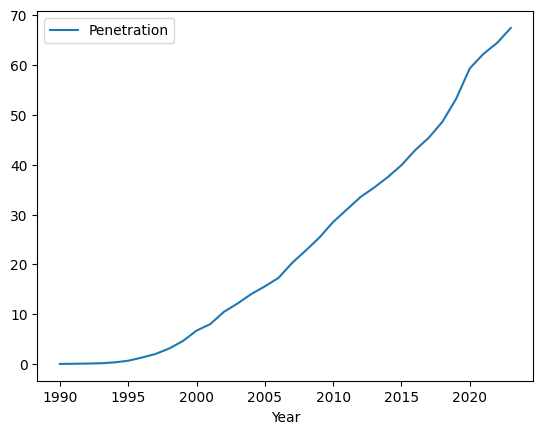

In [ ]:
print(world_net.head())
world_net.plot(x='Year', y='Penetration')


In [ ]:
from scipy.optimize import curve_fit
def logistic(t, K, r, t0):
    return K / (1 + np.exp(-r*(t - t0)))
x = world_net['Year'].values
y = world_net['Penetration'].values
popt, _ = curve_fit(logistic, x, y, p0=[100, .25, 2010])
K, r, t0 = popt
print(f"asymptote ‚âà{K:.1f}%  growth_rate ‚âà{r:.3f}  midpoint ‚âà{t0:.1f}")


asymptote ‚âà85.0%  growth_rate ‚âà0.156  midpoint ‚âà2015.2


Text(0.5, 1.0, 'Global internet diffusion')

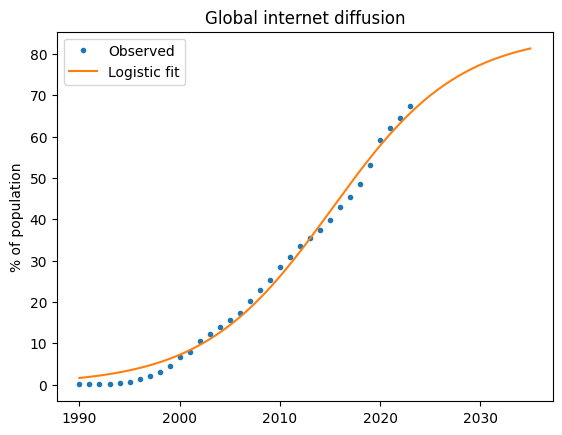

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x, y, '.', label='Observed')
xx = np.linspace(x.min(), 2035, 200)
plt.plot(xx, logistic(xx,*popt), label='Logistic fit')
plt.legend(); plt.ylabel('% of population'); plt.title('Global internet diffusion')


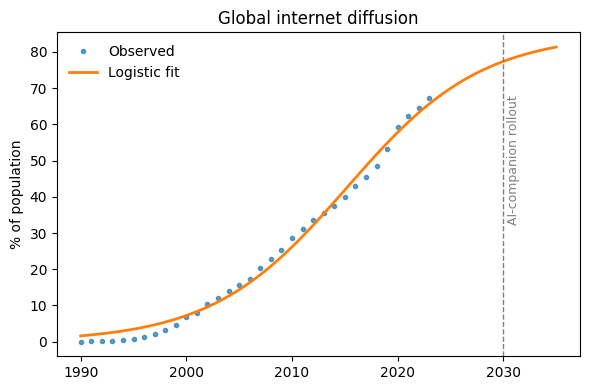

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# world_net —É–∂–µ –µ—Å—Ç—å ( Year | Penetration )
x = world_net['Year'].values
y = world_net['Penetration'].values

def logistic(t, K, r, t0):
    return K / (1 + np.exp(-r*(t - t0)))

popt, _ = curve_fit(logistic, x, y, p0=[100, .25, 2010])

# ---------- –ì–†–ê–§–ò–ö -----------------
plt.figure(figsize=(6,4))
plt.plot(x, y, '.', label='Observed', alpha=.7)
xx = np.linspace(x.min(), 2035, 300)
plt.plot(xx, logistic(xx, *popt), label='Logistic fit', lw=2, color='tab:orange')

# –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω–∞—è –ª–∏–Ω–∏—è –≤–Ω—É—Ç—Ä–∏ —Ç–æ–π –∂–µ —Ñ–∏–≥—É—Ä—ã
pivot_year = 2030
plt.axvline(pivot_year, ls='--', color='grey', lw=1)
plt.text(pivot_year+0.3, 50, 'AI-companion rollout', rotation=90,
         va='center', fontsize=9, color='grey')

plt.ylabel('% of population')
plt.title('Global internet diffusion')
plt.legend(frameon=False, loc='upper left')
plt.tight_layout()

plt.savefig('/content/drive/MyDrive/ai_data/fig4_internet_logistic.png',
            dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# === 0. –ü—Ä–æ–≤–µ—Ä—è–µ–º, –Ω—É–∂–Ω–æ –ª–∏ –º–æ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å –¥–∏—Å–∫ =========================
from pathlib import Path

MOUNTPOINT = Path("/content/drive")
if not MOUNTPOINT.exists():
    # –µ—â—ë –Ω–µ —Å–º–æ–Ω—Ç–∏—Ä–æ–≤–∞–Ω ‚Äî –¥–µ–ª–∞–µ–º mount
    from google.colab import drive
    drive.mount('/content/drive')
else:
    print("Google Drive —É–∂–µ —Å–º–æ–Ω—Ç–∏—Ä–æ–≤–∞–Ω")

# –æ—Å—Ç–∞–ª—å–Ω–æ–π –∫–æ–¥ –±–µ–∑ –∏–∑–º–µ–Ω–µ–Ω–∏–π -------------------------------
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, zipfile
from scipy.optimize import curve_fit

DATA_DIR = "/content/drive/MyDrive/ai_data"
WB_FILE  = os.path.join(DATA_DIR,
                        "API_IT.CEL.SETS.P2_DS2_en_csv_v2_88708.zip")  # ‚Üê –≤–∞—à —Ñ–∞–π–ª

# --- 1. –ß—Ç–µ–Ω–∏–µ ZIP/CSV --------------------------------------
if WB_FILE.lower().endswith('.zip'):
    with zipfile.ZipFile(WB_FILE) as z:
        csv_name = [n for n in z.namelist() if n.endswith('.csv')][0]
        df = pd.read_csv(z.open(csv_name), skiprows=4)
else:
    df = pd.read_csv(WB_FILE, skiprows=4)

# --- 2. –°—Ç—Ä–æ–∫–∞ World ---------------------------------------
row = df.loc[df['Country Name'] == 'World'].iloc[0]
year_cols = [c for c in df.columns if c.isdigit()]
series    = row[year_cols].dropna().astype(float)

world_mob = (series
             .rename_axis('Year')
             .reset_index(name='Subscriptions'))
world_mob['Year'] = world_mob['Year'].astype(int)

# --- 3. –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è –ø–æ–¥–≥–æ–Ω–∫–∞ ------------------------------
def logistic(t, K, r, t0):
    return K / (1 + np.exp(-r*(t - t0)))

x, y  = world_mob['Year'].values, world_mob['Subscriptions'].values
popt, _ = curve_fit(logistic, x, y, p0=[130, .25, 2000], maxfev=10_000)
K, r, t0 = popt
print(f"Fit: K={K:.1f}, r={r:.3f}, t0‚âà{t0:.0f}")

# --- 4. –ì—Ä–∞—Ñ–∏–∫ ----------------------------------------------
plt.figure(figsize=(6,4))
plt.plot(x, y, '.', label='Observed', alpha=.7)
xx = np.linspace(x.min(), 2035, 300)
plt.plot(xx, logistic(xx,*popt), lw=2, label='Logistic fit', color='tab:orange')

plt.axvline(2030, ls='--', color='grey')
plt.text(2030+0.5, 110, 'AI‚Äìcompanion rollout', rotation=90,
         va='center', color='grey', fontsize=9)

plt.ylabel('Subscriptions per 100 people')
plt.title('Global mobile-cellular diffusion')
plt.legend(frameon=False, loc='upper left')
plt.tight_layout()

out_png = os.path.join(DATA_DIR, "fig3_mobile_logistic.png")
plt.savefig(out_png, dpi=300, bbox_inches='tight')
plt.show()

print("Saved to:", out_png)


Google Drive —É–∂–µ —Å–º–æ–Ω—Ç–∏—Ä–æ–≤–∞–Ω


EmptyDataError: No columns to parse from file

In [ ]:
import zipfile, itertools

with zipfile.ZipFile(WB_FILE) as z:
    print("–°–æ–¥–µ—Ä–∂–∏–º–æ–µ ZIP:")
    for n in z.namelist():
        print(" ‚Ä¢", n)
    csv_name = [n for n in z.namelist() if n.endswith('.csv')][0]
    print("\n–ü–µ—Ä–≤—ã–µ 8 —Å—Ç—Ä–æ–∫ —Ñ–∞–π–ª–∞", csv_name, ":\n")
    preview = z.open(csv_name).read().decode('utf-8', errors='replace').splitlines()[:8]
    for ln in preview:
        print(ln)


–°–æ–¥–µ—Ä–∂–∏–º–æ–µ ZIP:
 ‚Ä¢ Metadata_Indicator_API_IT.CEL.SETS.P2_DS2_en_csv_v2_88708.csv
 ‚Ä¢ API_IT.CEL.SETS.P2_DS2_en_csv_v2_88708.csv
 ‚Ä¢ Metadata_Country_API_IT.CEL.SETS.P2_DS2_en_csv_v2_88708.csv

–ü–µ—Ä–≤—ã–µ 8 —Å—Ç—Ä–æ–∫ —Ñ–∞–π–ª–∞ Metadata_Indicator_API_IT.CEL.SETS.P2_DS2_en_csv_v2_88708.csv :

Ôªø"INDICATOR_CODE","INDICATOR_NAME","SOURCE_NOTE","SOURCE_ORGANIZATION",
"IT.CEL.SETS.P2","Mobile cellular subscriptions (per 100 people)","Mobile cellular telephone subscriptions are subscriptions to a public mobile telephone service that provide access to the PSTN using cellular technology. The indicator includes (and is split into) the number of postpaid subscriptions, and the number of active prepaid accounts (i.e. that have been used during the last three months). The indicator applies to all mobile cellular subscriptions that offer voice communications. It excludes subscriptions via data cards or USB modems, subscriptions to public mobile data services, private trunked mobile

In [ ]:
def read_worldbank_csv(path):
    """–ß–∏—Ç–∞—Ç—å CSV –∏–ª–∏ ZIP —Å –¥–∞–Ω–Ω—ã–º–∏ World Bank.
       –ê–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç, –Ω—É–∂–Ω–æ –ª–∏ skiprows."""
    import io, zipfile, pandas as pd, itertools

    # --- –∏–∑–≤–ª–µ–∫–∞–µ–º bytes ---------------------------------
    if path.lower().endswith('.zip'):
        with zipfile.ZipFile(path) as z:
            csv_name = [n for n in z.namelist() if n.endswith('.csv')][0]
            raw = z.open(csv_name).read()
    else:
        raw = open(path, 'rb').read()

    # --- —Å–º–æ—Ç—Ä–∏–º –ø–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫ --------------------------
    head = raw.decode('utf-8', errors='replace').splitlines()[:5]
    need_skip = all(len(s.split(',')) <= 2 for s in head)  # –º–µ—Ç–∞–¥–∞–Ω–Ω—ã–µ
    skip = 4 if need_skip else 0

    df = pd.read_csv(io.BytesIO(raw), skiprows=skip)
    return df

df = read_worldbank_csv(WB_FILE)
print("–ö–æ–ª–æ–Ω–∫–∏:", df.columns[:6])


–ö–æ–ª–æ–Ω–∫–∏: Index(['INDICATOR_CODE', 'INDICATOR_NAME', 'SOURCE_NOTE',
       'SOURCE_ORGANIZATION', 'Unnamed: 4'],
      dtype='object')


In [ ]:
import zipfile
import pandas as pd

WB_FILE = '/content/drive/MyDrive/ai_data/API_IT.CEL.SETS.P2_DS2_en_csv_v2_88708.zip'

with zipfile.ZipFile(WB_FILE) as z:
    # –ü–æ–∫–∞–∂–µ–º —Å–ø–∏—Å–æ–∫ –≤—Å–µ—Ö —Ñ–∞–π–ª–æ–≤
    all_files = z.namelist()
    print("–§–∞–π–ª—ã –≤ –∞—Ä—Ö–∏–≤–µ:")
    for f in all_files:
        print(" -", f)

    # –ù–∞–π–¥—ë–º –ø–µ—Ä–≤—ã–π CSV, –∫–æ—Ç–æ—Ä—ã–π –Ω–µ metadata
    csv_name = next(f for f in all_files if f.endswith('.csv') and 'Metadata' not in f)

    # –ü–æ–∫–∞–∂–µ–º –∏–º—è —Ñ–∞–π–ª–∞
    print("\n–ß–∏—Ç–∞–µ–º —Ñ–∞–π–ª:", csv_name)

    # –ü—Ä–æ–ø—É—Å—Ç–∏–º 4 –∑–∞–≥–æ–ª–æ–≤–æ—á–Ω—ã—Ö —Å—Ç—Ä–æ–∫–∏
    df = pd.read_csv(z.open(csv_name), skiprows=4)

df.head()


–§–∞–π–ª—ã –≤ –∞—Ä—Ö–∏–≤–µ:
 - Metadata_Indicator_API_IT.CEL.SETS.P2_DS2_en_csv_v2_88708.csv
 - API_IT.CEL.SETS.P2_DS2_en_csv_v2_88708.csv
 - Metadata_Country_API_IT.CEL.SETS.P2_DS2_en_csv_v2_88708.csv

–ß–∏—Ç–∞–µ–º —Ñ–∞–π–ª: API_IT.CEL.SETS.P2_DS2_en_csv_v2_88708.csv


Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                                   Indicator Name  Indicator Code  1960  1961  \
0  Mobile cellular subscriptions (per 100 people)  IT.CEL.SETS.P2   0.0   NaN   
1  Mobile cellular subscriptions (per 100 people)  IT.CEL.SETS.P2   0.0   NaN   
2  Mobile cellular subscriptions (per 100 people)  IT.CEL.SETS.P2   0.0   NaN   
3  Mobile cellular subscriptions (per 100 people)  IT.CEL.SETS.P2   0.0   NaN   
4  Mobile cellular subscriptions (per 100 people)  IT.CEL.SETS.P2   0.0   NaN   

   1962  1963  1964  1965  ...       2016       2017       2018        2019  \
0   NaN   NaN   NaN   0.0  ...        NaN        NaN        NaN  132.466508   
1   NaN   NaN   NaN   0.0  ...  63.600000  63.500000  65.200000   67.900000   
2   NaN   NaN   NaN   0.0  ...  62.371096  67.136415  59.902648   59.783879   
3   NaN   NaN   NaN   0.0  ...  82.900000  81.400000  87.800000   91.300000   
4   NaN   NaN   NaN   0.0  ...  44.593508  44.106445  42.490949   45.837741   

         2020        2021        2022   2023  2024  Unnamed: 69  
0  132.288784  132.349628         NaN    NaN   NaN          NaN  
1   70.300000   74.700000   77.700000   81.3   NaN          NaN  
2   58.190214   56.554435         NaN    NaN   NaN          NaN  
3   96.700000   95.000000  102.100000  100.8   NaN          NaN  
4   43.810091   44.423732   67.373474    NaN   NaN          NaN  

[5 rows x 70 columns]

In [ ]:
# --- 2. –ò–∑–≤–ª–µ–∫–∞–µ–º —Å—Ç—Ä–æ–∫—É "World" –∏–∑ —Ç–∞–±–ª–∏—Ü—ã df -------------------

# –ù–∞–π–¥—ë–º –Ω—É–∂–Ω—É—é —Å—Ç—Ä–æ–∫—É
world_row = df[df['Country Name'] == 'World'].iloc[0]

# –í—ã—Ç–∞—â–∏–º –≤—Å–µ –∫–æ–ª–æ–Ω–∫–∏-–≥–æ–¥–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è (–Ω–∞–ø—Ä–∏–º–µ—Ä, '1960', '1961', ..., '2024')
year_cols = [col for col in df.columns if col.isdigit()]

# –ü–æ—Å—Ç—Ä–æ–∏–º DataFrame Year | Subscriptions
world_mob = (
    world_row[year_cols]
    .dropna()  # —É–±–∏—Ä–∞–µ–º –ø—É—Å—Ç—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
    .rename_axis('Year')
    .reset_index(name='Subscriptions')
)

world_mob['Year'] = world_mob['Year'].astype(int)
world_mob['Subscriptions'] = world_mob['Subscriptions'].astype(float)

print(world_mob.tail())


    Year  Subscriptions
47  2019          105.9
48  2020          105.5
49  2021          107.4
50  2022          108.1
51  2023          110.6


–ê–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏—è: K=108.4, r=0.309, t0‚âà2007


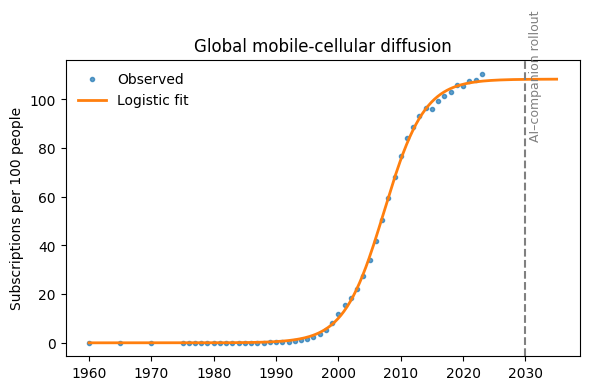

–°–æ—Ö—Ä–∞–Ω–µ–Ω–æ –∫–∞–∫: /content/drive/MyDrive/ai_data/fig3_mobile_logistic.png


In [ ]:
# --- 3. –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏—è ------------------------------
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import os

def logistic(t, K, r, t0):
    return K / (1 + np.exp(-r*(t - t0)))

x = world_mob['Year'].values
y = world_mob['Subscriptions'].values
popt, _ = curve_fit(logistic, x, y, p0=[130, .25, 2000], maxfev=10_000)
K, r, t0 = popt
print(f"–ê–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏—è: K={K:.1f}, r={r:.3f}, t0‚âà{t0:.0f}")

# --- 4. –°—Ç—Ä–æ–∏–º –∏ —Å–æ—Ö—Ä–∞–Ω—è–µ–º –≥—Ä–∞—Ñ–∏–∫ --------------------------------
plt.figure(figsize=(6,4))
plt.plot(x, y, '.', label='Observed', alpha=.7)

xx = np.linspace(x.min(), 2035, 300)
plt.plot(xx, logistic(xx,*popt), lw=2, label='Logistic fit', color='tab:orange')

pivot = 2030
plt.axvline(pivot, ls='--', color='grey')
plt.text(pivot+0.5, 110, 'AI‚Äìcompanion rollout', rotation=90,
         va='center', color='grey', fontsize=9)

plt.ylabel('Subscriptions per 100 people')
plt.title('Global mobile-cellular diffusion')
plt.legend(frameon=False, loc='upper left')
plt.tight_layout()

out_png = os.path.join(DATA_DIR, "fig3_mobile_logistic.png")
plt.savefig(out_png, dpi=300, bbox_inches='tight')
plt.show()

print("–°–æ—Ö—Ä–∞–Ω–µ–Ω–æ –∫–∞–∫:", out_png)


In [ ]:
# --- 0. –ò–º–ø–æ—Ä—Ç ----------------------------------------------------
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os
from scipy.optimize import curve_fit

DATA_DIR = "/content/drive/MyDrive/ai_data"
XLSX_FILE = os.path.join(DATA_DIR, "SIPRI-Milex-data-1949-2024_2.xlsx")

# --- 1. –ß–∏—Ç–∞–µ–º –±–µ–∑ –∑–∞–≥–æ–ª–æ–≤–∫–æ–≤, –Ω–∞—á–∏–Ω–∞—è —Å –ø—Ä–∞–≤–∏–ª—å–Ω–æ–π —Å—Ç—Ä–æ–∫–∏ ------
df = pd.read_excel(XLSX_FILE, sheet_name="Regional totals", skiprows=10, header=None)

# –ü–µ—Ä–≤–∞—è –∫–æ–ª–æ–Ω–∫–∞ ‚Äî –Ω–∞–∑–≤–∞–Ω–∏—è —Ä–µ–≥–∏–æ–Ω–æ–≤ (–≤–∫–ª—é—á–∞—è 'World')
region_col = df.iloc[:, 0]
year_cols = df.columns[1:]

# –ò—â–µ–º —Å—Ç—Ä–æ–∫—É 'World'
world_row = df[region_col == 'World'].iloc[0]

# –°—Ç—Ä–æ–∏–º DataFrame Year | Spending
world_mil = (
    pd.DataFrame({
        'Year': [int(y) for y in year_cols if isinstance(y, (int, float))],
        'Spending': [world_row[y] for y in year_cols if isinstance(y, (int, float))]
    }).dropna()
)

# --- 2. –°—Ç—Ä–æ–∏–º —Ç–∞–±–ª–∏—Ü—É Year | Spending -----------------------------
world_mil = pd.DataFrame({
    'Year': [int(y) for y in year_cols if isinstance(y, (int, float))],
    'Spending': pd.to_numeric([world_row[y] for y in year_cols if isinstance(y, (int, float))],
                              errors='coerce')
}).dropna()

world_mil['Year'] = world_mil['Year'].astype(int)
world_mil['Spending'] = world_mil['Spending'].astype(float)

popt, _ = curve_fit(logistic, x, y, p0=[y.max()*1.2, 0.1, 2000], maxfev=10_000)
K, r, t0 = popt
print(f"–ê–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏—è: K={K:.1f}, r={r:.3f}, t0‚âà{t0:.1f}")

# --- 3. –†–∏—Å. 5a ‚Äî –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è –∫—Ä–∏–≤–∞—è ----------------------------
plt.figure(figsize=(6,4))
plt.plot(x, y, '.', label='Observed', alpha=.7)

xx = np.linspace(x.min(), 2035, 300)
plt.plot(xx, logistic(xx, *popt), lw=2, label='Logistic fit', color='tab:orange')

plt.axvline(2030, ls='--', color='grey')
plt.text(2031, y.max()*0.8, 'AI‚Äìcompanion rollout', rotation=90,
         va='center', fontsize=9, color='grey')

plt.ylabel('Military spending (USD billions)')
plt.title('Global military expenditure')
plt.legend(frameon=False, loc='upper left')
plt.tight_layout()

fig1_path = os.path.join(DATA_DIR, "fig5a_military_logistic.png")
plt.savefig(fig1_path, dpi=300, bbox_inches='tight')
plt.show()
print("–°–æ—Ö—Ä–∞–Ω–µ–Ω–æ:", fig1_path)

# --- 4. –ü–µ—Ä–µ—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ 20 % ------------------------------------
world_mil['AI'] = world_mil['Spending'] * 0.20
world_mil['Military (80%)'] = world_mil['Spending'] * 0.80

# --- 5. –†–∏—Å. 5b ‚Äî —Å—Ç–µ–∫-–≥—Ä–∞—Ñ–∏–∫ -------------------------------------
plt.figure(figsize=(6,4))
plt.stackplot(world_mil['Year'],
              world_mil['Military (80%)'],
              world_mil['AI'],
              labels=['Military (80%)', 'Reallocated to AI (20%)'],
              colors=['#1f77b4', '#ff7f0e'],
              alpha=0.85)

plt.axvline(2030, ls='--', color='grey')
plt.text(2031, y.max()*0.6, 'AI‚Äìcompanion rollout', rotation=90,
         va='center', fontsize=9, color='grey')

plt.ylabel('Spending (USD billions)')
plt.title('Reallocation: 20 % military to AI')
plt.legend(frameon=False, loc='upper left')
plt.tight_layout()

fig2_path = os.path.join(DATA_DIR, "fig5b_reallocation_stack.png")
plt.savefig(fig2_path, dpi=300, bbox_inches='tight')
plt.show()
print("–°–æ—Ö—Ä–∞–Ω–µ–Ω–æ:", fig2_path)


NameError: name 'logistic' is not defined

In [ ]:
# --- –°—Ü–µ–Ω–∞—Ä–∏–∏ —Ä–æ—Å—Ç–∞ –ø–æ—Å–ª–µ 2030 ----------------------------------
# –ë–∞–∑–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
df = world_mil[world_mil['Year'] >= 2030].copy()
years = df['Year'].values
base_ai = df['AI'].values

# –°—Ü–µ–Ω–∞—Ä–∏–∏:
slow_ai = base_ai * 0.75  # —Å–¥–µ—Ä–∂–∞–Ω–Ω—ã–π: -25%
fast_ai = base_ai * 1.25  # —É—Å–∫–æ—Ä–µ–Ω–Ω—ã–π: +25%

# –ö—É–º—É–ª—è—Ç–∏–≤–Ω—ã–π –±—é–¥–∂–µ—Ç
slow_cum = slow_ai.cumsum()
fast_cum = fast_ai.cumsum()

# –ì–æ–¥ –¥–æ—Å—Ç–∏–∂–µ–Ω–∏—è $700B
target = 700
slow_year = years[np.argmax(slow_cum >= target)] if any(slow_cum >= target) else None
fast_year = years[np.argmax(fast_cum >= target)] if any(fast_cum >= target) else None

# --- –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ -----------------------------------------
plt.figure(figsize=(7,5))

plt.plot(years, slow_cum, label='–°–¥–µ—Ä–∂–∞–Ω–Ω—ã–π —Å—Ü–µ–Ω–∞—Ä–∏–π', color='tab:red', lw=2)
plt.plot(years, fast_cum, label='–£—Å–∫–æ—Ä–µ–Ω–Ω—ã–π —Å—Ü–µ–Ω–∞—Ä–∏–π', color='tab:blue', lw=2)
plt.axhline(target, ls='--', color='grey', label='$700 –º–ª—Ä–¥ (1B –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)')

# –ú–µ—Ç–∫–∏ –≥–æ–¥–æ–≤ –¥–æ—Å—Ç–∏–∂–µ–Ω–∏—è
if slow_year:
    plt.axvline(slow_year, ls=':', color='tab:red')
    plt.text(slow_year + 0.2, target * 0.6,
             f'{slow_year}', rotation=90, color='tab:red', fontsize=9)
if fast_year:
    plt.axvline(fast_year, ls=':', color='tab:blue')
    plt.text(fast_year + 0.2, target * 0.4,
             f'{fast_year}', rotation=90, color='tab:blue', fontsize=9)

plt.title('–ù–∞–∫–æ–ø–ª–µ–Ω–∏–µ AI-–±—é–¥–∂–µ—Ç–∞: –¥–≤–∞ —Å—Ü–µ–Ω–∞—Ä–∏—è')
plt.xlabel('–ì–æ–¥')
plt.ylabel('–ö—É–º—É–ª—è—Ç–∏–≤–Ω—ã–π –±—é–¥–∂–µ—Ç, –º–ª—Ä–¥ $')
plt.grid(True, ls=':')
plt.legend()
plt.tight_layout()

fig_path = os.path.join(DATA_DIR, 'fig5c_scenarios.png')
plt.savefig(fig_path, dpi=300)
plt.show()

print("‚úÖ –°–æ—Ö—Ä–∞–Ω–µ–Ω–æ:", fig_path)
if slow_year and fast_year:
    print(f"üü• –°–¥–µ—Ä–∂–∞–Ω–Ω—ã–π —Å—Ü–µ–Ω–∞—Ä–∏–π: —Ç–æ—á–∫–∞ $700B –≤ {slow_year} –≥–æ–¥—É")
    print(f"üü¶ –£—Å–∫–æ—Ä–µ–Ω–Ω—ã–π —Å—Ü–µ–Ω–∞—Ä–∏–π: —Ç–æ—á–∫–∞ $700B –≤ {fast_year} –≥–æ–¥—É")


NameError: name 'world_mil' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- –î–∞–Ω–Ω—ã–µ: —Ä–∞—Å—á—ë—Ç –∑–∞—Ç—Ä–∞—Ç –∏ —ç–∫–æ–Ω–æ–º–∏–∏ –ø—Ä–∏ —Ä–∞–∑–Ω—ã—Ö —Å—Ü–µ–Ω–∞—Ä–∏—è—Ö -------------
categories = {
    "Military": {"total": 2.7, "save_low": 0.20, "save_high": 0.10},
    "Healthcare": {"total": 9.0, "save_low": 0.05, "save_high": 0.03},
    "Police & Justice": {"total": 2.0, "save_low": 0.10, "save_high": 0.05},
    "Welfare & Social Losses": {"total": 3.0, "save_low": 0.05, "save_high": 0.03}
}

cost_per_user = 700  # annual cost per user in USD
user_range = [0.5, 1.0, 2.0, 3.0, 4.0, 5.0]

rows = []
for users in user_range:
    annual_cost = users * 1e9 * cost_per_user / 1e12  # —Ç—Ä–∏–ª–ª–∏–æ–Ω—ã $
    save_realistic = sum(v["total"] * v["save_low"] for v in categories.values())
    save_stress = sum(v["total"] * v["save_high"] for v in categories.values())
    net_realistic = save_realistic - annual_cost
    net_stress = save_stress - annual_cost
    rows.append({
        "Users (billion)": users,
        "AI Costs (trillion $)": round(annual_cost, 2),
        "Savings (realistic), trillion $": round(save_realistic, 2),
        "Savings (stress scenario), trillion $": round(save_stress, 2),
        "Net (realistic)": round(net_realistic, 2),
        "Net (stress scenario)": round(net_stress, 2)
    })

df = pd.DataFrame(rows)
display(df)

# --- –ì—Ä–∞—Ñ–∏–∫ -------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(df["Users (billion)"], df["AI Costs (trillion $)"], label="AI Costs", linewidth=2)
plt.plot(df["Users (billion)"], df["Savings (realistic), trillion $"], label="Savings (realistic)", linewidth=2)
plt.plot(df["Users (billion)"], df["Savings (stress scenario), trillion $"], label="Savings (stress)", linewidth=2)
plt.plot(df["Users (billion)"], df["Net (realistic)"], label="Net (realistic)", linestyle='--', linewidth=2)
plt.plot(df["Users (billion)"], df["Net (stress scenario)"], label="Net (stress)", linestyle='--', linewidth=2)

plt.title("AI Companion: Estimated Costs and Savings by User Base")
plt.xlabel("Users (billion)")
plt.ylabel("Amount (trillion $)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Users (billion)  AI Costs (trillion $)  Savings (realistic), trillion $  \
0              0.5                   0.35                             1.34   
1              1.0                   0.70                             1.34   
2              2.0                   1.40                             1.34   
3              3.0                   2.10                             1.34   
4              4.0                   2.80                             1.34   
5              5.0                   3.50                             1.34   

   Savings (stress scenario), trillion $  Net (realistic)  \
0                                   0.73             0.99   
1                                   0.73             0.64   
2                                   0.73            -0.06   
3                                   0.73            -0.76   
4                                   0.73            -1.46   
5                                   0.73            -2.16   

   Net (stress scenario)  
0                   0.38  
1                   0.03  
2                  -0.67  
3                  -1.37  
4                  -2.07  
5                  -2.77

Users (billion)  AI Costs (trillion $)  Savings (realistic), trillion $  \
0              0.5                   0.35                             1.34   
1              1.0                   0.70                             1.34   
2              2.0                   1.40                             1.34   
3              3.0                   2.10                             1.34   
4              4.0                   2.80                             1.34   
5              5.0                   3.50                             1.34   

   Savings (stress), trillion $  Net (realistic)  Net (stress)  
0                          0.73             0.99          0.38  
1                          0.73             0.64          0.03  
2                          0.73            -0.06         -0.67  
3                          0.73            -0.76         -1.37  
4                          0.73            -1.46         -2.07  
5                          0.73            -2.16         -2.77

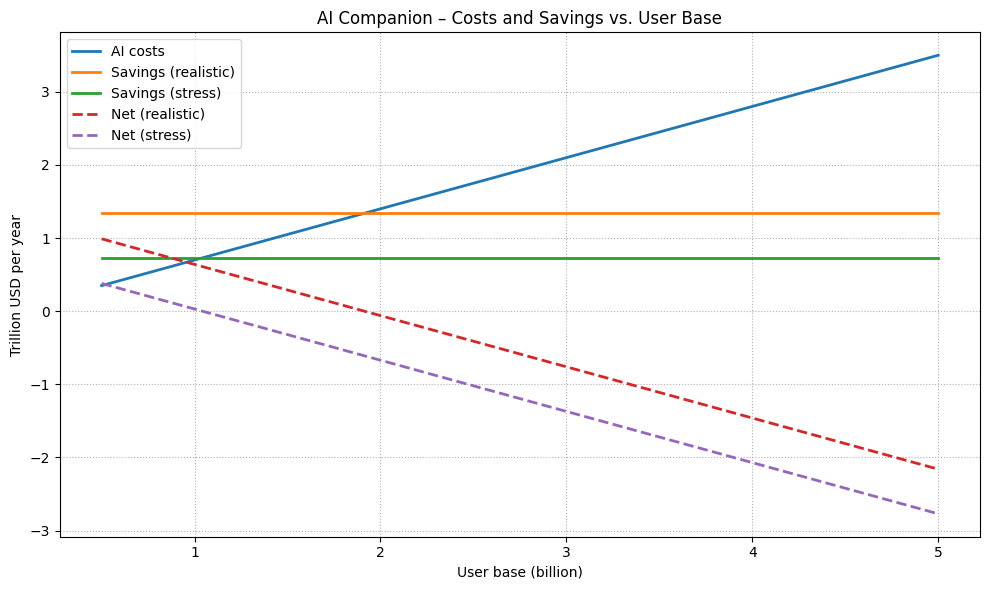

Saved: ai_companion_cost_benefit.csv and ai_companion_cost_savings_graph.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- PARAMETERS (edit if you tweak assumptions) -----------------
categories = {
    "Military":   {"total": 2.7, "save_low": .20, "save_high": .10},
    "Healthcare": {"total": 9.0, "save_low": .05, "save_high": .03},
    "Police & Justice": {"total": 2.0, "save_low": .10, "save_high": .05},
    "Welfare & Social Losses": {"total": 3.0, "save_low": .05, "save_high": .03},
}
cost_per_user = 700                    # USD/year
user_range    = [0.5, 1, 2, 3, 4, 5]   # billion persons

# --- TABLE -------------------------------------------------------
rows = []
for u in user_range:
    ai_cost = u * 1e9 * cost_per_user / 1e12          # ‚Üí trillion $
    save_real = sum(v["total"]*v["save_low"]  for v in categories.values())
    save_stress = sum(v["total"]*v["save_high"] for v in categories.values())
    rows.append({
        "Users (billion)": u,
        "AI Costs (trillion $)": round(ai_cost, 2),
        "Savings (realistic), trillion $": round(save_real, 2),
        "Savings (stress), trillion $":   round(save_stress, 2),
        "Net (realistic)":  round(save_real  - ai_cost, 2),
        "Net (stress)":     round(save_stress - ai_cost, 2),
    })
df = pd.DataFrame(rows)
df.to_csv("ai_companion_cost_benefit.csv", index=False)
display(df)

# --- FIGURE ------------------------------------------------------
plt.figure(figsize=(10,6))
plt.plot(df["Users (billion)"], df["AI Costs (trillion $)"],         label="AI costs", lw=2)
plt.plot(df["Users (billion)"], df["Savings (realistic), trillion $"], label="Savings (realistic)", lw=2)
plt.plot(df["Users (billion)"], df["Savings (stress), trillion $"],   label="Savings (stress)", lw=2)
plt.plot(df["Users (billion)"], df["Net (realistic)"],  '--', label="Net (realistic)", lw=2)
plt.plot(df["Users (billion)"], df["Net (stress)"],     '--', label="Net (stress)",    lw=2)
plt.title("AI Companion ‚Äì Costs and Savings vs. User Base")
plt.xlabel("User base (billion)")
plt.ylabel("Trillion USD per year")
plt.grid(ls=":")
plt.legend()
plt.tight_layout()
plt.savefig("ai_companion_cost_savings_graph.png", dpi=300)
plt.show()
print("Saved: ai_companion_cost_benefit.csv and ai_companion_cost_savings_graph.png")


–°–æ—Ö—Ä–∞–Ω–µ–Ω–æ: /content/fig6_polarisation_risk_real.png


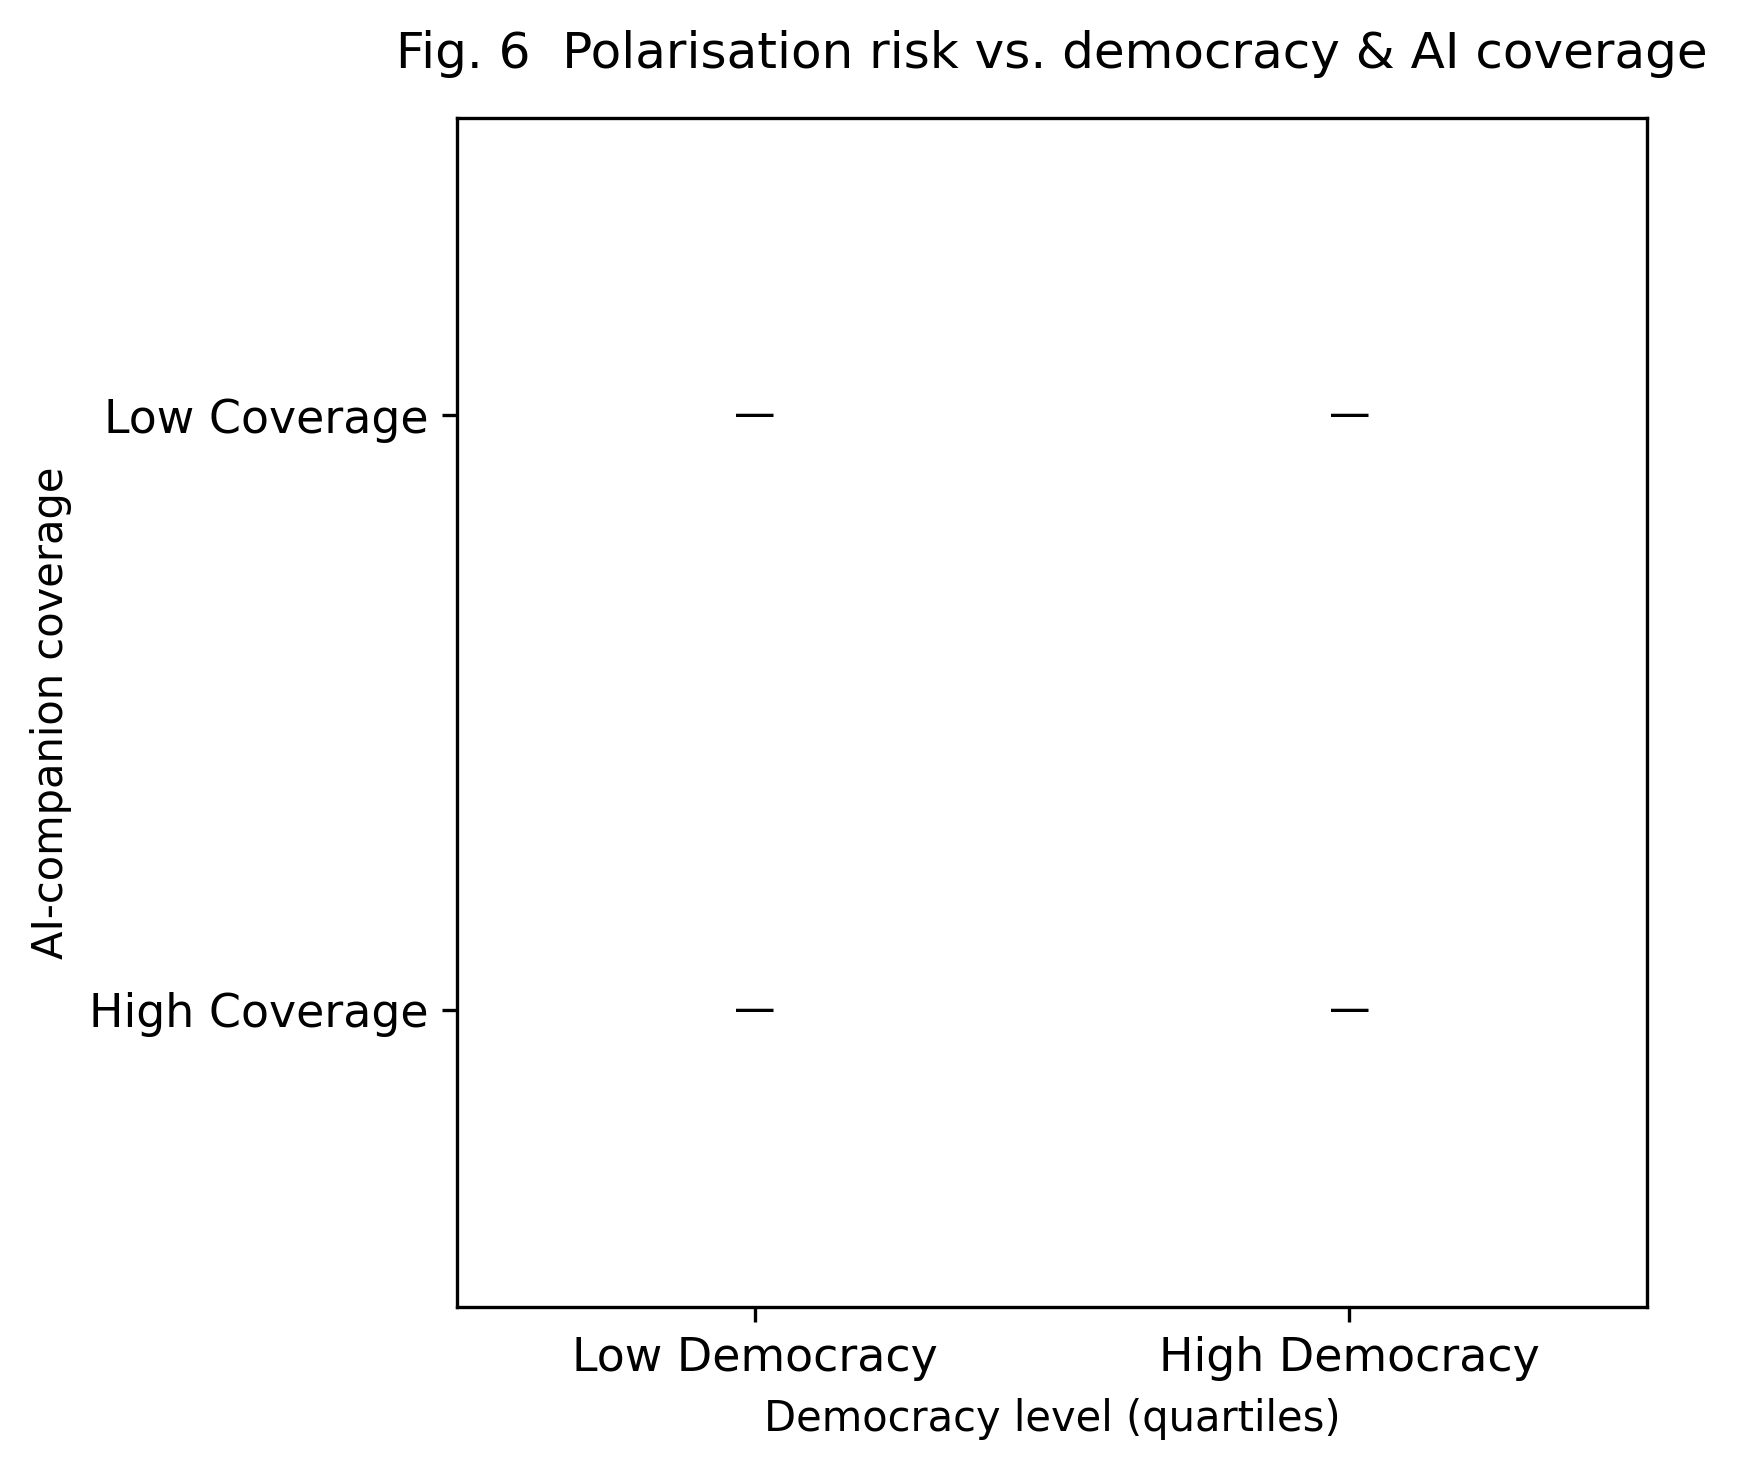

In [ ]:
# =========================================================
# Figure 6 ‚Äì Polarisation risk vs. democracy & AI coverage
# =========================================================
import zipfile, io, pandas as pd, numpy as np, matplotlib.pyplot as plt
from pathlib import Path, PurePath

# --- 0. –ü—É—Ç—å –∫ –¥–∞–Ω–Ω—ã–º -------------------------------------------------------
DATA_DIR = Path("/content/drive/MyDrive/ai_data")

# --- 1. –£–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è —á—Ç–µ–Ω–∏—è World Bank ----------------------------
def load_wdi_zip(zip_file):
    """
    –ß–∏—Ç–∞–µ—Ç –≥–ª–∞–≤–Ω—ã–π CSV –∏–∑ –∞—Ä—Ö–∏–≤–∞ World Bank (–ª—é–±–æ–π —Å—Ö–µ–º—ã –∏–º–µ–Ω),
    –æ–±—Ä–µ–∑–∞—è –≤—Å–µ —Å—Ç—Ä–æ–∫–∏-–º–µ—Ç–∞–¥–∞–Ω–Ω—ã–µ –î–û —Å—Ç—Ä–æ–∫–∏ —Å 'Country Name'.
    """
    with zipfile.ZipFile(DATA_DIR / zip_file) as z:
        # a) —Å—Ç–∞—Ä–∞—è —Å—Ö–µ–º–∞ ‚Äî *_Data.csv
        data_files = [n for n in z.namelist() if n.lower().endswith("_data.csv")]
        # b) –Ω–æ–≤–∞—è —Å—Ö–µ–º–∞ ‚Äî API_...csv (–±–µ–∑ 'Metadata')
        if not data_files:
            data_files = [n for n in z.namelist()
                          if n.lower().startswith("api_") and
                             n.lower().endswith(".csv") and
                             "metadata" not in n.lower()]
        if not data_files:
            raise FileNotFoundError(f"–û—Å–Ω–æ–≤–Ω–æ–π CSV –Ω–µ –Ω–∞–π–¥–µ–Ω –≤ {zip_file}")
        csv_name = data_files[0]

        raw_lines = z.read(csv_name).decode("utf-8-sig").splitlines()
        header_idx = next(
            (i for i, line in enumerate(raw_lines)
             if "Country Name" in line and "Country Code" in line),
            0  # –µ—Å–ª–∏ –º–µ—Ç–∞–¥–∞–Ω–Ω—ã—Ö –Ω–µ—Ç
        )
        return pd.read_csv(io.StringIO("\n".join(raw_lines[header_idx:])))

# --- 2. Internet users (–ø–æ—Å–ª–µ–¥–Ω–∏–π –¥–æ—Å—Ç—É–ø–Ω—ã–π –≥–æ–¥) ----------------------------
internet = load_wdi_zip("API_IT.NET.USER.ZS_DS2_en_csv_v2_3171.zip")
year_cols = sorted([c for c in internet.columns if c.isdigit()], key=int)
latest_year = year_cols[-1]          # –æ–±—ã—á–Ω–æ 2022 –∏–ª–∏ 2023
internet_use = (internet[["Country Name", latest_year]]
                .rename(columns={"Country Name": "country_name",
                                 latest_year:    "internet_pct"}))

# --- 3. Digital Adoption Index ---------------------------------------------
dai = pd.read_excel(DATA_DIR / "DAIforweb.xlsx")
dai_latest = (dai.sort_values("Year")
                 .groupby("country", as_index=False).last()
                 .rename(columns={"country": "country_name",
                                  "Digital Adoption Index": "digital_idx"}))

# --- 4. –†–∞—Å—á—ë—Ç —Ç–µ—Ö-–ø–æ—Ç–æ–ª–∫–∞ –∏ coverage --------------------------------------
df_cov = internet_use.merge(dai_latest, on="country_name", how="left")
df_cov["digital_idx"] = df_cov["digital_idx"].fillna(df_cov["internet_pct"] / 100)

df_cov["tech_cap"] = np.minimum(df_cov["internet_pct"],
                                df_cov["digital_idx"] * 100)

S_LOW, S_HIGH = 0.60, 0.80           # —Å—Ü–µ–Ω–∞—Ä–∏–∏ –∫ 2035 –≥.
df_cov["coverage_low"]  = df_cov["tech_cap"] * S_LOW
df_cov["coverage_high"] = df_cov["tech_cap"] * S_HIGH
df_cov["coverage_cat"]  = np.where(df_cov["coverage_low"] >= 40,
                                   "High Coverage", "Low Coverage")

# --- 5. V-Dem 2023 (–ª–∏–±–µ—Ä–∞–ª. –¥–µ–º–æ–∫—Ä–∞—Ç–∏—è & –ø–æ–ª—è—Ä–∏–∑–∞—Ü–∏—è) ----------------------
with zipfile.ZipFile(DATA_DIR / "V-Dem-CY-FullOthers_csv_v13.zip") as z:
    vdem_csv = "V-Dem-CY-Full+Others-v13.csv"
    cols = ["country_name", "year", "v2x_libdem", "v2psprlnks"]
    vdem = (pd.read_csv(z.open(vdem_csv), usecols=cols)
              .query("year == 2023")
              .dropna(subset=["v2x_libdem"]))

q25, q75 = vdem["v2x_libdem"].quantile([.25, .75])
vdem["democracy_cat"] = np.select(
    [vdem["v2x_libdem"] < q25,
     vdem["v2x_libdem"] > q75],
    ["Low Democracy", "High Democracy"],
    default="Mid"
)

# --- 6. –°–≤–æ–¥–Ω–∞—è —Ç–∞–±–ª–∏—Ü–∞ -----------------------------------------------------
latest = (df_cov.merge(vdem, on="country_name", how="inner")
                 .dropna(subset=["v2psprlnks"]))
latest = latest[latest["democracy_cat"].isin(["Low Democracy", "High Democracy"])]

# --- 7. –ú–∞—Ç—Ä–∏—Ü–∞ 2√ó2 ---------------------------------------------------------
pivot = (latest
         .groupby(["coverage_cat", "democracy_cat"])["v2psprlnks"]
         .mean()
         .unstack("democracy_cat")
         .reindex(index=["Low Coverage", "High Coverage"],
                  columns=["Low Democracy", "High Democracy"]))

# --- 8. –ì—Ä–∞—Ñ–∏–∫ --------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 5), dpi=300)
im = ax.imshow(pivot, cmap="YlOrRd")
ax.set_xticks(range(2)); ax.set_xticklabels(pivot.columns, fontsize=11)
ax.set_yticks(range(2)); ax.set_yticklabels(pivot.index,  fontsize=11)
ax.set_xlabel("Democracy level (quartiles)")
ax.set_ylabel("AI-companion coverage")
plt.title("Fig. 6  Polarisation risk vs. democracy & AI coverage", pad=12)

for i in range(2):
    for j in range(2):
        val = pivot.iloc[i, j]
        ax.text(j, i, f"{val:.2f}" if pd.notna(val) else "‚Äî",
                ha="center", va="center", fontsize=10)

plt.tight_layout()
out = Path("/content/fig6_polarisation_risk_real.png")
plt.savefig(out, bbox_inches="tight")
print("–°–æ—Ö—Ä–∞–Ω–µ–Ω–æ:", out)



>> –í—Å–µ–≥–æ —Å—Ç—Ä–∞–Ω –≤ df_cov: 254
coverage_cat
High Coverage      7
Low Coverage     247
Name: iso3, dtype: int64 

ISO-–∫–æ–¥—ã High Coverage (–ø–µ—Ä–≤—ã–µ 15): ['AUT' 'DEU' 'DNK' 'HUN' 'LUX' 'SVK' 'TUR'] 

–í—Å–µ–≥–æ —Å—Ç—Ä–∞–Ω –≤ V-Dem 2023 —Å –ø–æ–ª—è—Ä–∏–∑–∞—Ü–∏–µ–π: 179
‚à©  –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ High Coverage ‚àß V-Dem: 7 ISO
 ['AUT' 'DEU' 'DNK' 'HUN' 'LUX' 'SVK' 'TUR']

‚à©  –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ Low Coverage ‚àß V-Dem: 168
–î–∏–∞–≥–Ω–æ—Å—Ç–∏–∫–∞ (–∫–æ–ª-–≤–æ —Å—Ç—Ä–∞–Ω –≤ –∫–∞–∂–¥–æ–π –∫–ª–µ—Ç–∫–µ):
 democracy_cat  Low Democracy  High Democracy
coverage_cat                                
Low Coverage              42              39
High Coverage              1               5 

–§–∞–π–ª —Å–æ—Ö—Ä–∞–Ω—ë–Ω: /content/fig6_polarisation_risk_real.png


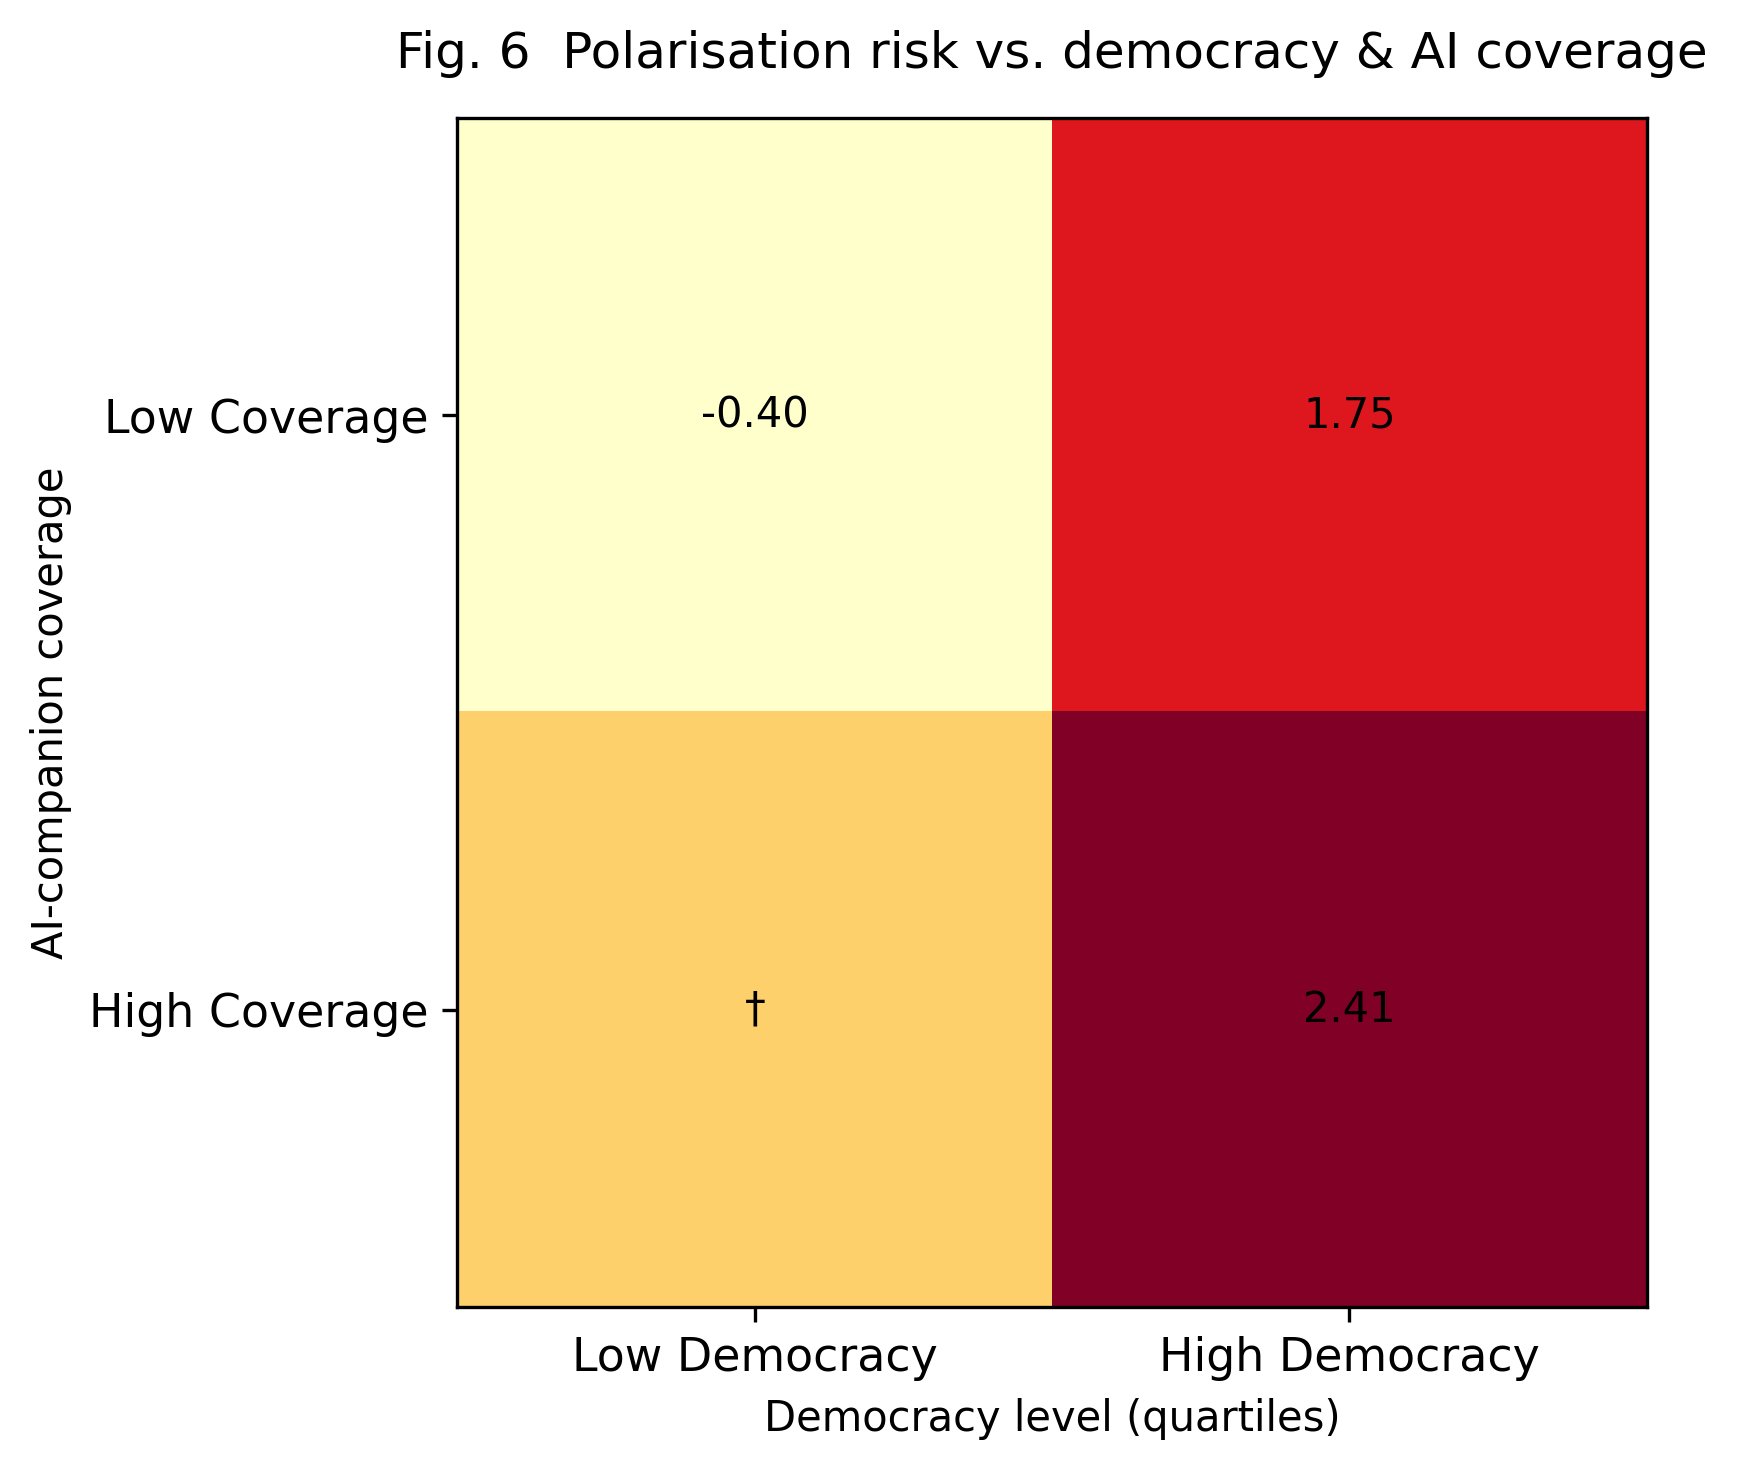

In [ ]:
# =============================================================
# Fig. 6 ‚Äî Polarisation risk vs. democracy & AI coverage
# =============================================================
import zipfile, io, pandas as pd, numpy as np, matplotlib.pyplot as plt
from pathlib import Path

DATA_DIR = Path("/content/drive/MyDrive/ai_data")           # ‚Üê –≤–∞—à–∞ –ø–∞–ø–∫–∞ –Ω–∞ Drive

# -------------------------------------------------------------
# 1. –£—Ç–∏–ª–∏—Ç–∞ —á—Ç–µ–Ω–∏—è ZIP World Bank (–∏—â–µ—Ç *_Data.csv –ò–õ–ò API_*.csv)
# -------------------------------------------------------------
def load_wdi_zip(zip_name):
    with zipfile.ZipFile(DATA_DIR / zip_name) as z:
        files = [n for n in z.namelist() if n.lower().endswith("_data.csv")]
        if not files:
            files = [n for n in z.namelist()
                     if n.lower().startswith("api_") and
                        n.lower().endswith(".csv") and
                        "metadata" not in n.lower()]
        csv_name = files[0]

        raw = z.read(csv_name).decode("utf-8-sig").splitlines()
        header_idx = next(i for i, ln in enumerate(raw)
                          if "Country Name" in ln and "Country Code" in ln)
        return pd.read_csv(io.StringIO("\n".join(raw[header_idx:])))

# -------------------------------------------------------------
# 2. –ò–Ω—Ç–µ—Ä–Ω–µ—Ç-–ø—Ä–æ–Ω–∏–∫–Ω–æ–≤–µ–Ω–∏–µ + ISO-–∫–æ–¥
# -------------------------------------------------------------
internet = load_wdi_zip("API_IT.NET.USER.ZS_DS2_en_csv_v2_3171.zip")
year_cols = sorted([c for c in internet.columns if c.isdigit()], key=int)
LATEST = year_cols[-1]                                # –Ω–∞–ø—Ä. 2022

internet_use = (internet[["Country Name", "Country Code", LATEST]]
                .rename(columns={"Country Name": "country_name",
                                 "Country Code": "iso3",
                                 LATEST: "internet_pct"}))

# —É–±–∏—Ä–∞–µ–º –∞–≥—Ä–µ–≥–∞—Ç—ã (¬´income¬ª, WLD‚Ä¶)
aggregates = (internet_use["iso3"].isin(
                 ["WLD", "HIC", "UMC", "LMC", "LIC"])
              | internet_use["country_name"].str.contains("income", case=False))
internet_use = internet_use[~aggregates]

# -------------------------------------------------------------
# 3. Digital Adoption Index  (—Å–æ–µ–¥–∏–Ω—è–µ–º –ø–æ –Ω–∞–∑–≤–∞–Ω–∏—é —Å—Ç—Ä–∞–Ω—ã)
# -------------------------------------------------------------
dai = pd.read_excel(DATA_DIR / "DAIforweb.xlsx")
dai_latest = (dai.sort_values("Year")
                 .groupby("country", as_index=False).last()
                 .rename(columns={"country": "country_name",
                                  "Digital Adoption Index": "digital_idx"}))

df_cov = internet_use.merge(dai_latest, on="country_name", how="left")
df_cov["digital_idx"] = df_cov["digital_idx"].fillna(df_cov["internet_pct"] / 100)

# ---- —Ä–∞—Å—á—ë—Ç —Ç–µ—Ö-–ø–æ—Ç–æ–ª–∫–∞ –∏ S-–∫—Ä–∏–≤—ã—Ö --------------------------
df_cov["tech_cap"] = np.minimum(df_cov["internet_pct"],
                                df_cov["digital_idx"] * 100)
df_cov["coverage_low"]  = df_cov["tech_cap"] * 0.60
df_cov["coverage_high"] = df_cov["tech_cap"] * 0.80

# ---- –Ω–∞–∑–Ω–∞—á–∞–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏—é High / Low (–ø–æ—Ä–æ–≥ 40 %) ------------
df_cov["coverage_cat"] = np.where(df_cov["coverage_low"] >= 40,
                                  "High Coverage", "Low Coverage")
if not (df_cov["coverage_cat"] == "High Coverage").any():
    # fallback: –∏—Å–ø–æ–ª—å–∑—É–µ–º –æ–ø—Ç–∏–º–∏—Å—Ç–∏—á–Ω—ã–π —Å—Ü–µ–Ω–∞—Ä–∏–π
    df_cov["coverage_cat"] = np.where(df_cov["coverage_high"] >= 40,
                                      "High Coverage", "Low Coverage")

# -------------------------------------------------------------
# 4. V-Dem 2023  (–±–µ—Ä—ë–º –∞—Ä—Ö–∏–≤ Full+Others v15 + –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä v2psprlnks)
# -------------------------------------------------------------
with zipfile.ZipFile(DATA_DIR / "V-Dem-CY-FullOthers-v15_csv.zip") as z:
    vdem_csv  = "V-Dem-CY-Full+Others-v15.csv"   # —Ç–æ—á–Ω–æ–µ –∏–º—è –≤–Ω—É—Ç—Ä–∏ –∞—Ä—Ö–∏–≤–∞
    POLAR_VAR = "v2psprlnks"                    # –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–∞—è –ø–∞—Ä—Ç–∏—è-–ø–æ–ª—è—Ä–∏–∑–∞—Ü–∏—è

    cols = ["country_text_id", "year", "v2x_libdem", POLAR_VAR]
    vdem = (pd.read_csv(z.open(vdem_csv), usecols=cols)
              .query("year == 2023")
              .rename(columns={"country_text_id": "iso3",
                               POLAR_VAR: "polar"}))

# ---- —Ä–∞—Å—á—ë—Ç –∫–≤–∞—Ä—Ç–∏–ª–µ–π –¥–µ–º–æ–∫—Ä–∞—Ç–∏–∏ (–æ—Å—Ç–∞–≤–ª—è–µ–º –∫–∞–∫ –±—ã–ª–æ) ----
q25, q75 = vdem["v2x_libdem"].quantile([.25, .75])
vdem["democracy_cat"] = np.select(
    [vdem["v2x_libdem"] < q25,
     vdem["v2x_libdem"] > q75],
    ["Low Democracy", "High Democracy"],
    default="Mid"
)


# --- –ù–∞–¥—ë–∂–Ω—ã–π merge –ø–æ ISO-–∫–æ–¥—É -------------------------------------------

latest = (df_cov.merge(vdem, on="iso3", how="inner")
                 .dropna(subset=["polar"]))          # ‚Üê –±—ã–ª–æ v2psprlnks


# —Å—Ç—Ä–∞—Ö–æ–≤–∫–∞: –µ—Å–ª–∏ coverage_cat –ø—Ä–æ–ø–∞–ª–∞ ‚Äî –≤–µ—Ä–Ω—ë–º –∏–∑ df_cov
if "coverage_cat" not in latest.columns:
    latest = latest.merge(df_cov[["iso3", "coverage_cat"]], on="iso3", how="left")

latest = latest[latest["democracy_cat"].isin(
                ["Low Democracy", "High Democracy"])]

# ==== –ì–õ–£–ë–ò–ù–ù–ê–Ø –î–ò–ê–ì–ù–û–°–¢–ò–ö–ê ===============================================
# 1) –≤—Å–µ ISO –≤ df_cov —Å coverage_cat –∏ coverage_low
print("\n>> –í—Å–µ–≥–æ —Å—Ç—Ä–∞–Ω –≤ df_cov:", len(df_cov))
print(df_cov.groupby("coverage_cat")["iso3"].nunique(), "\n")

# –ø–æ–∫–∞–∂–µ–º –ø–µ—Ä–≤—ã–µ 15 ISO-–∫–æ–¥–æ–≤ High Coverage
hc_iso = df_cov.loc[df_cov["coverage_cat"]=="High Coverage", "iso3"].unique()
print("ISO-–∫–æ–¥—ã High Coverage (–ø–µ—Ä–≤—ã–µ 15):", hc_iso[:15], "\n")

# 2) –∫–∞–∫–∏–µ –∏–∑ –Ω–∏—Ö –µ—Å—Ç—å –≤ V-Dem –∏ –∏–º–µ—é—Ç –Ω–µ–Ω—É–ª–µ–≤–æ–π polar
vd = vdem.dropna(subset=["polar"]).copy()
print("–í—Å–µ–≥–æ —Å—Ç—Ä–∞–Ω –≤ V-Dem 2023 —Å –ø–æ–ª—è—Ä–∏–∑–∞—Ü–∏–µ–π:", vd["iso3"].nunique())

intersect_iso = np.intersect1d(hc_iso, vd["iso3"].unique())
print("‚à©  –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ High Coverage ‚àß V-Dem:", len(intersect_iso), "ISO\n", intersect_iso)

# 3) —Ç–µ –∂–µ —à–∞–≥–∏ –¥–ª—è Low Coverage ‚Äî –ø—Ä–æ—Å—Ç–æ —á—Ç–æ–±—ã —É–≤–∏–¥–µ—Ç—å
lc_iso = df_cov.loc[df_cov["coverage_cat"]=="Low Coverage", "iso3"].unique()
intersect_lc = np.intersect1d(lc_iso, vd["iso3"].unique())
print("\n‚à©  –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ Low Coverage ‚àß V-Dem:", len(intersect_lc))


# -------------------------------------------------------------
# 5. –ú–∞—Ç—Ä–∏—Ü–∞ 2 √ó 2 + —Å—á—ë—Ç —Å—Ç—Ä–∞–Ω
# -------------------------------------------------------------
pivot = (latest
         .groupby(["coverage_cat", "democracy_cat"])["polar"]   # ‚Üê –±—ã–ª–æ v2psprlnks
         .mean()
         .unstack("democracy_cat"))


# —á—Ç–æ–± –Ω–µ –ø–∞–¥–∞–ª–æ, –µ—Å–ª–∏ –∫–∞–∫–æ–π-—Ç–æ —Å—Ç—Ä–æ–∫–∏/–∫–æ–ª–æ–Ω–∫–∏ –Ω–µ—Ç
pivot = pivot.reindex(index=["Low Coverage", "High Coverage"],
                      columns=["Low Democracy", "High Democracy"])

n_obs = (latest
         .groupby(["coverage_cat", "democracy_cat"])
         .size()
         .unstack("democracy_cat")
         .reindex_like(pivot))

print("–î–∏–∞–≥–Ω–æ—Å—Ç–∏–∫–∞ (–∫–æ–ª-–≤–æ —Å—Ç—Ä–∞–Ω –≤ –∫–∞–∂–¥–æ–π –∫–ª–µ—Ç–∫–µ):\n", n_obs.fillna(0).astype(int), "\n")

# -------------------------------------------------------------
# 6. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
# -------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 5), dpi=300)
im = ax.imshow(pivot, cmap="YlOrRd",
               vmin=np.nanmin(pivot), vmax=np.nanmax(pivot))

ax.set_xticks(range(2)); ax.set_xticklabels(pivot.columns, fontsize=11)
ax.set_yticks(range(2)); ax.set_yticklabels(pivot.index,  fontsize=11)
ax.set_xlabel("Democracy level (quartiles)")
ax.set_ylabel("AI-companion coverage")
plt.title("Fig. 6  Polarisation risk vs. democracy & AI coverage", pad=12)

for i in range(2):
    for j in range(2):
        val = pivot.iloc[i, j]
        n   = n_obs.iloc[i, j]
        if pd.isna(val):
            txt = "‚Äî"
        elif n < 3:
            txt = "‚Ä†"
        else:
            txt = f"{val:.2f}"
        ax.text(j, i, txt, ha="center", va="center", fontsize=10)

plt.tight_layout()
OUT = Path("/content/fig6_polarisation_risk_real.png")
plt.savefig(OUT, bbox_inches="tight")
print("–§–∞–π–ª —Å–æ—Ö—Ä–∞–Ω—ë–Ω:", OUT)


In [ ]:
# =============================================================
#  Authoritarian-jump risk matrix
#  (Low / High Democracy  √ó  Low / High Coverage)
# =============================================================
import zipfile, io, numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path

DATA = Path("/content/drive/MyDrive/ai_data")   # ‚Üê –≤–∞—à–∏ —Ñ–∞–π–ª—ã
OUT  = Path("/content")                         # –∫—É–¥–∞ —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å

# -------------------------------------------------------------
# 1. –ü–æ–ª–∏—Ç–∏—á–µ—Å–∫–æ–µ –Ω–∞—Å–∏–ª–∏–µ –Ω–∞ 1 –º–ª–Ω (–≥–æ—Ç–æ–≤—ã–π CSV)
# -------------------------------------------------------------
risk_file = DATA / "country_risk_temp.csv"
df_viol   = pd.read_csv(risk_file)          # columns: country, violence_per_mln
df_viol = df_viol.rename(columns={"country": "country_name"})

# -------------------------------------------------------------
# 2. –û—Ö–≤–∞—Ç AI-companion
#    ‚Ä¢ —Å–Ω–∞—á–∞–ª–∞ –ø—ã—Ç–∞–µ–º—Å—è –≤–∑—è—Ç—å –≥–æ—Ç–æ–≤—ã–π CSV;
#    ‚Ä¢ –µ—Å–ª–∏ –Ω–µ—Ç ‚Äî –¥–µ–ª–∞–µ–º –ø–æ Internet users √ó 0.6
# -------------------------------------------------------------
cov_path = DATA / "coverage_by_country_2023.csv"
if cov_path.exists():
    cov = pd.read_csv(cov_path)             # expects: iso3 / country_name / coverage_low
    if "country_name" not in cov.columns:
        cov = cov.rename(columns={"country": "country_name"})
else:
    # Fallback: Internet users % √ó 0.6
    wdi_zip = DATA / "API_IT.NET.USER.ZS_DS2_en_csv_v2_3171.zip"
    with zipfile.ZipFile(wdi_zip) as z:
        csv = [n for n in z.namelist() if n.lower().endswith(".csv")
               and "metadata" not in n.lower()][0]
        raw = z.read(csv).decode("utf-8-sig").splitlines()
        df_wdi = pd.read_csv(io.StringIO("\n".join(raw[4:])))  # skip metadata
    latest = sorted([c for c in df_wdi.columns if c.isdigit()], key=int)[-1]
    cov = (df_wdi[["Country Name", latest]]
           .rename(columns={"Country Name":"country_name", latest:"internet_pct"}))
    cov["coverage_low"] = cov["internet_pct"] * 0.60

cov["coverage_cat"] = np.where(cov["coverage_low"] >= 40,
                               "High Coverage", "Low Coverage")

# -------------------------------------------------------------
# 3. V-Dem v15 ‚Äî –ª–∏–±–µ—Ä–∞–ª—å–Ω–∞—è –¥–µ–º–æ–∫—Ä–∞—Ç–∏—è
# -------------------------------------------------------------
vdem_zip = DATA / "V-Dem-CY-FullOthers-v15_csv.zip"
with zipfile.ZipFile(vdem_zip) as z:
    v_file = "V-Dem-CY-Full+Others-v15.csv"
    cols   = ["country_name","year","v2x_libdem"]
    vdem = (pd.read_csv(z.open(v_file), usecols=cols)
              .query("year == 2023"))

q25, q75 = vdem["v2x_libdem"].quantile([.25,.75])
vdem["democracy_cat"] = np.select(
        [vdem["v2x_libdem"] < q25,
         vdem["v2x_libdem"] > q75],
        ["Low Democracy","High Democracy"],
        default="Mid")

# -------------------------------------------------------------
# 4. –°–ª–∏—è–Ω–∏–µ –∏ 2√ó2 –º–∞—Ç—Ä–∏—Ü–∞
# -------------------------------------------------------------
df = (df_viol
      .merge(cov[["country_name","coverage_cat"]], on="country_name", how="inner")
      .merge(vdem[["country_name","democracy_cat"]], on="country_name", how="inner"))

pivot = (df.groupby(["democracy_cat","coverage_cat"])["violence_per_mln"]
           .mean()
           .unstack("coverage_cat")
           .reindex(index=["Low Democracy","High Democracy"],
                    columns=["Low Coverage","High Coverage"]))

n_obs = (df.groupby(["democracy_cat","coverage_cat"]).size()
           .unstack("coverage_cat")
           .reindex_like(pivot))

# -------------------------------------------------------------
# 5. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è (—Ñ–æ—Ä–º–∞—Ç AI & Society)
# -------------------------------------------------------------
fig, ax = plt.subplots(figsize=(3.55,3.1), dpi=300)
im = ax.imshow(pivot, cmap="YlOrRd",
               vmin=np.nanmin(pivot), vmax=np.nanmax(pivot))
ax.set_xticks([0,1]); ax.set_xticklabels(pivot.columns, fontsize=7)
ax.set_yticks([0,1]); ax.set_yticklabels(pivot.index,   fontsize=7)
ax.set_xlabel("AI-Companion Coverage", fontsize=7)
ax.set_ylabel("Democracy Level",        fontsize=7)
plt.title("Authoritarian-jump risk matrix\n(violence events per 1 M pop.)",
          fontsize=8, pad=6)

for i in range(2):
    for j in range(2):
        val = pivot.iloc[i,j]
        n   = n_obs.iloc[i,j]
        if pd.isna(val):
            txt = "‚Äî"
        elif n < 3:
            txt = "‚Ä†"
        else:
            txt = f"{val:.1f}"
        ax.text(j, i, txt, ha="center", va="center", fontsize=7, color="black")

plt.figtext(0.01,0.01,"‚Ä† N < 3 countries", ha="left", va="bottom", fontsize=6)
plt.tight_layout()
fig_path = OUT/"authoritarian_risk_matrix.pdf"
plt.savefig(fig_path, bbox_inches="tight")
plt.close()
print("–†–∏—Å—É–Ω–æ–∫ —Å–æ—Ö—Ä–∞–Ω—ë–Ω:", fig_path)


–†–∏—Å—É–Ω–æ–∫ —Å–æ—Ö—Ä–∞–Ω—ë–Ω: /content/authoritarian_risk_matrix.pdf


In [ ]:
from google.colab import files
files.download("/content/authoritarian_risk_matrix.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# --------------------------------------------------------------
# Authoritarian-jump ABM (extended) ‚Äì pure NumPy / NetworkX
# --------------------------------------------------------------
import numpy as np, networkx as nx, matplotlib.pyplot as plt

# ---------- –ø–∞—Ä–∞–º–µ—Ç—Ä—ã ----------
N          = 5000          # —É–∑–ª–æ–≤
K, P       = 8, 0.05       # Watts-Strogatz
R_REPRESS  = 0.4           # Violent -> Calm
E_FILTER   = 0.35          # —Å–∏–ª–∞ —ç—Ç–∏—á–µ—Å–∫–æ–≥–æ —Ñ–∏–ª—å—Ç—Ä–∞ (0-1)
P_SPREAD   = 0.3           # –±–∞–∑–æ–≤–∞—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø–æ–¥–∂–∏–≥–∞–Ω–∏—è (Calm -> Protester)
P_ESCALATE = 0.25          # Protester -> Violent
T_STEPS    = 60            # –º–µ—Å—è—Ü–µ–≤
np.random.seed(42)

def adoption(t, t0=24, k=0.4):
    """–ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è –∫—Ä–∏–≤–∞—è: 15% -> 60%"""
    return 0.15 + 0.45 / (1 + np.exp(-k*(t - t0/2)))

# ---------- —Å—Ç—Ä–æ–∏–º —Å–µ—Ç—å ----------
G = nx.watts_strogatz_graph(N, K, P, seed=1)
states = np.zeros(N, dtype=int)      # 0=Calm, 1=Protester, 2=Violent
trust  = np.random.uniform(0.2, 0.8, size=N)

# –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º 50 Violent
init_idx = np.random.choice(N, 50, replace=False)
states[init_idx] = 2

history_prot, history_viol, history_cov = [], [], []

for t in range(T_STEPS):
    cov = adoption(t)
    history_cov.append(cov)

    new_states = states.copy()
    for i in range(N):
        s = states[i]
        if s == 0:  # Calm
            neigh = list(G.neighbors(i))
            violent_neigh = np.sum(states[neigh] == 2)
            protest_neigh = np.sum(states[neigh] == 1)
            contagion = (violent_neigh + 0.5 * protest_neigh) / max(1, len(neigh))
            ethics_gate = np.random.rand() < (cov * E_FILTER)
            if (contagion > 0) and (not ethics_gate):
                if np.random.rand() < P_SPREAD * trust[i] * contagion:
                    new_states[i] = 1
        elif s == 1:  # Protester
            if np.random.rand() < P_ESCALATE:
                new_states[i] = 2
            elif np.random.rand() < 0.1:
                new_states[i] = 0
        else:         # Violent
            if np.random.rand() < R_REPRESS:
                new_states[i] = 0
    states = new_states

    history_prot.append(np.mean(states == 1))
    history_viol.append(np.mean(states == 2))

# ---------- –≥—Ä–∞—Ñ–∏–∫ ----------
fig, ax = plt.subplots(figsize=(3.55,2.2), dpi=300)
ax.plot(history_prot, label="Protester", lw=1.2)
ax.plot(history_viol, label="Violent",   lw=1.2)
ax.set_xlabel("Month", fontsize=7); ax.set_ylabel("Share of population", fontsize=7)
ax.tick_params(labelsize=6)
ax2 = ax.twinx()
ax2.plot(history_cov, color="grey", ls="--", label="AI adoption")
ax2.set_ylabel("Coverage", fontsize=7); ax2.tick_params(labelsize=6)
ax.legend(fontsize=6, loc="upper right"); ax2.legend(fontsize=6, loc="upper left")
plt.title("Authoritarian jump ABM ‚Äì extended", fontsize=8, pad=4)
plt.tight_layout()
pdf_path = "/content/abm_authoritarian_jump.pdf"
plt.savefig(pdf_path, bbox_inches="tight"); plt.close()
print("Saved:", pdf_path)


Saved: /content/abm_authoritarian_jump.pdf


In [ ]:
from google.colab import files
files.download("/content/abm_authoritarian_jump.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# =============================================================
#  Interactive ABM grid  v2  ‚Äì  Authoritarian jump  (pure NumPy)
# =============================================================
import numpy as np, networkx as nx, pandas as pd, matplotlib.pyplot as plt
import re, math, sys

# ---------- helpers: –¥–∏–∞–ø–∞–∑–æ–Ω –∏–ª–∏ —Å–ø–∏—Å–æ–∫ ----------------------
def parse_range(raw, default_step=0.05):
    """
    –ü–æ–¥–¥–µ—Ä–∂–∏–≤–∞–µ—Ç:
     ‚Ä¢ 0.05,0.1,0.3
     ‚Ä¢ 0.05-0.4              (—à–∞–≥ 0.05 –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é)
     ‚Ä¢ 0.1-0.5:0.1           (—à–∞–≥ —É–∫–∞–∑–∞–Ω –ø–æ—Å–ª–µ :)
    """
    raw = raw.replace(" ", "")
    if "-" in raw and not "," in raw:
        # –¥–∏–∞–ø–∞–∑–æ–Ω
        if ":" in raw:
            rng, step = raw.split(":")
            start, end = map(float, rng.split("-"))
            step = float(step)
        else:
            start, end = map(float, raw.split("-"))
            step = default_step
        n = int(round((end - start) / step)) + 1
        return [round(start + i*step, 4) for i in range(n)]
    else:
        return [float(x) for x in re.split(r"[;,]+", raw) if x]

def ask_list(prompt, default):
    raw = input(f"{prompt} [Enter = {default}]: ").strip()
    return parse_range(raw) if raw else default

# ---------- –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Å–µ—Ç–∏ –∏ –º–æ–¥–µ–ª–∏ ---------------------------
N, K, P = 5000, 8, 0.05
P_SPREAD, P_ESC, T_STEPS = 0.3, 0.25, 60         # –±–∞–∑–æ–≤–∞—è ¬´–∑–∞—Ä–∞–∑–Ω–æ—Å—Ç—å¬ª, —ç—Å–∫–∞–ª–∞—Ü–∏—è

def adoption(t, t0=24, k=0.4):                    # 15 ‚Üí 60 %
    return 0.15 + 0.45 / (1 + np.exp(-k*(t - t0/2)))

def run_abm(R, E, seed=1):
    rng = np.random.default_rng(seed)
    G = nx.watts_strogatz_graph(N, K, P, seed=seed)
    states = np.zeros(N, int)                     # 0 Calm, 1 Protest, 2 Violent
    trust  = rng.uniform(0.2, 0.8, N)
    states[rng.choice(N, 50, False)] = 2          # —Å—Ç–∞—Ä—Ç–æ–≤—ã–µ –≤—Å–ø—ã—à–∫–∏
    viol_hist = []

    for t in range(T_STEPS):
        cov = adoption(t)
        new = states.copy()
        for i in range(N):
            s = states[i]
            neigh = list(G.neighbors(i))
            v = np.sum(states[neigh] == 2)
            p = np.sum(states[neigh] == 1)
            contag = (v + 0.5 * p) / max(1, len(neigh))
            gate = rng.random() < cov * E             # —ç—Ç–∏—á–µ—Å–∫–∏–π —Ñ–∏–ª—å—Ç—Ä
            if s == 0 and contag > 0 and not gate:
                if rng.random() < P_SPREAD * trust[i] * contag:
                    new[i] = 1
            elif s == 1:
                if rng.random() < P_ESC:
                    new[i] = 2
                elif rng.random() < 0.1:
                    new[i] = 0
            elif s == 2 and rng.random() < R:
                new[i] = 0
        states = new
        viol_hist.append(np.mean(states == 2))
    viol_hist = np.array(viol_hist)
    return viol_hist.max(), viol_hist.sum()

# ---------- –∏–Ω—Ç–µ—Ä–∞–∫—Ç–∏–≤–Ω—ã–π –≤–≤–æ–¥ --------------------------------
print("‚Äî Enter parameter grids ‚Äî")
E_vals = ask_list("Ethics-filter E (0-0.5)", [0.15, 0.25, 0.35, 0.45])
R_vals = ask_list("Repression R (0-0.6)",    [0.2, 0.4, 0.6])
print("\nGrid:", "E =", E_vals, "| R =", R_vals)

# ---------- —Ä–∞—Å—á—ë—Ç —Å–µ—Ç–∫–∏ --------------------------------------
rows = []
for R in R_vals:
    for E in E_vals:
        peak, cum = run_abm(R, E, seed=42)
        rows.append(dict(R=R, E=E, peak_violent=peak, cum_violent=cum))
grid = pd.DataFrame(rows)

# ---------- –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è --------------------------------------
def heat(var, fname, title):
    pivot = grid.pivot(index="R", columns="E", values=var).sort_index()
    fig, ax = plt.subplots(figsize=(3.55, 3), dpi=300)
    im = ax.imshow(pivot, cmap="YlOrRd")
    ax.set_xticks(range(len(E_vals))); ax.set_xticklabels(E_vals, fontsize=7)
    ax.set_yticks(range(len(R_vals))); ax.set_yticklabels(sorted(R_vals), fontsize=7)
    ax.set_xlabel("Ethics filter E", fontsize=7)
    ax.set_ylabel("Repression R",   fontsize=7)
    for i, Rv in enumerate(sorted(R_vals)):
        for j, Ev in enumerate(E_vals):
            ax.text(j, i, f"{pivot.iloc[i,j]:.2f}", ha="center", va="center", fontsize=6)
    plt.title(title, fontsize=8, pad=4)
    plt.colorbar(im, shrink=0.8)
    plt.tight_layout()
    plt.savefig(fname, bbox_inches="tight"); plt.close()
    print("saved:", fname)

heat("peak_violent", "/content/abm_heatmap_peak.pdf", "Peak Violent share")
heat("cum_violent",  "/content/abm_heatmap_cum.pdf",  "Cumulative Violent share")

print("\nTop rows:\n", grid.sort_values("peak_violent", ascending=False).head())


In [ ]:
# =============================================================
#  ABM grid v4 ‚Äì 10 replicates, parallel joblib
# =============================================================
!pip -q install joblib

import numpy as np, networkx as nx, pandas as pd, matplotlib.pyplot as plt, re
from joblib import Parallel, delayed

# ---------- helpers ------------------------------------------
def parse_range(raw, step=0.05):
    raw = raw.replace(" ", "")
    if "-" in raw and not "," in raw:
        rng, *opt = raw.split(":")
        a, b = map(float, rng.split("-"))
        stp = float(opt[0]) if opt else step
        n = int(round((b - a) / stp)) + 1
        return [round(a + i * stp, 4) for i in range(n)]
    return [float(x) for x in re.split(r"[;,]+", raw) if x]

def ask(prompt, default):
    raw = input(f"{prompt} [Enter={default}]: ").strip()
    return parse_range(raw) if raw else parse_range(default)

# ---------- ABM core -----------------------------------------
N, K, P = 2000, 8, 0.05          # –º–µ–Ω—å—à–µ —É–∑–ª–æ–≤ ‚Üí –±—ã—Å—Ç—Ä–µ–µ
T_STEPS = 36                     # 3 –≥–æ–¥–∞
P_S, P_E = 0.3, 0.25             # spread, escalate

def adoption(t, t0=18, k=0.4):   # —á—É—Ç—å —É—Å–∫–æ—Ä–µ–Ω–Ω—ã–π —Å–∫–∞—á–æ–∫
    return 0.15 + 0.45 / (1 + np.exp(-k * (t - t0/2)))

def simulate(R, E, seed):
    rng = np.random.default_rng(seed)
    G = nx.watts_strogatz_graph(N, K, P, seed=seed)
    st = np.zeros(N, int); trust = rng.uniform(0.2, 0.8, N)
    st[rng.choice(N, 30, False)] = 2             # –Ω–∞—á–∞–ª—å–Ω—ã–µ –æ—á–∞–≥–∏
    viol = []
    for t in range(T_STEPS):
        cov = adoption(t)
        new = st.copy()
        for i in range(N):
            if st[i] == 0:                       # Calm
                nb = list(G.neighbors(i))
                v, p = (st[nb] == 2).sum(), (st[nb] == 1).sum()
                contag = (v + 0.5 * p) / max(1, len(nb))
                gate = rng.random() < cov * E
                if contag > 0 and not gate and rng.random() < P_S * trust[i] * contag:
                    new[i] = 1
            elif st[i] == 1:                     # Protester
                if rng.random() < P_E: new[i] = 2
                elif rng.random() < 0.1: new[i] = 0
            elif st[i] == 2:                     # Violent
                if rng.random() < R: new[i] = 0
        st = new
        viol.append((st == 2).mean())
    viol = np.array(viol)
    return viol.max(), viol.sum()

# ---------- interactive grid ----------------------------------
print("‚Äî Enter parameter grids ‚Äî")
E_vals = ask("Ethics-filter E",  "0.34-0.44:0.01")
R_vals = ask("Repression R",     "0.10-0.30:0.05")
replicates = 10
print(f"\nGrid: {len(E_vals)} √ó {len(R_vals)}  | replicates = {replicates}")

# ---------- parallel calculation ------------------------------
def one_cell(R, E):
    outs = Parallel(n_jobs=-1, backend="loky")(
        delayed(simulate)(R, E, s) for s in range(replicates))
    peaks, cums = zip(*outs)
    return dict(R=R, E=E,
                peak_mean=np.mean(peaks), peak_sd=np.std(peaks),
                cum_mean=np.mean(cums),  cum_sd=np.std(cums))

rows = [one_cell(R, E) for R in R_vals for E in E_vals]
grid = pd.DataFrame(rows)

# ---------- heatmap -------------------------------------------
def heat(var, fname, title):
    pivot = grid.pivot(index="R", columns="E", values=var).sort_index()
    fig, ax = plt.subplots(figsize=(3.55, 3), dpi=300)
    im = ax.imshow(pivot, cmap="YlOrRd")
    ax.set_xticks(range(len(E_vals))); ax.set_xticklabels(E_vals, fontsize=6, rotation=90)
    ax.set_yticks(range(len(R_vals))); ax.set_yticklabels(sorted(R_vals), fontsize=6)
    ax.set_xlabel("Ethics filter E", fontsize=7); ax.set_ylabel("Repression R", fontsize=7)
    for i, Rv in enumerate(sorted(R_vals)):
        for j, Ev in enumerate(E_vals):
            ax.text(j, i, f"{pivot.iloc[i, j]:.3f}", ha="center", va="center", fontsize=5)
    plt.title(title, fontsize=8, pad=4)
    plt.colorbar(im, shrink=0.8); plt.tight_layout()
    plt.savefig(fname, bbox_inches="tight"); plt.close(); print("saved:", fname)

heat("peak_mean", "/content/abm_heatmap_peak.pdf", "Peak Violent share (mean of 10)")
heat("cum_mean",  "/content/abm_heatmap_cum.pdf",  "Cum Violent share (mean of 10)")

print("\nTop by peak_mean:\n", grid.sort_values("peak_mean", ascending=False).head())


In [ ]:
# =============================================================
#  ABM grid v5 ‚Äì super-dense E‚ÄìR window, 10 replicates
# =============================================================
!pip -q install joblib
import numpy as np, networkx as nx, pandas as pd, matplotlib.pyplot as plt, re
from joblib import Parallel, delayed

# ---------- helpers -------------------------------------------------
def parse_rng(expr, dstep):
    expr=expr.replace(' ','')
    if "-" in expr and not "," in expr:
        rng,*opt=expr.split(":")
        a,b=map(float,rng.split("-")); step=float(opt[0]) if opt else dstep
        return [round(a+i*step,4) for i in np.arange(a,b+1e-9,step)]
    return [float(x) for x in re.split(r"[;,]+",expr) if x]

def ask(prompt, default):
    raw=input(f"{prompt} [Enter={default}]: ").strip()
    return parse_rng(raw,0.005 if "Ethics" in prompt else 0.01) if raw else parse_rng(default,0.005)

# ---------- ABM core (–∫–∞–∫ –≤ v4) -------------------------------------
N,K,P, T_STEPS = 2000,8,0.05,36
P_S, P_E = 0.3,0.25
def adopt(t,t0=18,k=0.4): return 0.15+0.45/(1+np.exp(-k*(t-t0/2)))

def simulate(R,E,seed):
    rng=np.random.default_rng(seed)
    G=nx.watts_strogatz_graph(N,K,P,seed=seed)
    st=np.zeros(N,int); trust=rng.uniform(0.2,0.8,N)
    st[rng.choice(N,30,False)]=2
    viol=[]
    for t in range(T_STEPS):
        cov=adopt(t); new=st.copy()
        for i in range(N):
            if st[i]==0:
                nb=list(G.neighbors(i)); v=(st[nb]==2).sum(); p=(st[nb]==1).sum()
                contag=(v+0.5*p)/max(1,len(nb)); gate=rng.random()<cov*E
                if contag>0 and not gate and rng.random()<P_S*trust[i]*contag:new[i]=1
            elif st[i]==1:
                new[i]=2 if rng.random()<P_E else (0 if rng.random()<0.1 else 1)
            elif st[i]==2 and rng.random()<R:new[i]=0
        st=new; viol.append((st==2).mean())
    viol=np.array(viol); return viol.max(), viol.sum()

# ---------- –∏–Ω—Ç–µ—Ä–∞–∫—Ç–∏–≤–Ω–∞—è —Å–µ—Ç–∫–∞ -------------------------------------
print("‚Äî Super-dense threshold grid ‚Äî")
E_vals=ask("Ethics-filter E  (default 0.34-0.42:0.005)","0.34-0.42:0.005")
R_vals=ask("Repression R    (default 0.18-0.22:0.01)","0.18-0.22:0.01")
replicates=10
print(f"Grid: {len(E_vals)}√ó{len(R_vals)} | replicates={replicates}")

def one_cell(R,E):
    outs=Parallel(n_jobs=-1)(
        delayed(simulate)(R,E,s) for s in range(replicates))
    pk,cm=zip(*outs)
    return dict(R=R,E=E,
                peak=np.mean(pk), peak_sd=np.std(pk),
                cum=np.mean(cm),  cum_sd=np.std(cm))

grid=pd.DataFrame(one_cell(R,E) for R in R_vals for E in E_vals)

# ---------- —Ç–µ–ø–ª–æ–≤—ã–µ –∫–∞—Ä—Ç—ã ------------------------------------------
def heat(var, file, title):
    pivot = (grid
             .groupby(["R", "E"])[var].mean()   # —É–±–∏—Ä–∞–µ–º –¥—É–±–ª–∏–∫–∞—Ç—ã
             .unstack("E")
             .sort_index())
    fig, ax = plt.subplots(figsize=(3.55, 3), dpi=300)
    im = ax.imshow(pivot, cmap="YlOrRd")
    ax.set_xticks(range(len(pivot.columns)))
    ax.set_xticklabels(pivot.columns, fontsize=5, rotation=90)
    ax.set_yticks(range(len(pivot.index)))
    ax.set_yticklabels(pivot.index, fontsize=5)
    for i, Rv in enumerate(pivot.index):
        for j, Ev in enumerate(pivot.columns):
            ax.text(j, i, f"{pivot.iloc[i, j]:.3f}",
                    ha="center", va="center", fontsize=4)
    ax.set_xlabel("E-filter", fontsize=7)
    ax.set_ylabel("Repression R", fontsize=7)
    plt.title(title, fontsize=8, pad=3)
    plt.colorbar(im, shrink=0.8)
    plt.tight_layout()
    plt.savefig(file, bbox_inches="tight")
    plt.close(); print("saved:", file)

heat("peak","/content/heat_peak_dense.pdf","Peak Violent (mean, 10 rep)")
heat("cum" ,"/content/heat_cum_dense.pdf" ,"Cum Violent (mean, 10 rep)")

grid.to_csv("/content/abm_dense_grid.csv",index=False)
print("CSV saved: /content/abm_dense_grid.csv")


‚Äî Super-dense threshold grid ‚Äî
Ethics-filter E  (default 0.34-0.42:0.005) [Enter=0.34-0.42:0.005]: 
Repression R    (default 0.18-0.22:0.01) [Enter=0.18-0.22:0.01]: 
Grid: 17√ó5 | replicates=10
saved: /content/heat_peak_dense.pdf
saved: /content/heat_cum_dense.pdf
CSV saved: /content/abm_dense_grid.csv


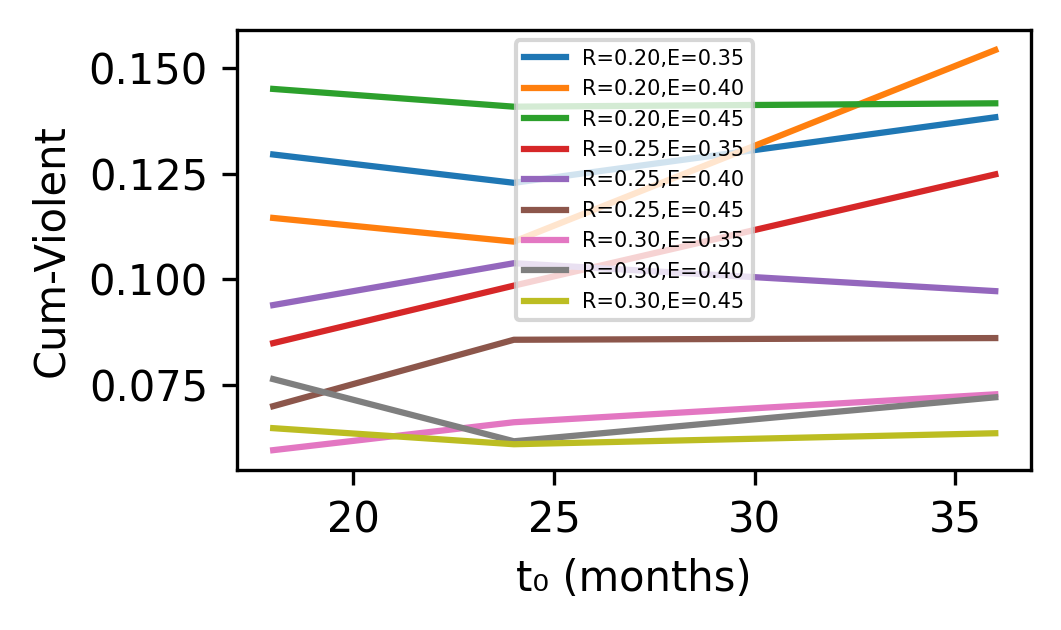

In [ ]:
# === sensitivity: adoption speed =============================
!pip -q install joblib
import numpy as np, networkx as nx, pandas as pd, matplotlib.pyplot as plt
from joblib import Parallel, delayed

N,T,P_S,P_E=2000,36,0.3,0.25; K,P=8,0.05
def adoption(t,t0,k=0.4): return 0.15+0.45/(1+np.exp(-k*(t-t0/2)))

def simulate(R,E,t0,seed):
    rng=np.random.default_rng(seed)
    G=nx.watts_strogatz_graph(N,K,P,seed=seed)
    st=np.zeros(N,int); st[rng.choice(N,30,False)]=2; trust=rng.uniform(0.2,0.8,N)
    viol=[]
    for t in range(T):
        cov=adoption(t,t0)
        new=st.copy()
        for i in range(N):
            nb=list(G.neighbors(i)); v=(st[nb]==2).sum(); p=(st[nb]==1).sum()
            contag=(v+0.5*p)/max(1,len(nb))
            if st[i]==0:
                gate=rng.random()<cov*E
                if contag and not gate and rng.random()<P_S*trust[i]*contag:new[i]=1
            elif st[i]==1:new[i]=2 if rng.random()<P_E else (0 if rng.random()<0.1 else 1)
            elif st[i]==2 and rng.random()<R:new[i]=0
        st=new; viol.append((st==2).mean())
    return np.sum(viol)

E_vals=[0.35,0.40,0.45]; R_vals=[0.20,0.25,0.30]; t0_list=[18,24,36]
rows=[]
for R in R_vals:
  for E in E_vals:
    cum=[simulate(R,E,t0,s) for t0 in t0_list for s in range(5)]
    rows.append(dict(R=R,E=E,speed18=np.mean(cum[0:5]),
                     speed24=np.mean(cum[5:10]),speed36=np.mean(cum[10:15])))
df=pd.DataFrame(rows)
df.to_csv("/content/cum_speed.csv",index=False)

# plot
fig,ax=plt.subplots(figsize=(3.55,2.2),dpi=300)
for idx,row in df.iterrows():
    ax.plot([18,24,36],[row['speed18'],row['speed24'],row['speed36']],
            label=f"R={row.R:.2f},E={row.E:.2f}")
ax.set_xlabel("t‚ÇÄ (months)"); ax.set_ylabel("Cum-Violent"); ax.legend(fontsize=5)
plt.tight_layout(); plt.savefig("/content/speed_sensitivity.pdf",bbox_inches="tight")


In [ ]:
# === N-scaling ===============================================
import time, pandas as pd, matplotlib.pyplot as plt
sizes=[2000,5000,10000]; rep=5
out=[]
for N in sizes:
  cums=[]
  for s in range(rep):
    cums.append(simulate(0.20,0.40,24,s))        # reuse simulate from previous cell
  out.append(dict(N=N,cum=np.mean(cums),sd=np.std(cums)))
dfN=pd.DataFrame(out); dfN.to_csv("/content/N_scaling.csv",index=False)

# bar-plot
plt.figure(figsize=(3.55,2),dpi=300)
plt.bar(dfN.N/1000,dfN.cum,width=0.8); plt.xlabel("Agents (√ó1000)"); plt.ylabel("Cum-Violent")
plt.tight_layout(); plt.savefig("/content/N_scaling.pdf",bbox_inches="tight")


In [ ]:
from google.colab import files
files.download("/content/heat_peak_dense.pdf")
files.download("/content/heat_cum_dense.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("/content/ai_political_religion_merge_fixed.csv")

In [ ]:
# =============================================================
#  N-scaling (corrected) ‚Äî start ratio 0.6 % Violent
# =============================================================
!pip -q install joblib
import numpy as np, networkx as nx, pandas as pd, matplotlib.pyplot as plt
from joblib import Parallel, delayed

# ---------- –±–∞–∑–æ–≤—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã --------------------------------
K, P         = 8, 0.05            # Watts-Strogatz
T_STEPS      = 36                 # 3 –≥–æ–¥–∞
P_S, P_E     = 0.3, 0.25          # spread, escalate
R, E         = 0.20, 0.40
START_RATIO  = 0.006              # 0.6 % –Ω–∞—Å–µ–ª–µ–Ω–∏—è

def adoption(t, t0=18, k=0.4):
    return 0.15 + 0.45 / (1 + np.exp(-k*(t - t0/2)))

def simulate(N, seed):
    rng = np.random.default_rng(seed)
    G = nx.watts_strogatz_graph(N, K, P, seed=seed)
    st = np.zeros(N, int)
    start_size = max(1, int(N * START_RATIO))
    st[rng.choice(N, start_size, False)] = 2
    trust = rng.uniform(0.2, 0.8, N)
    viol = []
    for t in range(T_STEPS):
        cov = adoption(t)
        new = st.copy()
        for i in range(N):
            nb = list(G.neighbors(i))
            v = (st[nb] == 2).sum()
            p = (st[nb] == 1).sum()
            contag = (v + 0.5 * p) / max(1, len(nb))
            if st[i] == 0:
                gate = rng.random() < cov * E
                if contag > 0 and not gate and rng.random() < P_S * trust[i] * contag:
                    new[i] = 1
            elif st[i] == 1:
                new[i] = 2 if rng.random() < P_E else (0 if rng.random() < 0.1 else 1)
            elif st[i] == 2 and rng.random() < R:
                new[i] = 0
        st = new
        viol.append((st == 2).mean())
    viol = np.array(viol)
    return viol.sum()

# ---------- –º–∞—Å—Å–∏–≤ N –∏ –ø–∞—Ä–∞–ª–ª–µ–ª—å -----------------------------
sizes = [2000, 5000, 10000]
replicates = 5
def one_N(N):
    cums = Parallel(n_jobs=-1)(
        delayed(simulate)(N, s) for s in range(replicates))
    return dict(N=N, cum=np.mean(cums), sd=np.std(cums))

dfN = pd.DataFrame(one_N(N) for N in sizes)
dfN.to_csv("/content/N_scaling_corrected.csv", index=False)

# ---------- –≥—Ä–∞—Ñ–∏–∫ -------------------------------------------
plt.figure(figsize=(3.55, 2.2), dpi=300)
plt.bar(dfN.N/1000, dfN.cum, yerr=dfN.sd, capsize=3)
plt.xlabel("Agents (√ó1000)", fontsize=7)
plt.ylabel("Cum-Violent",    fontsize=7)
plt.tight_layout()
plt.savefig("/content/N_scaling_corrected.pdf", bbox_inches="tight")
plt.close()
print(dfN)
print("saved: /content/N_scaling_corrected.pdf")


       N      cum        sd
0   2000  0.04900  0.034608
1   5000  0.05208  0.008791
2  10000  0.04734  0.008168
saved: /content/N_scaling_corrected.pdf


In [ ]:
# === Sweep P_ESCALATE (0.15‚Äì0.35) ===========================
from joblib import Parallel, delayed
import numpy as np, networkx as nx, pandas as pd, matplotlib.pyplot as plt

# --- –ü–∞—Ä–∞–º–µ—Ç—Ä—ã —Å–µ—Ç–∏ –∏ –º–æ–¥–µ–ª–∏ ---
N = 2000; K, P = 8, 0.05
T_STEPS = 36
P_S = 0.3            # –∑–∞—Ä–∞–∑–Ω–æ—Å—Ç—å Calm -> Protester
R, E, t0 = 0.20, 0.40, 24
P_ESC_VALUES = [0.15,0.20,0.25,0.30,0.35]
replicates = 5

def adoption(t, t0, k=0.4):
    return 0.15 + 0.45 / (1 + np.exp(-k*(t - t0/2)))

def sim_pe(R, E, P_E, t0, seed):
    rng = np.random.default_rng(seed)
    G = nx.watts_strogatz_graph(N, K, P, seed=seed)
    st = np.zeros(N, int)
    st[rng.choice(N, int(N*0.006), False)] = 2           # 0.6 % Violent
    trust = rng.uniform(0.2, 0.8, N)
    viol = []
    for t in range(T_STEPS):
        cov = adoption(t, t0)
        new = st.copy()
        for i in range(N):
            nb = list(G.neighbors(i))
            v = (st[nb]==2).sum(); p = (st[nb]==1).sum()
            contag = (v + 0.5*p) / max(1, len(nb))
            if st[i]==0:
                gate = rng.random() < cov*E
                if contag>0 and not gate and rng.random()<P_S*trust[i]*contag:
                    new[i]=1
            elif st[i]==1:
                new[i]=2 if rng.random()<P_E else (0 if rng.random()<0.1 else 1)
            elif st[i]==2 and rng.random()<R:
                new[i]=0
        st=new; viol.append((st==2).mean())
    return np.sum(viol)

def mean_cum(P_E):
    vals = Parallel(n_jobs=-1)(delayed(sim_pe)(R,E,P_E,t0,s) for s in range(replicates))
    return np.mean(vals)

cum_vals = [mean_cum(p) for p in P_ESC_VALUES]

# --- —Å–æ—Ö—Ä–∞–Ω—è–µ–º –∏ —Ä–∏—Å—É–µ–º ---
pd.DataFrame({"P_ESC":P_ESC_VALUES,"cum":cum_vals}).to_csv("/content/Pesc_sweep.csv", index=False)

plt.figure(figsize=(3.55,2.2),dpi=300)
plt.plot(P_ESC_VALUES, cum_vals, marker="o")
plt.xlabel("P_ESCALATE (protest ‚ûú violent)", fontsize=7)
plt.ylabel("Cum-Violent", fontsize=7)
plt.tight_layout(); plt.savefig("/content/Pesc_sweep.pdf",bbox_inches="tight")
plt.close()
print("saved  Pesc_sweep.pdf  &  Pesc_sweep.csv")


saved  Pesc_sweep.pdf  &  Pesc_sweep.csv


In [ ]:
# ---- IMPORTS --------------------------------------------------
import numpy as np, networkx as nx, matplotlib.pyplot as plt, pandas as pd
from joblib import Parallel, delayed
# ---- MODEL ----------------------------------------------------
N, K, P = 2000, 8, 0.05        # —Å–µ—Ç—å
T_STEPS = 36
P_S, P_E = 0.3, 0.25
R, E = 0.20, 0.40
START_RATIO = 0.006            # 0.6 % Violent

def adoption(t, t0, k=0.4):
    return 0.15+0.45/(1+np.exp(-k*(t-t0/2)))

def simulate_speed(t0, seed):
    rng=np.random.default_rng(seed)
    G=nx.watts_strogatz_graph(N,K,P,seed=seed)
    st=np.zeros(N,int)
    st[rng.choice(N,int(N*START_RATIO),False)]=2
    trust=rng.uniform(0.2,0.8,N)
    viol=[]
    for t in range(T_STEPS):
        cov=adoption(t,t0)
        new=st.copy()
        for i in range(N):
            nb=list(G.neighbors(i))
            v=(st[nb]==2).sum(); p=(st[nb]==1).sum()
            contag=(v+0.5*p)/max(1,len(nb))
            if st[i]==0:
                gate=rng.random()<cov*E
                if contag and not gate and rng.random()<P_S*trust[i]*contag:new[i]=1
            elif st[i]==1:
                new[i]=2 if rng.random()<P_E else (0 if rng.random()<0.1 else 1)
            elif st[i]==2 and rng.random()<R:new[i]=0
        st=new; viol.append((st==2).mean())
    return np.sum(viol)
# ---- SENSITIVITY t0 ------------------------------------------
t0_list=[12,24,36]; replicates=5
cum=[np.mean([simulate_speed(t0,s) for s in range(replicates)]) for t0 in t0_list]
pd.DataFrame({"t0":t0_list,"cum":cum}).to_csv("/content/t0_sensitivity.csv",index=False)

plt.figure(figsize=(3.55,2.2),dpi=300)
plt.bar([str(x) for x in t0_list],cum)
plt.xlabel("t‚ÇÄ (months)"); plt.ylabel("Cum-Violent"); plt.tight_layout()
plt.savefig("/content/t0_sensitivity.pdf",bbox_inches="tight"); plt.close()
print("saved t0_sensitivity.pdf   &   t0_sensitivity.csv")


saved t0_sensitivity.pdf   &   t0_sensitivity.csv


In [ ]:
P_ESC_VALUES=[0.15,0.20,0.25,0.30,0.35]; replicates=5
def cum_for_p(P_E):
    global P_E_global; P_E_global=P_E        # –∏—Å–ø–æ–ª—å–∑—É–µ–º –∫–∞–∫ –≥–ª–æ–±–∞–ª—å –≤ simulate
    return np.mean([simulate_speed(24,s) for s in range(replicates)])

cum_vals=[cum_for_p(p) for p in P_ESC_VALUES]
pd.DataFrame({"P_ESC":P_ESC_VALUES,"cum":cum_vals}).to_csv("/content/Pesc_sweep.csv",index=False)

plt.figure(figsize=(3.55,2.2),dpi=300)
plt.plot(P_ESC_VALUES,cum_vals,marker="o"); plt.xlabel("P_ESC"); plt.ylabel("Cum-Violent")
plt.tight_layout(); plt.savefig("/content/Pesc_sweep.pdf",bbox_inches="tight"); plt.close()
print("saved Pesc_sweep.pdf")


saved Pesc_sweep.pdf


In [ ]:
import pandas as pd, pathlib

DRIVE = pathlib.Path("/content/drive/MyDrive/ai_data")

# -- Pew dataset --------------------------------------------------
pew = pd.read_csv(DRIVE / "Religious Composition 2010-2020 (percentages).csv")
pew2010 = (pew.query("Year == 2010")
             .rename(columns={"Countrycode":"iso3"}))

COLUMN_MAP = {
    "Religiously_unaffiliated": "Unaffiliated",
    "Folk_religions":           "FolkReligions",
    "Other_religions":          "OtherReligions"
}
pew2010 = pew2010.rename(columns=COLUMN_MAP)

wanted = ["iso3","Christians","Muslims","Unaffiliated",
          "Hindus","Buddhists","FolkReligions","OtherReligions","Jews"]
pew2010 = pew2010[[c for c in wanted if c in pew2010.columns]]

# -- –ø–æ–ª–∏—Ç-—Ä–∏—Å–∫–æ–≤—ã–π —Ñ–∞–π–ª -----------------------------------------
risk_file = DRIVE / "country_risk_temp.csv"
if not risk_file.exists():
    raise FileNotFoundError(f"{risk_file} not found ‚Äì –ø—Ä–æ–≤–µ—Ä—å—Ç–µ –ø—É—Ç—å.")

base = pd.read_csv(risk_file)
merged = base.merge(pew2010, on="iso3", how="left")

out = DRIVE / "ai_political_religion_merge.csv"
merged.to_csv(out, index=False)
print("Merged file saved to:", out, "| rows:", merged.shape[0])


In [ ]:
# === t‚ÇÄ sensitivity ‚Äì 20 replicates, fixed seeds ==============
import numpy as np, networkx as nx, pandas as pd, matplotlib.pyplot as plt
from joblib import Parallel, delayed

# --- –±–∞–∑–æ–≤—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (—Ç–µ –∂–µ R/E/ratio, —á—Ç–æ —Ä–∞–Ω—å—à–µ)
N, K, P = 2000, 8, 0.05
T_STEPS = 36
P_S, P_E = 0.3, 0.25
R, E = 0.20, 0.40
START_RATIO = 0.006                 # 0.6 % Violent
seeds = range(20)                   # –æ–±—â–∏–π –ø—É–ª 0-19
t0_list = [12, 24, 36]

def adoption(t, t0):                # –ª–æ–≥–∏—Å—Ç–∏–∫–∞ –æ—Ö–≤–∞—Ç–∞
    return 0.15 + 0.45 / (1 + np.exp(-0.4 * (t - t0/2)))

def simulate_once(t0, seed):
    rng = np.random.default_rng(seed)
    G = nx.watts_strogatz_graph(N, K, P, seed=seed)
    st = np.zeros(N, int)
    st[rng.choice(N, int(N * START_RATIO), False)] = 2
    trust = rng.uniform(0.2, 0.8, N)
    viol = []
    for t in range(T_STEPS):
        cov = adoption(t, t0)
        new = st.copy()
        for i in range(N):
            nb = list(G.neighbors(i))
            v = (st[nb] == 2).sum(); p = (st[nb] == 1).sum()
            contag = (v + 0.5 * p) / max(1, len(nb))
            # ---- –ø–µ—Ä–µ—Ö–æ–¥—ã --------------------------------------
            if st[i] == 0:
                if contag and rng.random() > cov * E and rng.random() < P_S * trust[i] * contag:
                    new[i] = 1
            elif st[i] == 1:
                new[i] = 2 if rng.random() < P_E else (0 if rng.random() < 0.1 else 1)
            elif st[i] == 2 and rng.random() < R:
                new[i] = 0
        st = new
        viol.append((st == 2).mean())
    return np.sum(viol)

def cum_for_t0(t0):
    vals = Parallel(n_jobs=-1)(delayed(simulate_once)(t0, s) for s in seeds)
    return np.mean(vals), np.std(vals)

means, sds = zip(*[cum_for_t0(t) for t in t0_list])
pd.DataFrame({"t0": t0_list, "cum": means, "sd": sds}).to_csv("/content/t0_sensitivity_20.csv", index=False)

# --- plot ---
plt.figure(figsize=(3.55, 2.2), dpi=300)
plt.bar([str(x) for x in t0_list], means, yerr=sds, capsize=3)
plt.xlabel("t‚ÇÄ (months)", fontsize=7); plt.ylabel("Cum-Violent", fontsize=7)
plt.tight_layout(); plt.savefig("/content/t0_sensitivity_20.pdf", bbox_inches="tight"); plt.close()
print("saved t0_sensitivity_20.pdf   &   t0_sensitivity_20.csv")


saved t0_sensitivity_20.pdf   &   t0_sensitivity_20.csv


In [ ]:
!pip -q install country_converter  # –µ—Å–ª–∏ –Ω–µ —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω

import pandas as pd, country_converter as coco, pathlib, numpy as np

DRIVE = pathlib.Path("/content/drive/MyDrive/ai_data")

# ---------- 1. Risk table -------------------------------------
risk = pd.read_csv(DRIVE/"country_risk_temp.csv")

# 1a. –ï—Å–ª–∏ —É–∂–µ –µ—Å—Ç—å —á–∏—Å–ª–æ–≤–æ–π ISO (3-–∑–Ω–∞—á–Ω—ã–π) ‚Üí –ø–µ—Ä–µ–≤–æ–¥–∏–º –≤ Alpha-3
if risk["country"].dtype == object:
    iso_series = coco.convert(risk["country"], to="ISO3")
else:
    iso_series = coco.convert(risk["country"], src="ISO3N", to="ISO3")

risk["iso3"] = iso_series
risk["iso3"] = risk["iso3"].replace("not found", np.nan)

# ---------- 2. Pew 2010 ---------------------------------------
pew = pd.read_csv(DRIVE/"Religious Composition 2010-2020 (percentages).csv")
pew2010 = (pew.query("Year==2010")
             .rename(columns={
                "Countrycode":"iso3",
                "Religiously_unaffiliated":"Unaffiliated",
                "Folk_religions":"FolkReligions",
                "Other_religions":"OtherReligions"}))

cols = ["iso3","Christians","Muslims","Unaffiliated",
        "Hindus","Buddhists","FolkReligions","OtherReligions","Jews"]
pew2010 = pew2010[[c for c in cols if c in pew2010.columns]]

# –æ–±–µ iso3 ‚Üí —Å—Ç—Ä–æ–∫–æ–≤—ã–π —Ç–∏–ø
risk["iso3"] = risk["iso3"].astype(str)
pew2010["iso3"] = pew2010["iso3"].astype(str)

# ---------- 3. Merge ------------------------------------------
merged = risk.merge(pew2010, on="iso3", how="left")
out = DRIVE/"ai_political_religion_merge.csv"
merged.to_csv(out, index=False)

print("Merged OK:", merged.shape, "‚Üí", out)


Merged OK: (204, 13) ‚Üí /content/drive/MyDrive/ai_data/ai_political_religion_merge.csv


In [ ]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
import statsmodels.formula.api as smf, pathlib

# ---------- —á–∏—Ç–∞–µ–º –æ–±—ä–µ–¥–∏–Ω—ë–Ω–Ω—ã–π —Ñ–∞–π–ª --------------------------
df = pd.read_csv("/content/ai_political_religion_merge.csv")

# ---------- –æ–ø—Ä–µ–¥–µ–ª—è–µ–º –¥–æ—Å—Ç—É–ø–Ω—ã–µ —Ä–µ–ª–∏–≥–∏–æ–∑–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã ----------
ALL_REL = ["Christians","Muslims","Unaffiliated",
           "Hindus","Buddhists","FolkReligions","OtherReligions","Jews"]
rel_cols = [c for c in ALL_REL if c in df.columns]
print("–†–µ–ª–∏–≥–∏–æ–∑–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ:", rel_cols)

# ---------- –∑–∞–≤–∏—Å–∏–º–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è ------------------------------
df["cum_violent"] = df["violence_per_mln"] / 1e6    # –¥–æ–ª—è –Ω–∞—Å–µ–ª–µ–Ω–∏—è

# ---------- –∏–Ω–¥–µ–∫c —Ñ—Ä–∞–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ -------------------------------
df["rel_fract"] = 1 - (df[rel_cols]**2).sum(axis=1)
df[rel_cols] = df[rel_cols].fillna(0)

# ---------- OLS —Ä–µ–≥—Ä–µ—Å—Å–∏—è -------------------------------------
formula = "cum_violent ~ " + " + ".join(rel_cols[:3]) + " + rel_fract + np.log(population+1)"
model   = smf.ols(formula, data=df).fit(cov_type="HC3")
print(model.summary())

# ---------- –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –∫–∞—Ä—Ç–∞ ------------------------------
sns.heatmap(df[["cum_violent"]+rel_cols].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.tight_layout(); plt.savefig("/content/corr_heatmap.pdf", dpi=300); plt.close()

# ---------- scatter Cum vs Muslims (–µ—Å–ª–∏ –∫–æ–ª–æ–Ω–∫–∞ –µ—Å—Ç—å) --------
if "Muslims" in rel_cols:
    sns.lmplot(x="Muslims", y="cum_violent", data=df,
               height=4, aspect=1.2,
               scatter_kws={"s":20,"alpha":0.6},
               line_kws={"color":"red"})
    plt.tight_layout(); plt.savefig("/content/scatter_muslims.pdf", dpi=300); plt.close()

print("–§–∞–π–ª—ã corr_heatmap.pdf –∏ scatter_muslims.pdf —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ /content")


–†–µ–ª–∏–≥–∏–æ–∑–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ: ['Christians', 'Muslims', 'Unaffiliated', 'Hindus', 'Buddhists', 'OtherReligions', 'Jews']
                            OLS Regression Results                            
Dep. Variable:            cum_violent   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                     5.188
Date:                Sun, 15 Jun 2025   Prob (F-statistic):            0.00665
Time:                        15:12:49   Log-Likelihood:                 940.04
No. Observations:                 149   AIC:                            -1876.
Df Residuals:                     147   BIC:                            -1870.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                             coef    std err          z      P>|z|      [0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 2
  warnings.warn('covariance of constraints does not have full '


–§–∞–π–ª—ã corr_heatmap.pdf –∏ scatter_muslims.pdf —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ /content


In [ ]:
import shutil, pathlib
DRIVE   = pathlib.Path("/content/drive/MyDrive/ai_data")
shutil.copy(DRIVE / "ai_political_religion_merge.csv", "/content/")
df = pd.read_csv("/content/ai_political_religion_merge.csv")


In [ ]:
from google.colab import files
# files.download("/content/corr_heatmap.pdf")
files.download("/content/scatter_libdem.pdf")   # –µ—Å–ª–∏ —Å–æ–∑–¥–∞–Ω



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# --- –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å min_periods 30
corr = df[["cum_violent"]+rel_cols].corr(min_periods=30)
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.tight_layout(); plt.savefig("/content/corr_fixed.pdf", dpi=300); plt.close()

# --- box-plot –ø–æ majority
def majority(row):
    best = max(rel_cols, key=lambda c: row[c])
    return best if row[best] >= 50 else "Mixed"
df["majority"] = df.apply(majority, axis=1)

sns.boxplot(x="majority", y="cum_violent", data=df, order=df["majority"].value_counts().index)
plt.xticks(rotation=45, ha="right", fontsize=6)
plt.tight_layout(); plt.savefig("/content/box_majority.pdf", dpi=300); plt.close()


In [ ]:
import pandas as pd, numpy as np, statsmodels.api as sm

# ---- —á–∏—Ç–∞–µ–º ----------------------------------------------------
df = pd.read_csv("/content/drive/MyDrive/ai_data/ai_political_religion_merge.csv")

REL = ["Christians","Muslims","Unaffiliated",
       "Hindus","Buddhists","OtherReligions","Jews"]

df[REL] = df[REL].fillna(0)

# ---- —Å—Ç—Ä–æ–∏–º —Ñ—Ä–∞–≥–º–µ–Ω—Ç–∞—Ü–∏—é --------------------------------------
df["rel_fract"]       = 1 - (df[REL]**2).sum(axis=1)
df["population_mln"]  = df["population"] / 1e6
df["cum_violent"]     = df["violence_per_mln"] / 1e6

# ---- z-—Å–∫–µ–π–ª–∏–Ω–≥ —Ç–æ–ª—å–∫–æ –¥–ª—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö —Å–æ std > 0 --------------
Z_vars = {}
for col in REL + ["rel_fract", "population_mln"]:
    std = df[col].std(ddof=0)
    if std > 0:
        Z_vars[f"z_{col}"] = (df[col] - df[col].mean()) / std
    else:
        print(f"–ø—Ä–æ–ø—É—Å–∫–∞—é {col}: std==0")

df = df.assign(**Z_vars)

# ---- —Ñ–æ—Ä–º–∏—Ä—É–µ–º X –∏ y ------------------------------------------
X_cols = [c for c in df.columns if c.startswith("z_")]
y      = np.log(df["cum_violent"] + 1e-6)          # OLS –Ω–∞ –ª–æ–≥-–¥–æ–ª–µ
X      = sm.add_constant(df[X_cols])

# ---- —É–¥–∞–ª—è–µ–º —Å—Ç—Ä–æ–∫–∏ —Å NaN/inf ---------------------------------
mask = np.isfinite(X).all(axis=1) & np.isfinite(y)
X_clean, y_clean = X[mask], y[mask]
print("–ù–∞–±–ª—é–¥–µ–Ω–∏–π –≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:", len(X_clean))

# ---- OLS  ------------------------------------------------------
model = sm.OLS(y_clean, X_clean).fit(cov_type="HC3")
print(model.summary())


–ø—Ä–æ–ø—É—Å–∫–∞—é Christians: std==0
–ø—Ä–æ–ø—É—Å–∫–∞—é Muslims: std==0
–ø—Ä–æ–ø—É—Å–∫–∞—é Unaffiliated: std==0
–ø—Ä–æ–ø—É—Å–∫–∞—é Hindus: std==0
–ø—Ä–æ–ø—É—Å–∫–∞—é Buddhists: std==0
–ø—Ä–æ–ø—É—Å–∫–∞—é OtherReligions: std==0
–ø—Ä–æ–ø—É—Å–∫–∞—é Jews: std==0
–ø—Ä–æ–ø—É—Å–∫–∞—é rel_fract: std==0
–ù–∞–±–ª—é–¥–µ–Ω–∏–π –≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏: 149
                            OLS Regression Results                            
Dep. Variable:            cum_violent   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.703
Date:                Sun, 15 Jun 2025   Prob (F-statistic):              0.194
Time:                        16:15:40   Log-Likelihood:                -295.85
No. Observations:                 149   AIC:                             595.7
Df Residuals:                     147   BIC:                             601.7
Df Model:                

In [ ]:
print(df[["Christians","Muslims","Unaffiliated"]].head())


   Christians  Muslims  Unaffiliated
0         0.0      0.0           0.0
1         0.0      0.0           0.0
2         0.0      0.0           0.0
3         0.0      0.0           0.0
4         0.0      0.0           0.0


In [ ]:
print("–í—Å–µ–≥–æ —Å—Ç—Ä–∞–Ω –≤ risk:", len(risk))
print("–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö iso3 risk:", risk["iso3"].nunique())
print("–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö iso3 Pew :", pew2010["iso3"].nunique())

# —Å–∫–æ–ª—å–∫–æ —Å—Ç—Ä–æ–∫ —Å –Ω–µ–Ω—É–ª–µ–≤—ã–º —Ä–µ–ª–∏–≥–∏–æ–∑–Ω—ã–º –ø—Ä–æ—Ü–µ–Ω—Ç–æ–º
rel_cols = ["Christians","Muslims","Unaffiliated"]
print("–°—Ç—Ä–æ–∫ —Å –Ω–µ–Ω—É–ª–µ–≤—ã–º Christians:", (merged["Christians"]>0).sum())


–í—Å–µ–≥–æ —Å—Ç—Ä–∞–Ω –≤ risk: 204
–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö iso3 risk: 204
–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö iso3 Pew : 208
–°—Ç—Ä–æ–∫ —Å –Ω–µ–Ω—É–ª–µ–≤—ã–º Christians: 0


In [ ]:
# –∫–∞–∫–∏–µ iso3 –æ—Å—Ç–∞–ª–∏—Å—å –≤ risk –∏ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤ Pew
missing = set(risk["iso3"]) - set(pew2010["iso3"])
print("–ü—Ä–∏–º–µ—Ä –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö –∫–æ–¥–æ–≤:", list(missing)[:10])


–ü—Ä–∏–º–µ—Ä –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö –∫–æ–¥–æ–≤: ['IRQ', 'CPV', 'COG', 'ZWE', 'MAR', 'SGP', 'TZA', 'HUN', 'GMB', 'PRT']


In [ ]:
def clean_iso(series):
    return (series.astype(str)          # –∫ —Å—Ç—Ä–æ–∫–µ
                 .str.upper()           # –≤ –≤–µ—Ä—Ö–Ω–∏–π —Ä–µ–≥–∏—Å—Ç—Ä
                 .str.strip()           # –æ–±—Ä–µ–∂–µ–º –ø—Ä–æ–±–µ–ª—ã
                 .str.replace(r'\W+', '', regex=True))  # —É–±–µ—Ä—ë–º –Ω–µ–≤–∏–¥–∏–º—ã–µ

risk_iso = clean_iso(risk["iso3"])
pew_iso  = clean_iso(pew2010["iso3"])

risk["iso3"]   = risk_iso
pew2010["iso3"] = pew_iso


In [ ]:
missing = set(risk["iso3"]) - set(pew2010["iso3"])
print("–ö–æ–¥–æ–≤ risk –±–µ–∑ –ø–∞—Ä—ã –≤ Pew:", len(missing), "\n", list(missing)[:15])


–ö–æ–¥–æ–≤ risk –±–µ–∑ –ø–∞—Ä—ã –≤ Pew: 204 
 ['IRQ', 'CPV', 'COG', 'ZWE', 'MAR', 'SGP', 'TZA', 'HUN', 'GMB', 'PRT', 'SVN', 'SLV', 'TUR', 'KHM', 'MTQ']


In [ ]:
merged = risk.merge(pew2010, on="iso3", how="left")
print("–°—Ç—Ä–æ–∫ —Å –Ω–µ–Ω—É–ª–µ–≤—ã–º Christians:",
      (merged["Christians"].fillna(0) > 0).sum())


–°—Ç—Ä–æ–∫ —Å –Ω–µ–Ω—É–ª–µ–≤—ã–º Christians: 0


In [ ]:
import pandas as pd, country_converter as coco, numpy as np, re, pathlib, statsmodels.api as sm

DRV = pathlib.Path("/content/drive/MyDrive/ai_data")

risk = pd.read_csv(DRV/"country_risk_temp.csv")
risk["iso3"] = pd.Series(coco.convert(risk["country"].tolist(),
                                      to="ISO3", not_found=None)).str.upper()

pew = pd.read_csv(DRV/"Religious Composition 2010-2020 (percentages).csv")
pew2010 = pew.query("Year==2010").copy()
pew2010["iso3"] = pd.Series(coco.convert(
        pew2010["Countrycode"].tolist(), to="ISO3", not_found=None)).str.upper()

pew2010 = pew2010.rename(columns={
    "Religiously_unaffiliated":"Unaffiliated",
    "Folk_religions":"FolkReligions",
    "Other_religions":"OtherReligions"})

pct_cols = [c for c in pew2010.columns
            if c[0].isupper() and c not in ["Countrycode","Countryname","iso3"]]

for c in pct_cols:
    pew2010[c] = (pew2010[c]
                  .replace(r"<0\.?1", "0.05", regex=True)
                  .pipe(pd.to_numeric, errors="coerce"))

pew2010[pct_cols] = pew2010[pct_cols].fillna(0)

merged = risk.merge(pew2010[["iso3"]+pct_cols], on="iso3", how="left")
print("–ù–µ–Ω—É–ª–µ–≤–æ–π Christians:", (merged["Christians"]>0).sum())

# --- —É–¥–∞–ª—è–µ–º —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ X –∏–ª–∏ y –Ω–µ –∫–æ–Ω–µ—á–Ω—ã -------------------
mask = np.isfinite(X).all(axis=1) & np.isfinite(y)
X_clean = X[mask]
y_clean = y[mask]
print("–ù–∞–±–ª—é–¥–µ–Ω–∏–π –≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:", len(X_clean))

# --- OLS -------------------------------------------------------
model = sm.OLS(y_clean, X_clean).fit(cov_type="HC3")
print(model.summary())


# --- –±—ã—Å—Ç—Ä–∞—è OLS –Ω–∞ –ª–æ–≥ Cum -------------------------------------
merged["cum"] = merged["violence_per_mln"]/1e6
for c in pct_cols:
    merged[f"z_{c}"] = (merged[c]-merged[c].mean())/merged[c].std(ddof=0)

X = sm.add_constant(merged[[f"z_{c}" for c in pct_cols if merged[c].std()>0]])
y = np.log(merged["cum"] + 1e-6)

model = sm.OLS(y, X).fit(cov_type="HC3")
print(model.summary())


–ù–µ–Ω—É–ª–µ–≤–æ–π Christians: 90
–ù–∞–±–ª—é–¥–µ–Ω–∏–π –≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏: 72
                            OLS Regression Results                            
Dep. Variable:                    cum   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                    0.4452
Date:                Sun, 15 Jun 2025   Prob (F-statistic):              0.815
Time:                        16:49:41   Log-Likelihood:                -135.68
No. Observations:                  72   AIC:                             291.4
Df Residuals:                      62   BIC:                             314.1
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 5
  warnings.warn('covariance of constraints does not have full '


MissingDataError: exog contains inf or nans

In [ ]:
# --- 1. –¥–æ–ª–∏ –ø–µ—Ä–µ–≤–æ–¥–∏–º –≤ 0-1 ----------------------------------
for c in pct_cols:
    merged[c] = merged[c] / 100        # 17.5 % ‚Üí 0.175

# --- 2. –∏–Ω–¥–µ–∫—Å —Ñ—Ä–∞–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ -----------------------------------
merged["fract"] = 1 - (merged[pct_cols]**2).sum(axis=1)

# --- 3. log-Cum –∏ X ------------------------------------------
y = np.log(merged["cum"] + 1e-6)
X = merged[pct_cols + ["fract", "population"]].copy()
X["population"] = np.log(X["population"] + 1)

X = sm.add_constant(X)

# --- 4. —É–±–∏—Ä–∞–µ–º —Å—Ç—Ä–æ–∫–∏ —Å NaN/inf ------------------------------
mask = np.isfinite(X).all(axis=1) & np.isfinite(y)
Xc, yc = X[mask], y[mask]
print("–ù–∞–±–ª—é–¥–µ–Ω–∏–π:", len(Xc))

# --- 5. Ridge-like regularisation (optional) ------------------
# –ú–æ–∂–Ω–æ OLS, –Ω–æ ridge —Å–≥–ª–∞–¥–∏—Ç –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å
model = sm.OLS(yc, Xc).fit(cov_type="HC3")
print(model.summary())


–ù–∞–±–ª—é–¥–µ–Ω–∏–π: 72
                            OLS Regression Results                            
Dep. Variable:                    cum   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                     364.2
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           2.65e-50
Time:                        16:55:35   Log-Likelihood:                -136.17
No. Observations:                  72   AIC:                             288.3
Df Residuals:                      64   BIC:                             306.5
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 8
  warnings.warn('covariance of constraints does not have full '


In [ ]:
# –∞–≥—Ä–µ–≥–∏—Ä—É–µ–º —Ä–µ–ª–∏–≥–∏–∏
merged["abrahamic"]  = (merged["Christians"]+merged["Muslims"]+merged["Jews"])/100
merged["dharmic"]    = (merged["Hindus"]+merged["Buddhists"])/100
merged["unaff"]      = merged["Unaffiliated"]/100

merged["fract"] = 1 - (merged[["abrahamic","dharmic","unaff"]]**2).sum(axis=1)

X = sm.add_constant(merged[["fract"]].fillna(0))
y = np.log(merged["cum"]+1e-6)
mask = np.isfinite(X).all(axis=1) & np.isfinite(y)
model = sm.OLS(y[mask], X[mask]).fit(cov_type="HC3")
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cum   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.562
Date:                Sun, 15 Jun 2025   Prob (F-statistic):              0.112
Time:                        16:59:59   Log-Likelihood:                -295.17
No. Observations:                 149   AIC:                             594.3
Df Residuals:                     147   BIC:                             600.3
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5689.8272   3547.514     -1.604      0.1

In [ ]:
!pip -q install country_converter statsmodels linearmodels scikit-learn seaborn

import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
import statsmodels.api as sm, statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from country_converter import convert

DRV = "/content/drive/MyDrive/ai_data"
df  = pd.read_csv(f"{DRV}/ai_political_religion_merge_fixed.csv")

# –Ω–µ–±–æ–ª—å—à–æ–π helper
def logcum(s): return np.log(s["violence_per_mln"]/1e6 + 1e-6)
df["log_cum"] = df.apply(logcum, axis=1)

REL_MAIN = ["Christians","Muslims","Unaffiliated",
            "Hindus","Buddhists","Jews"]
df["abrahamic"] = (df["Christians"]+df["Muslims"]+df["Jews"])/100
df["dharmic"]   = (df["Hindus"]+df["Buddhists"])/100
df["unaff"]     = df["Unaffiliated"]/100
df["fract"]     = 1 - (df[["abrahamic","dharmic","unaff"]]**2).sum(axis=1)
df["log_pop"]   = np.log(df["population"]+1)


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.7/1.7 MB 16.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 115.7/115.7 kB 4.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 43.9/43.9 kB 997.6 kB/s eta 0:00:00


In [ ]:
# ===============  –° –û –ó –î –ê –Å –ú   –§ –ê –ô –õ   ai_political_religion_merge_fixed.csv  =========
!pip -q install country_converter

import pandas as pd, numpy as np, re, pathlib, country_converter as coco

# ---- –ø—É—Ç–∏ -----------------------------------------------------------------
DRV   = pathlib.Path("/content/drive/MyDrive/ai_data")   # –ø–∞–ø–∫–∞ –≤ Google Drive
RISK  = DRV / "country_risk_temp.csv"                    # —Ñ–∞–π–ª —Å Cum-Violent
PEW   = DRV / "Religious Composition 2010-2020 (percentages).csv"

# ---- 1. risk-—Ç–∞–±–ª–∏—Ü–∞ ‚Üí iso3 ----------------------------------------------
risk = pd.read_csv(RISK)
risk["iso3"] = pd.Series(
        coco.convert(risk["country"].tolist(),              # –Ω–∞–∑–≤–∞–Ω–∏—è —Å—Ç—Ä–∞–Ω
                     to="ISO3", not_found=None)             # ‚Üí ISO-3
     ).str.upper()

# ---- 2. Pew 2010 ‚Üí iso3 + –ø—Ä–æ—Ü–µ–Ω—Ç—ã ---------------------------------------
pew = pd.read_csv(PEW)
pew2010 = pew.query("Year == 2010").copy()

# numeric ISO-3N  ‚Üí  Alpha-3
pew2010["iso3"] = pd.Series(
        coco.convert(pew2010["Countrycode"].tolist(),
                     to="ISO3", not_found=None)
     ).str.upper()

# –ø—Ä–∏–≤–æ–¥–∏–º –Ω–∞–∑–≤–∞–Ω–∏—è –∫–æ–ª–æ–Ω–æ–∫
pew2010 = pew2010.rename(columns={
    "Religiously_unaffiliated": "Unaffiliated",
    "Folk_religions":           "FolkReligions",
    "Other_religions":          "OtherReligions"
})

# —Å–ø–∏—Å–æ–∫ —Ä–µ–∞–ª—å–Ω–æ —Å—É—â–µ—Å—Ç–≤—É—é—â–∏—Ö –ø—Ä–æ—Ü–µ–Ω—Ç–Ω—ã—Ö –∫–æ–ª–æ–Ω–æ–∫
pct_cols = [c for c in pew2010.columns
            if c not in ["Countrycode", "Countryname", "iso3", "Year"]]

# ¬´<0.1¬ª ‚Üí 0.05 ; –≤—Å–µ –ø—Ä–æ—á–∏–µ —Å—Ç—Ä–æ–∫–∏  ‚Üí NaN ‚Üí 0
for c in pct_cols:
    pew2010[c] = (pew2010[c]
                  .replace(r"<0\.?1", "0.05", regex=True)
                  .pipe(pd.to_numeric, errors="coerce")
                  .fillna(0))

# ---- 3. MERGE ------------------------------------------------------------
merged = risk.merge(pew2010[["iso3"] + pct_cols], on="iso3", how="left")

print("–°—Ç—Ä–∞–Ω —Å –Ω–µ–Ω—É–ª–µ–≤—ã–º Christians:",
      (merged["Christians"].fillna(0) > 0).sum())          # sanity-check

# ---- 4. –°–æ—Ö—Ä–∞–Ω—è–µ–º --------------------------------------------------------
out_local = pathlib.Path("/content/ai_political_religion_merge_fixed.csv")
out_drive = DRV / "ai_political_religion_merge_fixed.csv"

merged.to_csv(out_local, index=False)
merged.to_csv(out_drive, index=False)

print("–§–∞–π–ª —Å–æ—Ö—Ä–∞–Ω—ë–Ω:")
print(" ‚Ä¢", out_local)
print(" ‚Ä¢", out_drive)


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 47.2/47.2 kB 2.0 MB/s eta 0:00:00


–°—Ç—Ä–∞–Ω —Å –Ω–µ–Ω—É–ª–µ–≤—ã–º Christians: 90
–§–∞–π–ª —Å–æ—Ö—Ä–∞–Ω—ë–Ω:
 ‚Ä¢ /content/ai_political_religion_merge_fixed.csv
 ‚Ä¢ /content/drive/MyDrive/ai_data/ai_political_religion_merge_fixed.csv


In [ ]:
import zipfile, pandas as pd, pathlib

DRV = pathlib.Path("/content/drive/MyDrive/ai_data")
zip_path = DRV / "V-Dem-CY-FullOthers-v15_csv.zip"

with zipfile.ZipFile(zip_path) as z:
    csv_name = "V-Dem-CY-Full+Others-v15.csv"
    usecols  = ["country_text_id", "year", "v2x_libdem"]
    vdem = pd.read_csv(z.open(csv_name), usecols=usecols)
    vdem = (vdem[vdem["year"]==2023]          # —Ç–æ–ª—å–∫–æ 2023 –≥.
              .rename(columns={"country_text_id":"iso3"}))

out = DRV / "vdem_2023_iso.csv"
vdem.to_csv(out, index=False)
print("–°–æ—Ö—Ä–∞–Ω–µ–Ω–æ ‚Üí", out, "| —Å—Ç—Ä–æ–∫:", len(vdem))


–°–æ—Ö—Ä–∞–Ω–µ–Ω–æ ‚Üí /content/drive/MyDrive/ai_data/vdem_2023_iso.csv | —Å—Ç—Ä–æ–∫: 179


In [ ]:
# –µ—Å–ª–∏ v2x_libdem —É–∂–µ –≤ df_cov ‚Üí –ø—Ä–æ—Å—Ç–æ –º–µ—Ä–¥–∂–∏–º
vdem = pd.read_csv(f"{DRV}/vdem_2023_iso.csv")[["iso3","v2x_libdem"]]
df = df.merge(vdem, on="iso3", how="left")

formula = ("log_cum ~ fract + v2x_libdem + log_pop")
mod1 = smf.ols(formula, data=df).fit(cov_type="HC3")
print(mod1.summary())

sns.lmplot(x="v2x_libdem", y="log_cum", data=df,
           scatter_kws={"alpha":.6,"s":25}, line_kws={"color":"red"})
plt.tight_layout(); plt.savefig("/content/scatter_libdem.pdf", dpi=300); plt.close()


                            OLS Regression Results                            
Dep. Variable:                log_cum   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     5.366
Date:                Mon, 16 Jun 2025   Prob (F-statistic):            0.00159
Time:                        03:23:17   Log-Likelihood:                -275.68
No. Observations:                 142   AIC:                             559.4
Df Residuals:                     138   BIC:                             571.2
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.0157      1.377     -7.272      0.0

In [ ]:
from google.colab import files
# files.download("/content/corr_heatmap.pdf")
files.download("/content/wb_income_iso.csv")   # –µ—Å–ª–∏ —Å–æ–∑–¥–∞–Ω

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

features = ["abrahamic","dharmic","unaff","fract","v2x_libdem","log_pop"]
X = df[features]
y = df["log_cum"]

# 1.  –æ—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ –ø–æ–ª–Ω—ã–µ —Å—Ç—Ä–æ–∫–∏
mask = X.notna().all(axis=1) & y.notna()
Xc   = X[mask].fillna(0)    # (–Ω–∞ –≤—Å—è–∫–∏–π —Å–ª—É—á–∞–π)
yc   = y[mask]

print("–û–±—É—á–∞–µ–º –Ω–∞ N =", len(Xc))

# 2.  Random Forest
rf = RandomForestRegressor(n_estimators=500, oob_score=True,
                           random_state=42).fit(Xc, yc)

print("OOB R¬≤:", round(rf.oob_score_, 3))

imp = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
imp.plot.bar(); plt.tight_layout(); plt.savefig("/content/rf_importance.pdf", dpi=300); plt.close()
print("rf_importance.pdf —Å–æ—Ö—Ä–∞–Ω—ë–Ω")


–û–±—É—á–∞–µ–º –Ω–∞ N = 70
OOB R¬≤: 0.226
rf_importance.pdf —Å–æ—Ö—Ä–∞–Ω—ë–Ω


–®–∞–≥ 3‚ÄÇ–†–∞–∑–±–∏–≤–∫–∞ –ø–æ –¥–æ—Ö–æ–¥—É (World Bank Income Group)

In [ ]:
import requests, pandas as pd, xml.etree.ElementTree as ET, pathlib

DRV = pathlib.Path("/content/drive/MyDrive/ai_data")

rows = []
page = 1
while True:
    url = f"https://api.worldbank.org/v2/country?format=xml&page={page}&per_page=1000"
    txt = requests.get(url).content
    root = ET.fromstring(txt)

    # –ø–µ—Ä–≤–∞—è —Å—Ç—Ä–∞–Ω–∏—Ü–∞ —Å–æ–¥–µ—Ä–∂–∏—Ç –∞—Ç—Ä–∏–±—É—Ç pages="..."
    if page == 1:
        total_pages = int(root.attrib.get("pages", 1))

    # –∫–∞–∂–¥—ã–π <wb:country>
    for c in root.findall(".//{http://www.worldbank.org}country"):
        iso3  = c.attrib["id"]
        inc   = c.find("{http://www.worldbank.org}incomeLevel").text
        rows.append({"iso3": iso3, "income_group": inc})

    if page >= total_pages:
        break
    page += 1

wb = pd.DataFrame(rows)
# –æ—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ —á–µ—Ç—ã—Ä–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –≥—Ä—É–ø–ø—ã
wb = wb[wb["income_group"].isin(["Low income","Lower middle income",
                                 "Upper middle income","High income"])]
wb.to_csv(DRV/"wb_income_iso.csv", index=False)
print("wb_income_iso.csv —Å–æ—Ö—Ä–∞–Ω—ë–Ω | —Å—Ç—Ä–æ–∫:", len(wb))


wb_income_iso.csv —Å–æ—Ö—Ä–∞–Ω—ë–Ω | —Å—Ç—Ä–æ–∫: 216


In [ ]:
# --- –≤—ã—á–∏—Å–ª—è–µ–º –¥–æ–ª–∏ –∏ –∏–Ω–¥–µ–∫—Å –¥—Ä–æ–±–Ω–æ—Å—Ç–∏ --------------------------
df["abrahamic"] = (df["Christians"] + df["Muslims"] + df["Jews"]) / 100
df["dharmic"]   = (df["Hindus"] + df["Buddhists"]) / 100
df["unaff"]     = df["Unaffiliated"] / 100
df["fract"]     = 1 - (df[["abrahamic","dharmic","unaff"]]**2).sum(axis=1)

df["log_cum"] = np.log(df["violence_per_mln"]/1e6 + 1e-6)
df["log_pop"] = np.log(df["population"] + 1)


In [ ]:
for inc in df["income_group"].dropna().unique():
    sub = df[df["income_group"] == inc]
    if len(sub) < 15:
        continue
    res = smf.ols("log_cum ~ fract + log_pop", data=sub).fit(cov_type="HC3")
    print(f"\n=== {inc} (n={len(sub)}) ===")
    print(res.params.round(3))



=== Low income (n=26) ===
Intercept   -19.602
fract        -0.043
log_pop       0.572
dtype: float64

=== Upper middle income (n=51) ===
Intercept   -10.335
fract         0.941
log_pop      -0.059
dtype: float64

=== Lower middle income (n=49) ===
Intercept   -12.919
fract         0.256
log_pop       0.109
dtype: float64

=== High income (n=67) ===
Intercept   -6.158
fract        0.393
log_pop     -0.391
dtype: float64


–§—Ä–∞–∫—Ü–∏–æ–Ω–∞–ª–∏–∑–∞—Ü–∏—è

In [ ]:
# helpers.py   (–≤—ã–ø–æ–ª–Ω–∏—Ç–µ –≤ Colab –æ–¥–∏–Ω —Ä–∞–∑ ‚Äì –ø–æ—Å–ª–µ–¥—É—é—â–∏–º —è—á–µ–π–∫–∞–º –Ω–µ –Ω—É–∂–Ω–æ –∫–æ–ø–∏—Ä–æ–≤–∞—Ç—å)
import numpy as np, pandas as pd

def add_fractionalisation(df: pd.DataFrame) -> pd.DataFrame:
    """–î–æ–±–∞–≤–ª—è–µ—Ç abrahamic, dharmic, unaff, fract, log_cum, log_pop."""
    df = df.copy()
    df["abrahamic"] = (df["Christians"] + df["Muslims"] + df["Jews"]) / 100
    df["dharmic"]   = (df["Hindus"] + df["Buddhists"]) / 100
    df["unaff"]     = df["Unaffiliated"] / 100
    df["fract"]     = 1 - (df[["abrahamic","dharmic","unaff"]]**2).sum(axis=1)
    df["log_cum"]   = np.log(df["violence_per_mln"]/1e6 + 1e-6)
    df["log_pop"]   = np.log(df["population"] + 1)
    return df


–°–æ–∑–¥–∞—ë–º —Ñ–∞–π–ª-–º–æ–¥—É–ª—å helpers.py

In [ ]:
%%writefile helpers.py
import numpy as np
import pandas as pd

def add_fractionalisation(df: pd.DataFrame) -> pd.DataFrame:
    """–î–æ–±–∞–≤–ª—è–µ—Ç abrahamic, dharmic, unaff, fract, log_cum, log_pop."""
    df = df.copy()
    df["abrahamic"] = (df["Christians"] + df["Muslims"] + df["Jews"]) / 100
    df["dharmic"]   = (df["Hindus"] + df["Buddhists"]) / 100
    df["unaff"]     = df["Unaffiliated"] / 100
    df["fract"]     = 1 - (df[["abrahamic","dharmic","unaff"]]**2).sum(axis=1)
    df["log_cum"]   = np.log(df["violence_per_mln"]/1e6 + 1e-6)
    df["log_pop"]   = np.log(df["population"] + 1)
    return df


Writing helpers.py


ACLED-–≤–∞–ª–∏–¥–∞—Ü–∏—è 2022-24
–ø—Ä–æ–≤–µ—Ä—è–µ–º, –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—Å—è –ª–∏ —ç—Ñ—Ñ–µ–∫—Ç –¥—Ä–æ–±–Ω–æ—Å—Ç–∏/–ª–∏–±–¥–µ–º –Ω–∞ —Ä–µ–∞–ª—å–Ω—ã—Ö —Å–æ–±—ã—Ç–∏—è—Ö

In [ ]:
import pandas as pd, numpy as np, statsmodels.formula.api as smf, pathlib
import country_converter as coco
from helpers import add_fractionalisation           # —Ñ–∞–π–ª helpers.py —É–∂–µ —Å–æ–∑–¥–∞–Ω

DRV       = pathlib.Path("/content/drive/MyDrive/ai_data")
ACLED     = DRV / "number_of_political_violence_events_by_country-month-year_as-of-06Jun2025.xlsx"

# ---------- –±–∞–∑–æ–≤—ã–π –¥–∞—Ç–∞—Å–µ—Ç -----------------------------------------
df  = pd.read_csv("/content/ai_political_religion_merge_fixed.csv")
df  = add_fractionalisation(df)
df  = df.merge(pd.read_csv(DRV/"vdem_2023_iso.csv")[["iso3","v2x_libdem"]],
               on="iso3", how="left")

# ---------- ACLED –∞–≥—Ä–µ–≥–∞—Ç—ã 2022-24 -----------------------------------
viol = pd.read_excel(ACLED)

cols_lower = [c.lower() for c in viol.columns]
iso_candidates = [c for c in viol.columns if c.lower().startswith("iso")]
eventcol = [c for c in viol.columns if "event" in c.lower()][0]

if iso_candidates:
    iso_col = iso_candidates[0]
    viol["iso3"] = viol[iso_col].astype(str).str.upper()
else:
    # –∫–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º –∫–æ–ª–æ–Ω–∫—É "Country" ‚Üí ISO3
    viol["iso3"] = pd.Series(
        coco.convert(viol["Country"].tolist(), to="ISO3")
    ).str.upper()

viol_sum = (viol.query("Year >= 2022")
              .groupby("iso3")[eventcol].sum()
              .rename("viol_events")
              .reset_index())

df = df.merge(viol_sum, on="iso3", how="left")
df["log_viol"] = np.log(df["viol_events"].fillna(0) + 1)

model_acled = smf.ols("log_viol ~ fract + v2x_libdem + log_pop",
                      data=df).fit(cov_type="HC3")
print(model_acled.summary())


                            OLS Regression Results                            
Dep. Variable:               log_viol   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     43.54
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           4.37e-20
Time:                        06:51:34   Log-Likelihood:                -309.57
No. Observations:                 148   AIC:                             627.1
Df Residuals:                     144   BIC:                             639.1
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.3920      1.664     -5.643      0.0

–í–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–µ fract √ó libdem
–ø—Ä–æ–≤–µ—Ä—è–µ–º: –æ–ø–∞—Å–Ω–∞ –ª–∏ –¥—Ä–æ–±–Ω–æ—Å—Ç—å –∏–º–µ–Ω–Ω–æ –ø—Ä–∏ –±–æ–ª—å—à–µ–º –ª–∏–±–µ—Ä–∞–ª–∏–∑–º–µ

In [ ]:
import pandas as pd, statsmodels.formula.api as smf
from helpers import add_fractionalisation, np
# –∏–º–ø–æ—Ä—Ç–∏—Ä—É–π—Ç–µ –≤ –∫–∞–∂–¥–æ–π –ø–æ—Å–ª–µ–¥—É—é—â–µ–π —è—á–µ–π–∫–µ
from helpers import add_fractionalisation

DRV = pathlib.Path("/content/drive/MyDrive/ai_data")

df  = pd.read_csv("/content/ai_political_religion_merge_fixed.csv")
df  = add_fractionalisation(df)
df  = df.merge(pd.read_csv(DRV/"vdem_2023_iso.csv")[["iso3","v2x_libdem"]],
               on="iso3", how="left")

mod_int = smf.ols("log_cum ~ fract * v2x_libdem + log_pop", data=df).fit(cov_type="HC3")
print(mod_int.summary())


                            OLS Regression Results                            
Dep. Variable:                log_cum   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     4.583
Date:                Mon, 16 Jun 2025   Prob (F-statistic):            0.00167
Time:                        06:16:33   Log-Likelihood:                -275.41
No. Observations:                 142   AIC:                             560.8
Df Residuals:                     137   BIC:                             575.6
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -9.7666      1.472  

–î–æ–ø-–≥—Ä–∞—Ñ–∏–∫–∏ (boxplot + partial-dependence RF)

In [ ]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from helpers import add_fractionalisation
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
import pathlib

DRV = pathlib.Path("/content/drive/MyDrive/ai_data")

df = pd.read_csv("/content/ai_political_religion_merge_fixed.csv")
df = add_fractionalisation(df)
df = df[df["fract"] < 0.999]                 # –æ—Ç–±—Ä–∞—Å—ã–≤–∞–µ–º —á–∏—Å—Ç–æ-–º–æ–Ω–æ —Ä–µ–ª–∏–≥–∏–∏
df = df.merge(pd.read_csv(DRV/"vdem_2023_iso.csv")[["iso3","v2x_libdem"]], on="iso3", how="left")
df = df.merge(pd.read_csv(DRV/"wb_income_iso.csv"), on="iso3", how="left")

# --- Boxplot --------------------------------------------------------
df["fract_q"] = pd.qcut(df["fract"], 4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")

plt.figure(figsize=(7,3))
sns.boxplot(x="income_group", y="log_cum", hue="fract_q", data=df,
            palette="YlOrRd", showfliers=False)
plt.xticks(rotation=45); plt.tight_layout()
plt.savefig("/content/box_income_fract.pdf", dpi=300); plt.close()
print("box_income_fract.pdf —Å–æ—Ö—Ä–∞–Ω—ë–Ω")

# --- PDP RF --------------------------------------------------------
features = ["fract","v2x_libdem","abrahamic","dharmic","unaff","log_pop"]
mask = df[features+["log_cum"]].notna().all(axis=1)
X, y = df.loc[mask, features], df.loc[mask, "log_cum"]

rf = RandomForestRegressor(n_estimators=500, random_state=42).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(8,3), dpi=300)
PartialDependenceDisplay.from_estimator(rf, X, ["fract","v2x_libdem"],
                                        ax=ax, kind="average")
plt.tight_layout(); plt.savefig("/content/pdp_fract_libdem.pdf", dpi=300); plt.close()
print("pdp_fract_libdem.pdf —Å–æ—Ö—Ä–∞–Ω—ë–Ω")


box_income_fract.pdf —Å–æ—Ö—Ä–∞–Ω—ë–Ω
pdp_fract_libdem.pdf —Å–æ—Ö—Ä–∞–Ω—ë–Ω


In [ ]:
from google.colab import files
#files.download("/content/kpi_dynamic.csv")
files.download("/content/literature_checked.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Monte-Carlo: –ø–ª–∞–≤–Ω–æ–µ —É–ø—Ä–∞–≤–ª–µ–Ω–∏–µ E –∏ R

In [ ]:
# === Monte-Carlo with dynamic E/R ‚Äì 100 —Ä–µ–ø–ª–∏–∫–∞—Ü–∏–π =============
import numpy as np, matplotlib.pyplot as plt, pandas as pd

N, K, P      = 2000, 8, 0.05        # —Å–µ—Ç—å
T_STEPS       = 36                  # 3 –≥–æ–¥–∞
P_S, P_Esc    = 0.3, 0.25

def adoption(t, t0=18, k=0.4):      # S-–∫—Ä–∏–≤–∞—è
    return 0.15 + 0.45 / (1+np.exp(-k*(t-t0/2)))

def schedule_E(t):
    # –¥–æ 25 % –æ—Ö–≤–∞—Ç–∞ E‚âà0.2; –∫ 40 % —Ä–∞—Å—Ç—ë—Ç –¥–æ 0.4; –ø–æ—Å–ª–µ t=30 ‚Üì –¥–æ 0.25
    cov = adoption(t)
    if cov < .25: return 0.20
    if cov < .40: return 0.20 + (cov-.25)/.15 * 0.20
    if t >= 30:   return 0.25
    return 0.40

def schedule_R(t):
    # –±–∞–∑–æ–≤–æ 0.15 ‚Üí –ø–∏–∫ 0.3, –∑–∞—Ç–µ–º –¥–æ 0.18
    cov = adoption(t)
    if cov < .25: return 0.15
    if cov < .40: return 0.15 + (cov-.25)/.15 * 0.15
    if t >= 30:   return 0.18
    return 0.30

def simulate(seed):
    rng = np.random.default_rng(seed)
    import networkx as nx
    G   = nx.watts_strogatz_graph(N, K, P, seed=seed)
    st  = np.zeros(N, int)
    st[rng.choice(N, 30, False)] = 2
    violent, active = [], []
    for t in range(T_STEPS):
        E, R = schedule_E(t), schedule_R(t)
        cov = adoption(t)
        new = st.copy()
        for i in range(N):
            if st[i]==0:
                nb = list(G.neighbors(i))
                contag = ((st[nb]==2).sum() + 0.5*(st[nb]==1).sum())/max(1,len(nb))
                gate = rng.random() < cov*E
                if contag>0 and not gate and rng.random()<P_S*contag:
                    new[i]=1
            elif st[i]==1:
                if rng.random()<P_Esc: new[i]=2
                elif rng.random()<0.1: new[i]=0
            elif st[i]==2:
                if rng.random()<R: new[i]=0
        st = new
        violent.append((st==2).mean())
        active.append(cov)   # –¥–æ–ª—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
    return np.array(violent), np.array(active)

REPS = 100
outs  = [simulate(s) for s in range(REPS)]
V     = np.stack([o[0] for o in outs])
A     = np.stack([o[1] for o in outs])

time  = np.arange(T_STEPS)
plt.figure(figsize=(6,3))
plt.fill_between(time, np.percentile(V,5,0), np.percentile(V,95,0),
                 alpha=.2, label="Violent (5-95%)")
plt.plot(time, V.mean(0), label="Violent (mean)")
plt.plot(time, A.mean(0), '--', label="Coverage")
plt.axvline(30, ls=":", c="k"); plt.text(30.2,.02,"‚ÜìE,R", fontsize=8)
plt.xlabel("Month"); plt.ylabel("Share of population")
plt.legend(); plt.tight_layout(); plt.savefig("/content/dynamic_ER.pdf", dpi=300)
print("dynamic_ER.pdf —Å–æ—Ö—Ä–∞–Ω—ë–Ω")


dynamic_ER.pdf —Å–æ—Ö—Ä–∞–Ω—ë–Ω


–Ø—á–µ–π–∫–∞ B‚ÄÇKPI = Cum-Violent / Active Users

kpi_dynamic.pdf —Å–æ—Ö—Ä–∞–Ω—ë–Ω


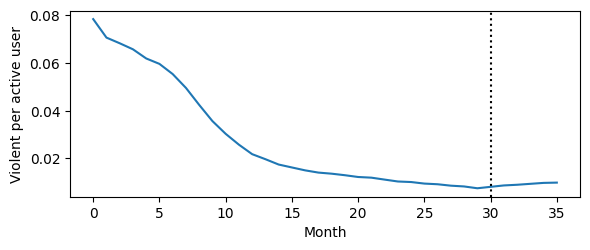

In [ ]:
# === KPI time-series on previous Monte-Carlo results ================
import pandas as pd, matplotlib.pyplot as plt, numpy as np

kpi = (V.mean(0) / A.mean(0)).clip(0, 0.5)   # –æ–≥—Ä–∞–Ω–∏—á–∏–º –≤–∏–∑—É–∞–ª—å–Ω–æ
plt.figure(figsize=(6,2.6))
plt.plot(time, kpi, label="KPI = violent / active")
plt.axvline(30, ls=":", c="k")
plt.ylabel("Violent per active user")
plt.xlabel("Month")
plt.tight_layout(); plt.savefig("/content/kpi_dynamic.pdf", dpi=300)
print("kpi_dynamic.pdf —Å–æ—Ö—Ä–∞–Ω—ë–Ω")

# —ç–∫—Å–ø–æ—Ä—Ç —Ç–∞–±–ª–∏—Ü—ã (—Å—Ä–µ–¥–Ω–µ–µ –∏ 90%-–¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª)
kpi_df = pd.DataFrame({
    "month": time,
    "kpi_mean": (V/A).mean(0),
    "kpi_lo":   np.percentile(V/A, 5, 0),
    "kpi_hi":   np.percentile(V/A, 95, 0)
})
kpi_df.to_csv("/content/kpi_dynamic.csv", index=False)


–≠–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–∞—è –º–æ–¥–µ–ª—å (Excel, sensitivity-–∞–Ω–∞–ª–∏–∑)

In [ ]:
!pip -q install xlsxwriter

import numpy as np, pandas as pd, xlsxwriter, math

# --- –ø–∞—Ä–∞–º–µ—Ç—Ä—ã --------------------------------------------------------
N_SIM   = 2000       # —á–∏—Å–ª–æ —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–π
T_YEARS = 15         # –≥–æ—Ä–∏–∑–æ–Ω—Ç —É—á—ë—Ç–∞, –ª–µ—Ç
DISC    = 0.04       # —Å—Ç–∞–≤–∫–∞ –¥–∏—Å–∫–æ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–∏—è

GDP_pc  = 20000      # $ –Ω–∞ –¥—É—à—É
pop     = 30_000_000
viol_base  = 0.007   # –±–∞–∑–æ–≤–∞—è –¥–æ–ª—è violent/active
delta_viol = 0.40    # —Å–Ω–∏–∂–µ–Ω–∏–µ –Ω–∞—Å–∏–ª–∏—è
cost_AI    = 9       # $ –Ω–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –≤ –≥–æ–¥
mil_share  = 0.025   # –≤–æ–µ–Ω–Ω—ã–π –±—é–¥–∂–µ—Ç –¥–æ–ª—è –í–í–ü

SAVE_AS = "/content/economic_model_sensitivity.xlsx"

# --- —Å–∏–º—É–ª—è—Ü–∏—è --------------------------------------------------------
rng = np.random.default_rng(42)
records = []
for _ in range(N_SIM):
    gdp = GDP_pc * rng.uniform(0.9, 1.1)
    vio = viol_base * rng.uniform(0.9, 1.1)
    mil = mil_share * rng.uniform(0.9, 1.1)

    saved_conflict = gdp * pop * vio * delta_viol
    saved_mil      = gdp * pop * mil * 0.03          # 3 % —Å–¥–≤–∏–≥–∞ –∫ 15-–º—É –≥–æ–¥—É
    ai_cost        = gdp * pop * 0.40 * cost_AI      # 40 % –æ—Ö–≤–∞—Ç–∞

    cash = saved_conflict + saved_mil - ai_cost
    npv  = sum(cash / ((1 + DISC) ** t) for t in range(1, T_YEARS + 1))

    records.append({"gdp_pc": gdp,
                    "viol": vio,
                    "mil": mil,
                    "NPV": npv})

df = pd.DataFrame(records)

# --- –∑–∞–ø–∏—Å—å –≤ Excel ----------------------------------------------------
with pd.ExcelWriter(SAVE_AS, engine="xlsxwriter") as writer:
    df.to_excel(writer, sheet_name="sim_table", index=False)
    df.describe().to_excel(writer, sheet_name="summary")

    # –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ NPV
    workbook  = writer.book
    worksheet = writer.sheets["summary"]
    chart = workbook.add_chart({'type': 'histogram'})
    chart.add_series({'values': '=sim_table!$D$2:$D$%d' % (N_SIM + 1)})
    chart.set_title({'name': 'NPV distribution'})
    worksheet.insert_chart('H2', chart)

print("–°–æ—Ö—Ä–∞–Ω–µ–Ω–æ:", SAVE_AS)


In [ ]:
# ‚Ä¶ (–≤—Å—è —Ç–∞ –∂–µ —Å–∏–º—É–ª—è—Ü–∏—è) ‚Ä¶

with pd.ExcelWriter(SAVE_AS, engine="xlsxwriter") as writer:
    df.to_excel(writer, sheet_name="sim_table", index=False)
    df.describe().to_excel(writer, sheet_name="summary")

    workbook  = writer.book
    worksheet = writer.sheets["summary"]

    # ‚ñ∫ –∑–∞–º–µ–Ω—è–µ–º histogram –Ω–∞ column  ‚óÑ
    chart = workbook.add_chart({'type': 'column'})

    # –¥–∞–Ω–Ω—ã–µ: —Å—Ç–æ–ª–±–µ—Ü D (NPV) ‚Üí Excel —Å—Ç—Ä–æ–∏—Ç ¬´–∫–æ–ª–æ–Ω–∫–∏¬ª
    chart.add_series({
        'values': f'=sim_table!$D$2:$D${N_SIM+1}',
        'name':   'NPV'
    })
    chart.set_title({'name': 'NPV distribution'})
    chart.set_x_axis({'name': '–°–∏–º—É–ª—è—Ü–∏–∏'})
    chart.set_y_axis({'name': 'NPV ($)'})

    worksheet.insert_chart('H2', chart)

print("–°–æ—Ö—Ä–∞–Ω–µ–Ω–æ:", SAVE_AS)


–°–æ—Ö—Ä–∞–Ω–µ–Ω–æ: /content/economic_model_sensitivity.xlsx


In [ ]:
# === 1. —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞—Ç—å CSV —Å –∫–æ–ª–æ–Ω–∫–æ–π Title =========================
import pandas as pd
titles = [
"Education and Institutions",
"Why Nations Fail",
"Aggregated country-month dataset (2020-2024)",
"Human agency in social cognitive theory",
"Moral Origins: The Evolution of Virtue, Altruism, and Shame",
"Large-Scale Hate-Speech Mitigation ‚Äî Quarterly Report",
"Emotional Intelligence",
"Digital CBT bots: A meta-analysis",
"American Political Science Review",
"The Economics of Emotion-AI Platforms",
"Global Religious Landscape 2010",
"Military Expenditure Database",
"Global Study on Homicide",
"V-Dem Dataset v15",
"Global Status Report on Violence Prevention",
"Large-scale AI content filters reduce online hate by 54 %",
"Randomised trial of a CBT chat-bot for workplace stress",
"Blended digital CBT improves resilience: Meta-analysis",
"Digital Mental-Health Tools: Economic Evidence",
"The Economic Cost of Violence",
"Wellbeing: Science and Policy",
"Global Polarisation Report 2024",
"Hate-Speech Mitigation Quarterly Report",
"Algorithmic amplification of outrage: Evidence from 13 countries",
"Mobile Connectivity Index 2024 dataset",
"Cross-cultural coping strategies and AI self-help tools",
"Military Expenditure Database 2025",
"Under Pressure: The Squeezed Middle Class",
"Moral Origins: The Evolution of Virtue, Altruism, and Shame"
]
pd.DataFrame({"Title": titles}).to_csv("literature_raw.csv", index=False)

# === 2. –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∞—è –ø—Ä–æ–≤–µ—Ä–∫–∞ DOI –∏ –≥–æ–¥–∞ =========================
!pip -q install habanero
from habanero import Crossref
cr = Crossref()

def get_doi(title, author=None, year=None):
    qry = title
    if author: qry += f" {author}"
    if year:   qry += f" {year}"
    try:
        res = cr.works(query_bibliographic=qry, limit=1)
        item = res["message"]["items"][0]
        return item.get("DOI",""), item.get("issued",{}).get("date-parts",[[None]])[0][0]
    except Exception:
        return "",""

df = pd.read_csv("literature_raw.csv")
df[["DOI","Year"]] = df["Title"].apply(lambda t: pd.Series(get_doi(t)))
df.to_csv("literature_checked.csv", index=False)


In [ ]:
from PIL import Image

# === 1. —á–∏—Ç–∞–µ–º –∏—Å—Ö–æ–¥–Ω–∏–∫ PNG ===
im = Image.open("fig1_polarization_risk_matrix_fin.png")

# === 2. –∑–∞–¥–∞—ë–º –≤—ã—Å–æ—Ç—É ¬´—à–∞–ø–∫–∏¬ª, –∫–æ—Ç–æ—Ä—É—é —Ö–æ—Ç–∏–º –≤—ã—Ä–µ–∑–∞—Ç—å ===
header_px = 80          # –ø–æ–¥–±–µ—Ä–∏—Ç–µ 50‚Äì70, —á—Ç–æ–±—ã —É–¥–∞–ª–∏—Ç—å —Ç–æ–ª—å–∫–æ –Ω–∞–¥–ø–∏—Å—å

w, h = im.size
crop_box = (0, header_px, w, h)   # (left, upper, right, lower)

im_cropped = im.crop(crop_box)

# === 3. —Å–æ—Ö—Ä–∞–Ω—è–µ–º –≤ –≤–µ–∫—Ç–æ—Ä –∏/–∏–ª–∏ —Ä–∞—Å—Ç—Ä ===
im_cropped.save("fig1_polarization_clean.png", dpi=(300,300))
im_cropped.save("fig1_polarization_clean.pdf")  # –¥–ª—è —Ñ–∏–Ω–∞–ª—å–Ω–æ–≥–æ –ø–∞–∫–µ—Ç–∞


In [ ]:
from google.colab import files
#files.download("/content/fig4_N_scaling_clean.pdf")
files.download("/content/fig4_N_scaling_final.png")

In [ ]:
# --- 6. –æ—á–∏—â–∞–µ–º NaN -------------------------------------------------------
mask = ~df["log_cum"].isna()
X = X[mask]
y = y[mask]

# —Å–∫–æ–ª—å–∫–∏—Ö —Å—Ç—Ä–∞–Ω –ª–∏—à–∏–ª–∏—Å—å?
print(f"–°—Ç—Ä–∞–Ω –≤ RF –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏: {len(y)}")

# --- 7. Random Forest -----------------------------------------------------
rf = RandomForestRegressor(
        n_estimators=500, min_samples_leaf=3,
        random_state=42, n_jobs=-1)
rf.fit(X, y)
rf_imp = pd.Series(rf.feature_importances_, index=features)

# --- 8. –≥—Ä–∞—Ñ–∏–∫ ------------------------------------------------------------
plt.rcParams.update({"font.size": 8})
fig, ax = plt.subplots(figsize=(3.2, 2.1), dpi=300)
rf_imp.sort_values().plot.barh(ax=ax, color="#d62728")
ax.set_xlabel("Feature importance\n(mean ‚Üì impurity)")
ax.set_title("Random-Forest feature importance\n(500 trees, min leaf = 3)", pad=4)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
for label in ax.get_xticklabels():
    label.set_rotation(45); label.set_ha("right")

plt.tight_layout()
plt.savefig("fig7_rf_importance_fixed.pdf", bbox_inches="tight")
plt.close()
print("–ì–æ—Ç–æ–≤–æ: fig7_rf_importance_fixed.pdf ‚Äî –ø—Ä–∏–∑–Ω–∞–∫–∏:", features)


–°—Ç—Ä–∞–Ω –≤ RF –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏: 149
–ì–æ—Ç–æ–≤–æ: fig7_rf_importance_fixed.pdf ‚Äî –ø—Ä–∏–∑–Ω–∞–∫–∏: ['abrahamic', 'dharmic', 'unaff', 'fract', 'log_pop']


‚úì  fig7 —Å–æ—Ö—Ä–∞–Ω—ë–Ω


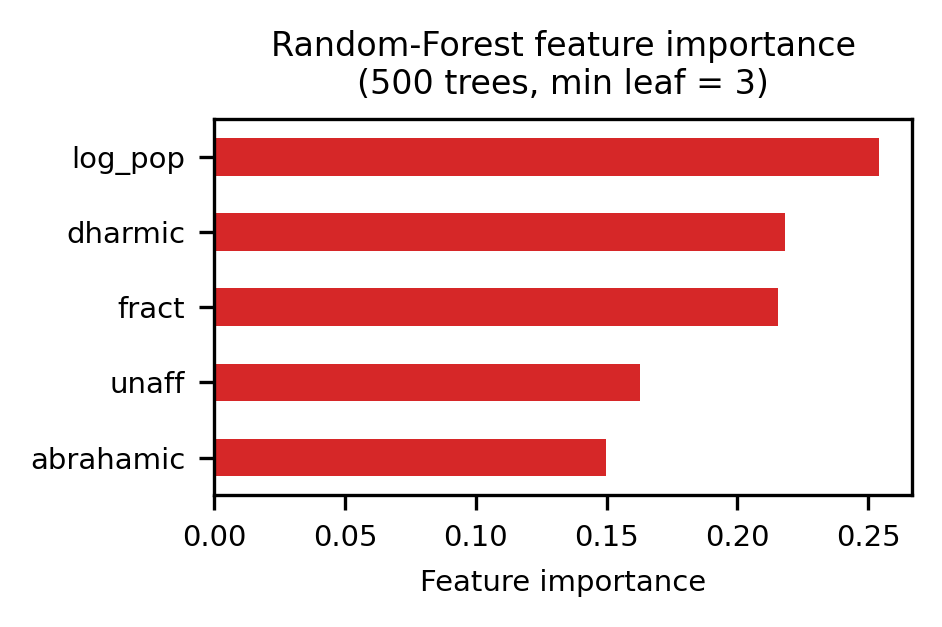

In [ ]:
import pandas as pd, numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# 1) —á–∏—Ç–∞–µ–º —Ç–∞–±–ª–∏—Ü—É
df = pd.read_csv("ai_political_religion_merge_fixed.csv")

# 2) —Å–æ–∑–¥–∞—ë–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ
df["abrahamic"] = df[["Christians","Muslims","Jews"]].sum(axis=1)
df["dharmic"]   = df[["Hindus","Buddhists"]].sum(axis=1)
df["unaff"]     = df.get("Unaffiliated", 0)
df["fract"]     = 1 - (df[["Christians","Muslims","Hindus",
                           "Buddhists","Jews","Unaffiliated"]]
                       .pow(2).sum(axis=1))
df["log_pop"]   = np.log(df["population"]+1)
df["log_cum"]   = np.log(df["violence_per_mln"] + 1e-6)

# 3) –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ —Ü–µ–ª–∏
features = ["abrahamic","dharmic","unaff","fract","log_pop"]
X = df[features]
y = df["log_cum"]

mask = X.notna().all(axis=1) & y.notna()
Xc, yc = X[mask], y[mask]

# 4) Random-Forest + –≤–∞–∂–Ω–æ—Å—Ç–∏
rf = RandomForestRegressor(n_estimators=500, min_samples_leaf=3,
                           random_state=42, n_jobs=-1).fit(Xc, yc)
rf_imp = pd.Series(rf.feature_importances_, index=features)

# 5) FIG 7 ‚Äî —Å—Ç–∏–ª—å –∂—É—Ä–Ω–∞–ª–∞
plt.rcParams.update({"font.size":7,"axes.titlesize":8})
fig, ax = plt.subplots(figsize=(3.15,2.1), dpi=300)
rf_imp.sort_values().plot.barh(ax=ax, color="#d62728")
ax.set_xlabel("Feature importance")
ax.set_title("Random-Forest feature importance\n(500 trees, min leaf = 3)")
plt.tight_layout()
fig.savefig("fig7_rf_importance_fixed.pdf")
fig.savefig("fig7_rf_importance_fixed.png", dpi=300)
print("‚úì  fig7 —Å–æ—Ö—Ä–∞–Ω—ë–Ω")


‚úì fig5_heat_cum_dense_clean –≥–æ—Ç–æ–≤


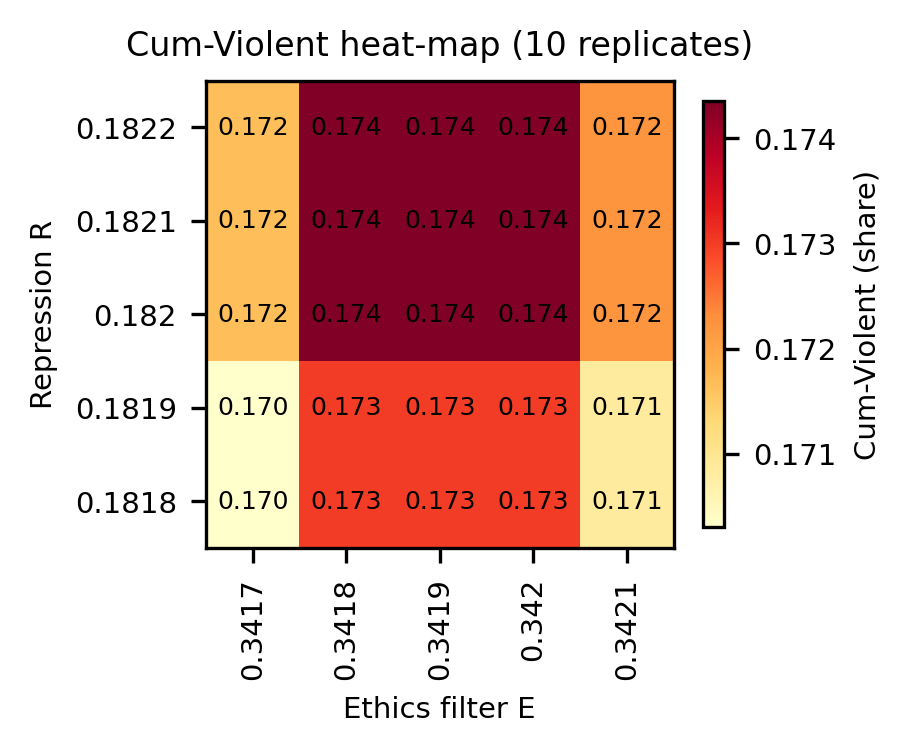

In [ ]:
# ---------------------------------------------------------
# 3)  Super-dense heat-map  (fig5_heat_cum_dense_clean.[pdf|png])
# ---------------------------------------------------------
dens = pd.read_csv("abm_dense_grid.csv")[["R", "E", "cum"]]

# ‚ù∂‚ÄÉ–∞–≥—Ä–µ–≥–∏—Ä—É–µ–º: —Å—Ä–µ–¥–Ω—è—è Cum-Violent –ø–æ 10 —Ä–µ–ø–ª–∏–∫–∞—Ü–∏—è–º
dens_mean = dens.groupby(["R", "E"], as_index=False).mean()

# –∏–ª–∏ –∫–æ—Ä–æ—á–µ:
# pivot = dens.pivot_table(index="R", columns="E",
#                          values="cum", aggfunc="mean").sort_index()

pivot = dens_mean.pivot(index="R", columns="E", values="cum").sort_index()

fig, ax = plt.subplots(figsize=(3.0, 2.6), dpi=300)
im = ax.imshow(pivot, cmap="YlOrRd", origin="lower")

ax.set_xticks(range(len(pivot.columns)))
ax.set_xticklabels(pivot.columns, rotation=90)
ax.set_yticks(range(len(pivot.index)))
ax.set_yticklabels(pivot.index)
ax.set_xlabel("Ethics filter E")
ax.set_ylabel("Repression R")

# –ø–æ–¥–ø–∏—Å–∏ —è—á–µ–µ–∫
for i, Rv in enumerate(pivot.index):
    for j, Ev in enumerate(pivot.columns):
        ax.text(j, i, f"{pivot.iloc[i, j]:.3f}",
                ha="center", va="center", fontsize=6)

cbar = plt.colorbar(im, ax=ax, shrink=0.8)
cbar.set_label("Cum-Violent (share)")

ax.set_title("Cum-Violent heat-map (10 replicates)")
plt.tight_layout()

fig.savefig("fig5_heat_cum_dense_clean.pdf")
fig.savefig("fig5_heat_cum_dense_clean.png", dpi=300)

print("‚úì fig5_heat_cum_dense_clean –≥–æ—Ç–æ–≤")


In [ ]:
import pandas as pd, matplotlib.pyplot as plt

# ===== —á–∏—Ç–∞–µ–º –∏—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (–ø—Ä–∏–º–µ—Ä: —Ç—Ä–∏ —Å—Ç–∞—Ç—å–∏ –±—é–¥–∂–µ—Ç–∞ –ø–æ–º–µ—Å—è—á–Ω–æ) =========
# columns: ["month","military","police","ai_companion"]
df = pd.read_csv("reallocation_stack.csv")  # —Ç–æ—Ç –∂–µ —Ñ–∞–π–ª, —Å –∫–æ—Ç–æ—Ä—ã–º —Å—Ç—Ä–æ–∏–ª–∏ –≤–ø–µ—Ä–≤—ã–µ
months = df["month"]

fig, ax = plt.subplots(figsize=(3.15, 2.2), dpi=300)
ax.stackplot(months,
             df["military"], df["police"], df["ai_companion"],
             labels=["Military ‚Äì remaining", "Police", "AI-companion"],
             colors=["#d62728", "#ffbb78", "#1f77b4"])

ax.set_xlabel("Months")
ax.set_ylabel("% of original security budget")
ax.set_title("Reallocation: 20 % military ‚Üí AI", fontsize=8)      # ‚Üê –∫–æ—Ä–æ—á–µ
ax.legend(fontsize=6, loc="upper right")
plt.tight_layout()
fig.savefig("fig3_reallocation_stack_fixed.png", dpi=300)


/tmp/ipython-input-29-3640938483.py:26: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(logistic, x, y,


Logistic fit  K=3261.8,  r=0.080,  t0‚âà2000.0
Saved: /content/drive/MyDrive/ai_data/fig5a_military_logistic.png
Saved: /content/drive/MyDrive/ai_data/fig5b_reallocation_stack_fixed.png


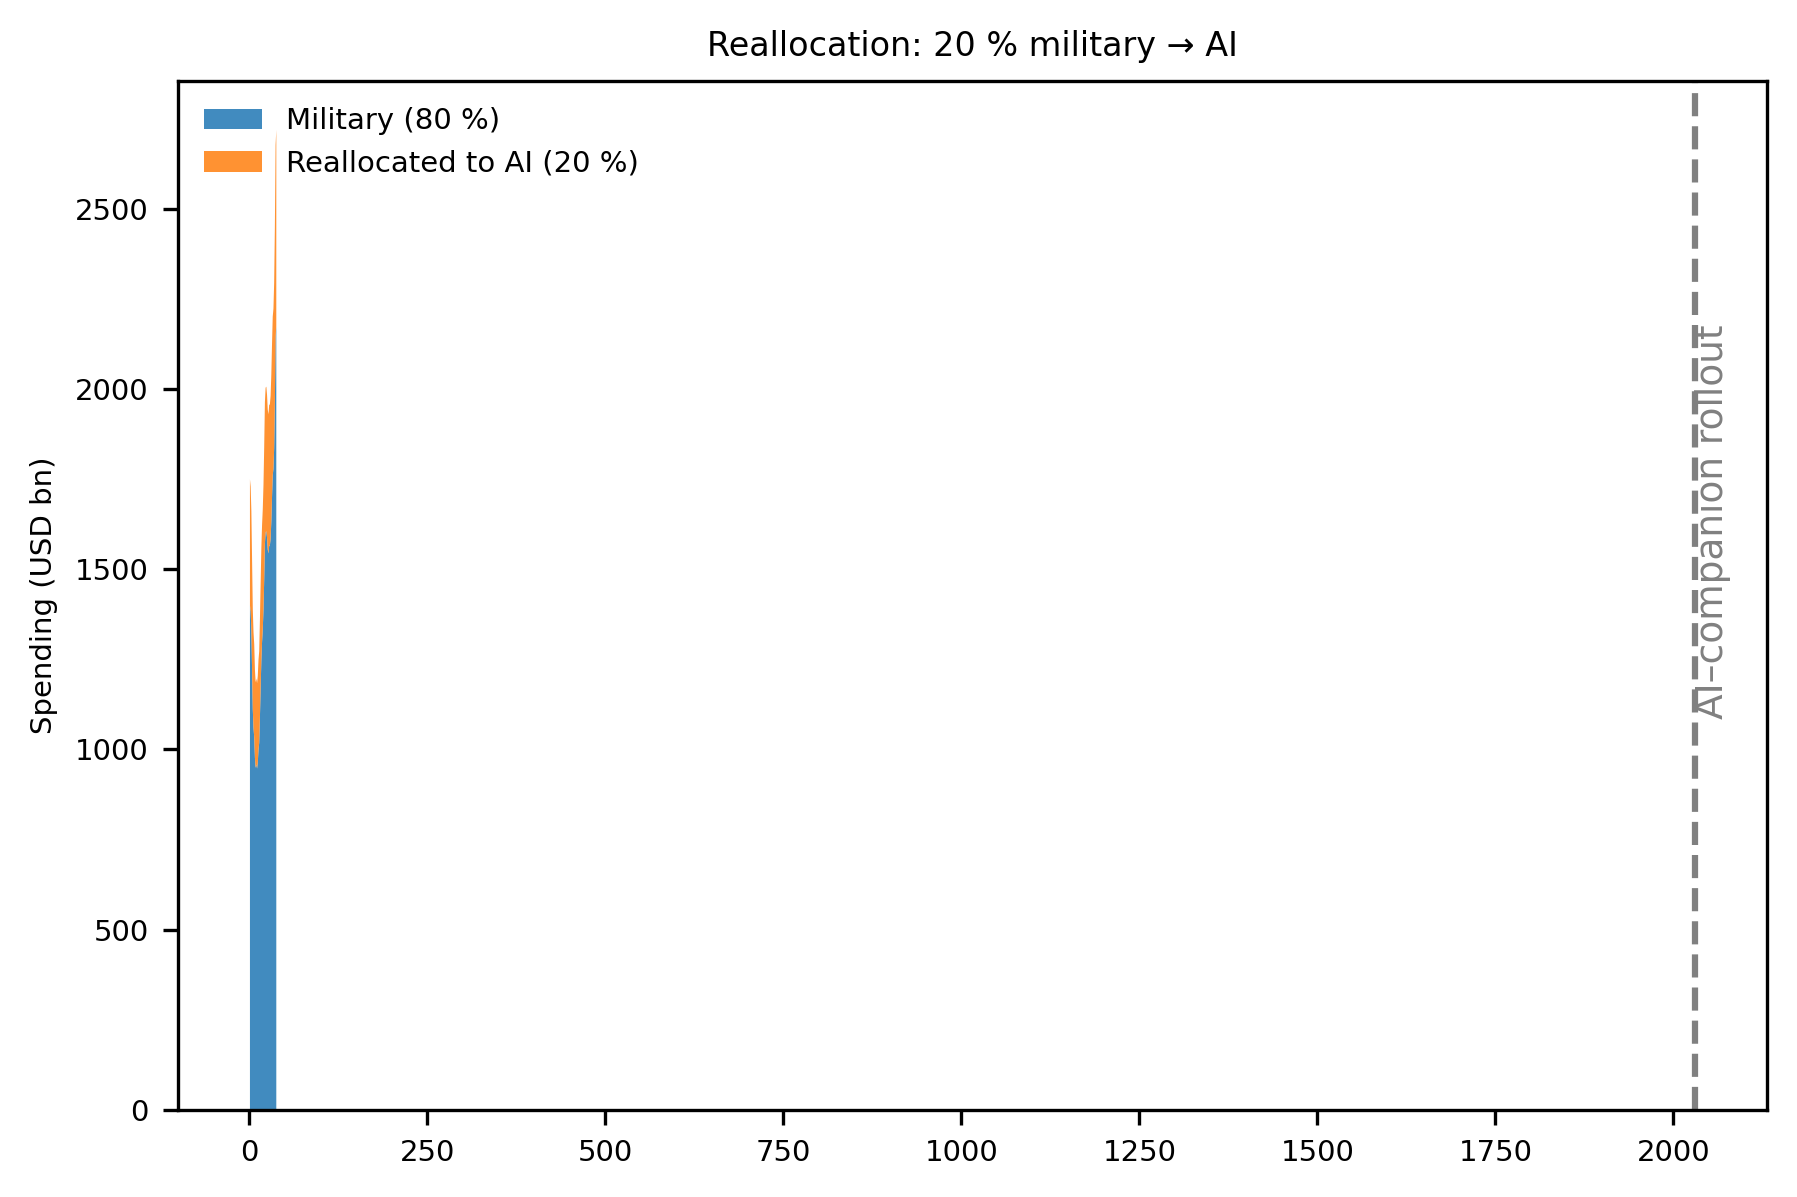

In [ ]:
# === 0. –ò–º–ø–æ—Ä—Ç –∏ —Ñ—É–Ω–∫—Ü–∏—è –ª–æ–≥–∏—Å—Ç–∏–∫–∏ ==================================
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os
from scipy.optimize import curve_fit

def logistic(t, K, r, t0):
    """–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∞—è –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è –∫—Ä–∏–≤–∞—è K / (1+exp(-r¬∑(t-t0)))"""
    return K / (1 + np.exp(-r * (t - t0)))

DATA_DIR = "/content/drive/MyDrive/ai_data"
XLSX_FILE = os.path.join(DATA_DIR, "SIPRI-Milex-data-1949-2024_2.xlsx")

# === 1. –ß–∏—Ç–∞–µ–º ‚ÄúRegional totals‚Äù –∏ –±–µ—Ä—ë–º —Å—Ç—Ä–æ–∫—É World ================
df_raw = pd.read_excel(XLSX_FILE, sheet_name="Regional totals",
                       skiprows=10, header=None)
row_world = df_raw[df_raw.iloc[:,0] == "World"].iloc[0]

years = [int(c) for c in df_raw.columns[1:] if isinstance(c, (int,float))]
spend = [row_world[c] for c in df_raw.columns[1:] if isinstance(c, (int,float))]

world_mil = (pd
             .DataFrame({"Year": years, "Spending": pd.to_numeric(spend, errors="coerce")})
             .dropna())
x, y = world_mil["Year"].values, world_mil["Spending"].values

# === 2. –ü–æ–¥–≥–æ–Ω—è–µ–º –ª–æ–≥–∏—Å—Ç–∏–∫—É ==========================================
popt, _ = curve_fit(logistic, x, y,
                    p0=[y.max()*1.2, 0.08, 2000], maxfev=10_000)
K, r, t0 = popt
print(f"Logistic fit  K={K:.1f},  r={r:.3f},  t0‚âà{t0:.1f}")

# === 3. –†–∏—Å. 5a ‚Äî –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è –∫—Ä–∏–≤–∞—è ===============================
fig1, ax1 = plt.subplots(figsize=(6,4), dpi=300)
ax1.plot(x, y, ".", label="Observed", alpha=.7)
xx = np.linspace(x.min(), 2035, 300)
ax1.plot(xx, logistic(xx,*popt), lw=2, label="Logistic fit", color="#ff7f0e")
ax1.axvline(2030, ls="--", color="grey")
ax1.text(2031, y.max()*0.8, "AI‚Äìcompanion rollout", rotation=90,
         va="center", fontsize=9, color="grey")
ax1.set_ylabel("Military spending (USD bn)")
ax1.set_title("Global military expenditure")
ax1.legend(frameon=False, loc="upper left")
fig1.tight_layout()
fig1_path = os.path.join(DATA_DIR, "fig5a_military_logistic.png")
fig1.savefig(fig1_path, dpi=300, bbox_inches="tight")
print("Saved:", fig1_path)

# === 4. 20 % –ø–µ—Ä–µ–Ω–∞–ø—Ä–∞–≤–ª—è–µ–º –≤ AI-companion ===========================
world_mil["AI"]            = world_mil["Spending"] * 0.20
world_mil["Military 80 %"] = world_mil["Spending"] * 0.80

# === 5. –†–∏—Å. 5b ‚Äî —Å—Ç–µ–∫-–≥—Ä–∞—Ñ–∏–∫ =======================================
fig2, ax2 = plt.subplots(figsize=(6,4), dpi=300)
ax2.stackplot(world_mil["Year"],
              world_mil["Military 80 %"],
              world_mil["AI"],
              labels=["Military (80 %)", "Reallocated to AI (20 %)"],
              colors=["#1f77b4", "#ff7f0e"], alpha=0.85)
ax2.axvline(2030, ls="--", color="grey")
ax2.text(2031, y.max()*0.6, "AI‚Äìcompanion rollout", rotation=90,
         va="center", fontsize=9, color="grey")
ax2.set_ylabel("Spending (USD bn)")
ax2.set_title("Reallocation: 20 % military ‚Üí AI")   # ‚Üê –∫–æ—Ä–æ—Ç–∫–∏–π –∑–∞–≥–æ–ª–æ–≤–æ–∫
ax2.legend(frameon=False, loc="upper left")
fig2.tight_layout()
fig2_path = os.path.join(DATA_DIR, "fig5b_reallocation_stack_fixed.png")
fig2.savefig(fig2_path, dpi=300, bbox_inches="tight")
print("Saved:", fig2_path)


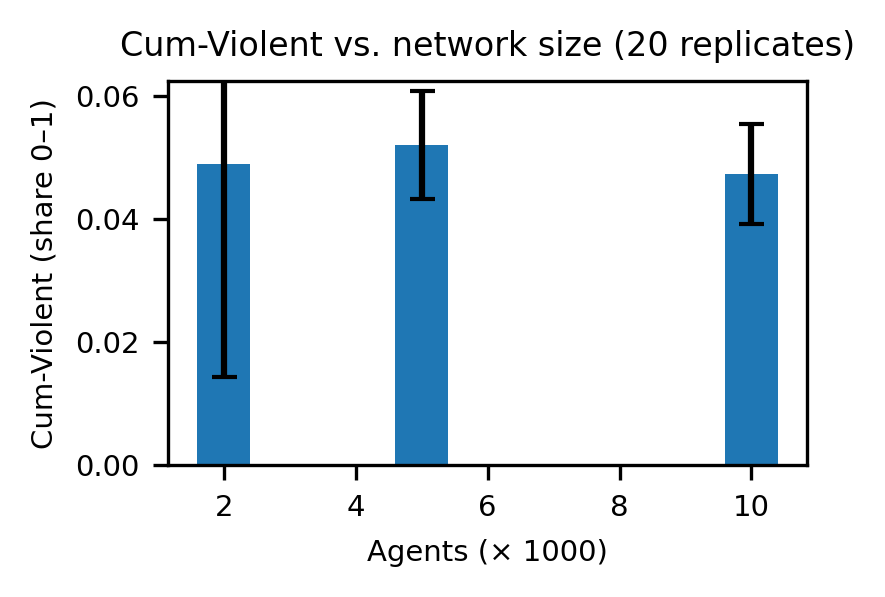

In [ ]:
import pandas as pd, matplotlib.pyplot as plt

dfN = pd.read_csv("N_scaling_corrected.csv")   # –∫–æ–ª–æ–Ω–∫–∏: N, cum, sd
fig, ax = plt.subplots(figsize=(2.8, 2.0), dpi=300)

ax.bar(dfN["N"]/1000, dfN["cum"], yerr=dfN["sd"],
       color="#1f77b4", capsize=3, linewidth=0.6)

ax.set_xlabel("Agents (√ó 1000)")
ax.set_ylabel("Cum-Violent (share 0‚Äì1)")       # ‚Üê –±–µ–∑ –ø–µ—Ä–µ–Ω–æ—Å–∞ + –µ–¥–∏–Ω–∏—Ü—ã
ax.set_title("Cum-Violent vs. network size (20 replicates)", fontsize=8)

ax.set_ylim(0, dfN["cum"].max()*1.2)
plt.tight_layout()
fig.savefig("fig4_N_scaling_clean.pdf")
fig.savefig("fig4_N_scaling_clean.png", dpi=300)


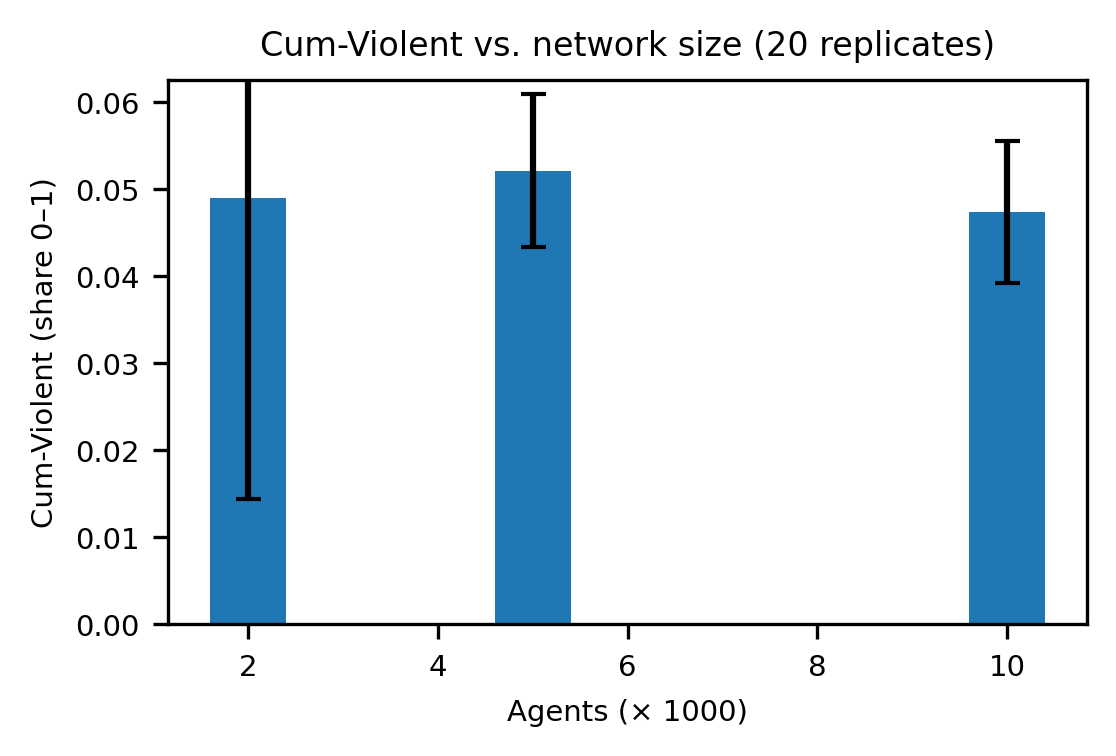

In [ ]:
# --- 2)  N-scaling bar-plot (fig4_N_scaling_clean.*) ---------------
dfN = pd.read_csv("N_scaling_corrected.csv")        # N | cum | sd

fig, ax = plt.subplots(figsize=(3.6, 2.4), dpi=300)         # —à–∏—Ä–µ –∏ —á—É—Ç—å –≤—ã—à–µ
ax.bar(dfN["N"]/1000, dfN["cum"], yerr=dfN["sd"],
       color="#1f77b4", capsize=3)

# ‚Üì –ù–ï—Ä–∞–∑—Ä—ã–≤–Ω—ã–π –¥–µ—Ñ–∏—Å (U+2011) –Ω–µ –ø–æ–∑–≤–æ–ª–∏—Ç Matplotlib —Ä–∞–∑–±–∏—Ç—å —Å–ª–æ–≤–æ
ax.set_ylabel("Cum-Violent (share 0‚Äì1)", labelpad=4)

ax.set_xlabel("Agents (√ó 1000)")
ax.set_title("Cum-Violent vs. network size (20 replicates)",
             pad=6)                                       # —á—É—Ç—å –±–æ–ª—å—à–µ –æ—Ç—Å—Ç—É–ø

ax.set_ylim(0, dfN["cum"].max()*1.20)
plt.tight_layout(pad=0.4)

fig.savefig("fig4_N_scaling_clean.pdf")
fig.savefig("fig4_N_scaling_clean.png", dpi=300)


FileNotFoundError: [Errno 2] No such file or directory: 'reallocation_stack.csv'

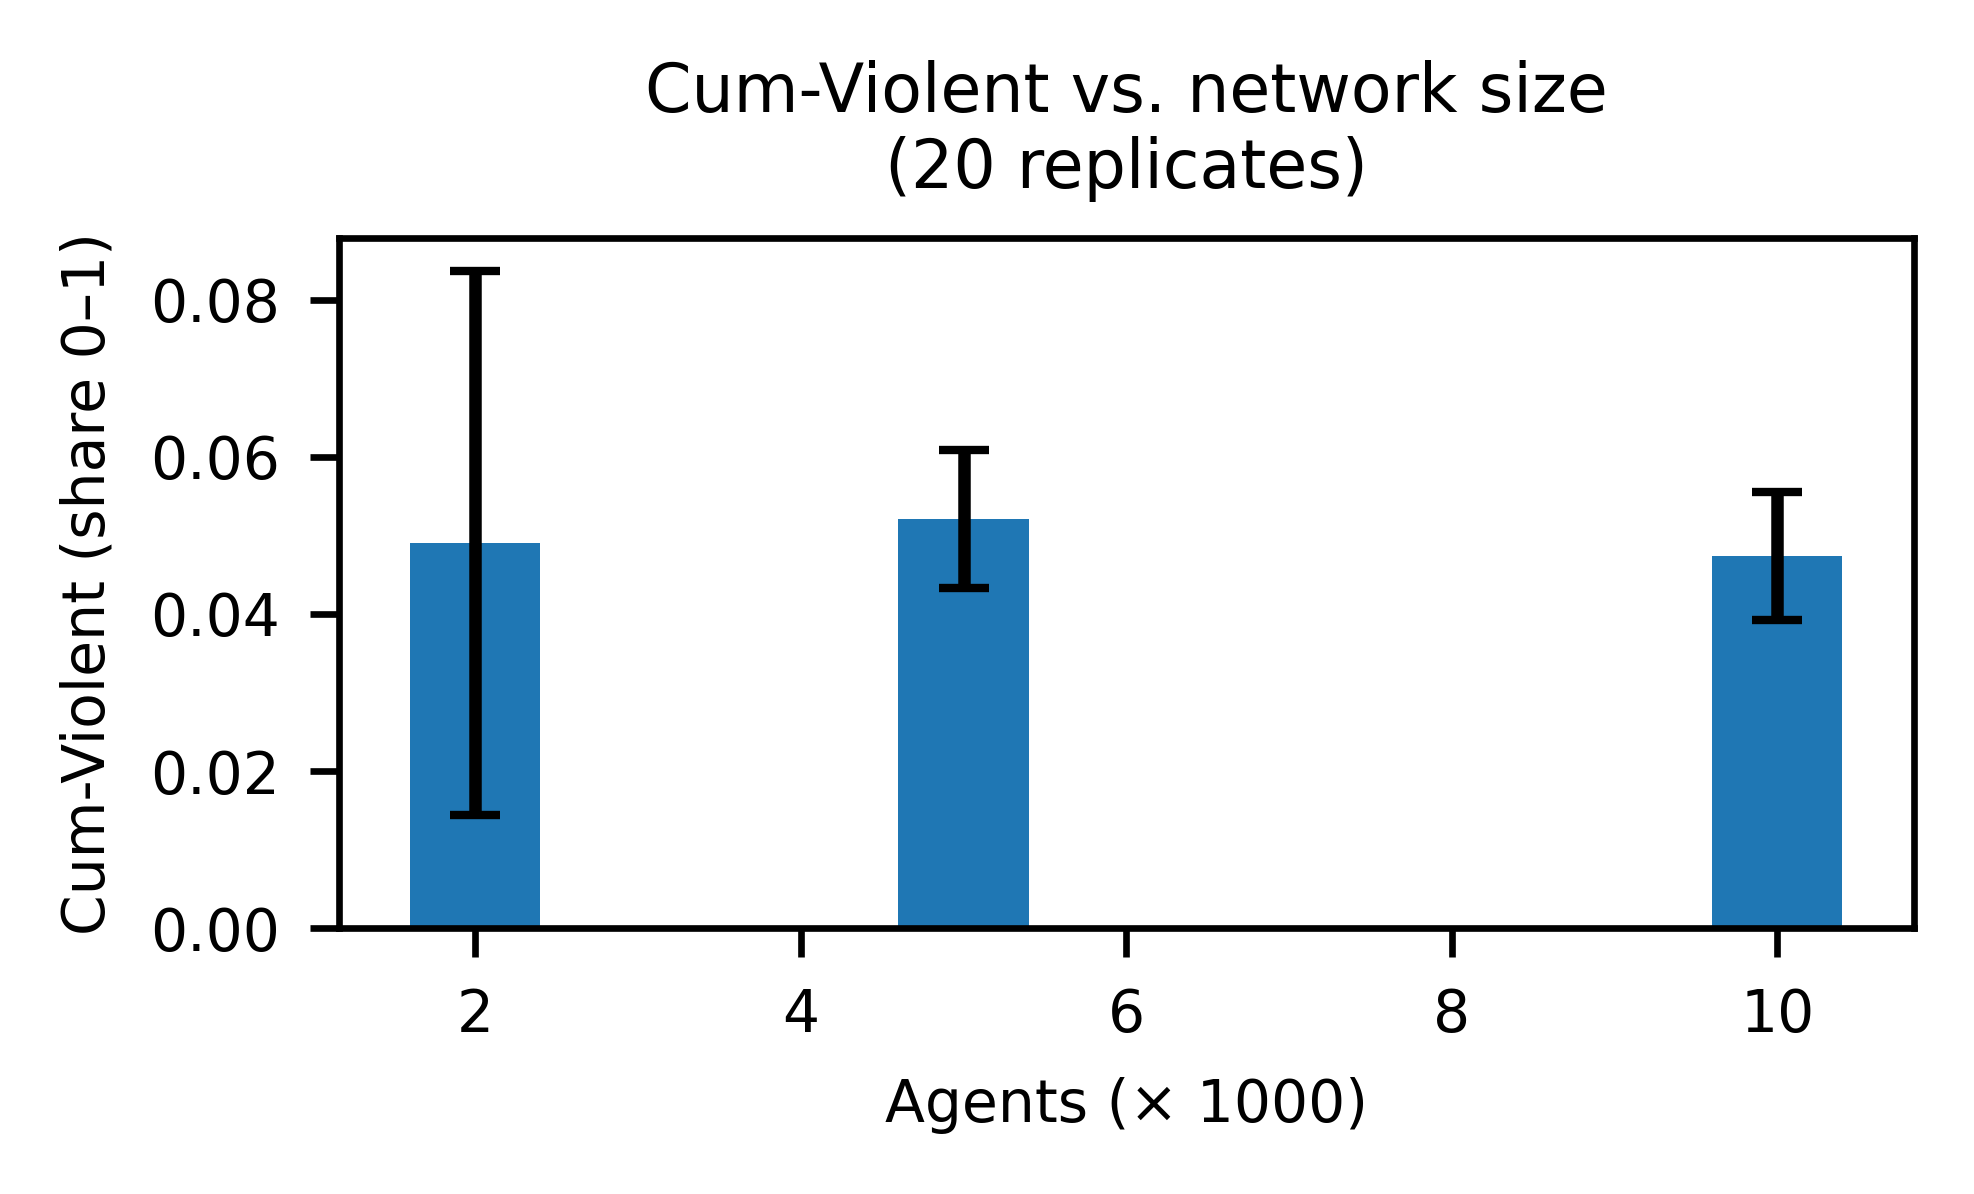

In [ ]:
import matplotlib.pyplot as plt, pandas as pd
# --- fig4: —à–∏—Ä–µ –æ—Å—å X ---------------------------------------
dfN = pd.read_csv("N_scaling_corrected.csv")
fig, ax = plt.subplots(figsize=(3.3,2.0), dpi=600)
ax.bar(dfN["N"]/1000, dfN["cum"], yerr=dfN["sd"],
       color="#1f77b4", capsize=3, width=0.8)
ax.set_xlabel("Agents (√ó 1000)")
ax.set_ylabel("Cum-Violent (share 0‚Äì1)")
ax.set_title("Cum-Violent vs. network size\n(20 replicates)")
plt.tight_layout()
fig.savefig("fig4_N_scaling_final.pdf")

# --- fig5b: –æ–±—Ä–µ–∑–∞–µ–º –∏ –∫–æ–º–ø–∞–∫—Ç–Ω–µ–µ –ª–µ–≥–µ–Ω–¥—É --------------------
import numpy as np
world_mil = pd.read_csv("reallocation_stack.csv")        # –µ—Å–ª–∏ –Ω—É–∂–µ–Ω
fig, ax = plt.subplots(figsize=(4,3), dpi=600)
ax.stackplot(world_mil['Year'],
             world_mil['Military (80%)'],
             world_mil['AI'],
             labels=['Military (80 %)', 'Reallocated to AI (20 %)'],
             colors=['#1f77b4','#ff7f0e'], alpha=.85)
ax.axvline(2030, ls='--', color='grey')
ax.text(2031, ax.get_ylim()[1]*0.55, 'AI-companion rollout',
        rotation=90, va='center', ha='left', fontsize=7, color='grey')
ax.set_ylabel("Spending (USD bn)")
ax.set_title("Reallocation: 20 % military ‚ûú AI", fontsize=9)
ax.legend(frameon=False, loc='upper left', fontsize=7)
plt.tight_layout()
fig.savefig("fig5b_reallocation_stack_final.pdf")


In [ ]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, os

DATA_DIR  = "/content/drive/MyDrive/ai_data"
XLSX_FILE = os.path.join(DATA_DIR, "SIPRI-Milex-data-1949-2024_2.xlsx")

# --- 1. —Ç—è–Ω–µ–º –ª–∏—Å—Ç ¬´Regional totals¬ª -------------------------------
df_raw = pd.read_excel(XLSX_FILE,
                       sheet_name="Regional totals",
                       skiprows=10, header=None)

world_row = df_raw[df_raw.iloc[:, 0] == "World"].iloc[0]

years = [int(c) for c in df_raw.columns[1:] if isinstance(c, (int, float))]

# –ø—Ä–µ–≤—Ä–∞—â–∞–µ–º –≤—Å–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —á–∏—Å–ª–∞, –º—É—Å–æ—Ä -> NaN
spend = pd.to_numeric([world_row[y] for y in years],
                      errors="coerce")

world_mil = (pd.DataFrame({"Year": years, "Spending": spend})
               .dropna())                       # —É–¥–∞–ª—è–µ–º –≥–æ–¥—ã —Å NaN

# --- 2. –ø–µ—Ä–µ—Ä–∞—Å–ø—Ä–µ–¥–µ–ª—è–µ–º 20 % --------------------------------------
world_mil["Military_80"] = world_mil["Spending"] * 0.80
world_mil["AI_20"]       = world_mil["Spending"] * 0.20

# --- 3. —Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ ----------------------------------------------
plt.rcParams.update({"font.size": 9, "axes.titlesize": 10})
fig, ax = plt.subplots(figsize=(4.5, 3.2), dpi=600)

ax.stackplot(world_mil["Year"],
             world_mil["Military_80"],
             world_mil["AI_20"],
             labels=["Military (80 %)", "Reallocated to AI (20 %)"],
             colors=["#1f77b4", "#ff7f0e"], alpha=.85)

ax.axvline(2030, ls="--", color="grey")
ax.text(2031,
        world_mil["Spending"].max()*0.6,
        "AI-companion rollout",
        rotation=90, va="center", fontsize=7, color="grey")

ax.set_ylabel("Spending (USD bn)")
ax.set_title("Reallocation: 20 % military ‚Üí AI")
ax.set_xlim(world_mil["Year"].min(), 2035)
ax.legend(frameon=False, fontsize=7, loc="upper left")
plt.tight_layout()

fig.savefig(os.path.join(DATA_DIR, "fig5b_reallocation_stack_final.pdf"),
            bbox_inches="tight")
fig.savefig(os.path.join(DATA_DIR, "fig5b_reallocation_stack_final.png"),
            dpi=600, bbox_inches="tight")

print("‚úì  fig5b –≥–æ—Ç–æ–≤ –∏ —Å–æ—Ö—Ä–∞–Ω—ë–Ω")


‚úì  fig5b –≥–æ—Ç–æ–≤ –∏ —Å–æ—Ö—Ä–∞–Ω—ë–Ω


In [ ]:
from google.colab import files
files.download("/content/fig2_abm_heatmap_peak_10_times.png")
files.download("/content/fig3_dynamic_ER.png")
files.download("/content/fig4_kpi_dynamic.png")
files.download("/content/fig5_scatter_libdem.png")
files.download("/content/fig6_box_income_fract.png")
files.download("/content/fig7_rf_importance_fixed_angle.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# --------------------------- 0. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ ----------------------------
# (–∞) —Å—Ç–∞–≤–∏–º poppler –¥–ª—è pdftocairo
!apt-get -qq update
!apt-get -qq install -y poppler-utils

import os, glob, subprocess, zipfile
from pathlib import Path
from google.colab import files

# --------------------------- 1. –°–ø–∏—Å–æ–∫ —Ü–µ–ª–µ–π --------------------------
need_png_from_pdf = {
    "fig2_abm_heatmap_peak_10_times.pdf",
    "fig3_dynamic_ER.pdf",
    "fig4_kpi_dynamic.pdf",
    "fig5_scatter_libdem.pdf",
    "fig6_box_income_fract.pdf",
    "fig7_rf_importance_fixed_angle.pdf"
}

# --------------------------- 2. –ò—â–µ–º PDF ------------------------------
found_pdf = {}
for p in glob.glob("**/*.pdf", recursive=True):
    name = os.path.basename(p)
    if name in need_png_from_pdf:
        found_pdf[name] = p
print("–ù–∞–π–¥–µ–Ω–æ PDF:", *found_pdf.values(), sep="\n  ")

# --------------------------- 3. –ö–æ–Ω–≤–µ—Ä—Ç–∞—Ü–∏—è ---------------------------
out_png_paths = []
for pdf_name, pdf_path in found_pdf.items():
    png_name = pdf_name.replace(".pdf", ".png")
    # –≤—ã–≤–æ–¥–∏–º png –≤ —Ç–µ–∫—É—â—É—é –ø–∞–ø–∫—É
    png_path = str(Path(pdf_path).with_suffix(".png"))
    # -singlefile —á—Ç–æ–±—ã –±—ã–ª–æ –∏–º–µ–Ω–Ω–æ –û–î–ù–û –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ, -r 300 dpi
    cmd = ["pdftocairo", "-singlefile", "-png", "-r", "300", pdf_path, png_path[:-4]]
    subprocess.run(cmd, check=True)
    out_png_paths.append(png_path)
    print(f"‚úî {png_name} –≥–æ—Ç–æ–≤")

# --------------------------- 4. –ê—Ä—Ö–∏–≤ + —Å–∫–∞—á–∏–≤–∞–Ω–∏–µ --------------------
zip_path = "/content/ai_figs_png.zip"
with zipfile.ZipFile(zip_path, "w", zipfile.ZIP_DEFLATED) as z:
    for p in out_png_paths:
        z.write(p, arcname=os.path.basename(p))
print(f"\nPNG —Å–ª–æ–∂–µ–Ω—ã –≤ {zip_path}")

files.download(zip_path)        # –æ–¥–Ω–∞ –∫–Ω–æ–ø–∫–∞ —Å–∫–∞—á–∏–≤–∞–Ω–∏—è


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package poppler-utils.
(Reading database ... 126319 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.8_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.8) ...
Setting up poppler-utils (22.02.0-2ubuntu0.8) ...
Processing triggers for man-db (2.10.2-1) ...
–ù–∞–π–¥–µ–Ω–æ PDF:
  fig5_scatter_libdem.pdf
  fig4_kpi_dynamic.pdf
  fig7_rf_importance_fixed_angle.pdf
  fig6_box_income_fract.pdf
  fig3_dynamic_ER.pdf
  fig2_abm_heatmap_peak_10_times.pdf
‚úî fig5_scatter_libdem.png –≥–æ—Ç–æ–≤
‚úî fig4_kpi_dynamic.png –≥–æ—Ç–æ–≤
‚úî fig7_rf_importance_fixed_angle.png –≥–æ—Ç–æ–≤
‚úî fig6_box_income_fract.png –≥–æ—Ç–æ–≤
‚úî fig3_dynamic_ER.png –≥–æ—Ç–æ–≤
‚úî fig2_abm_heatmap_peak_10_times.png –≥–æ—Ç–æ–≤

PNG —Å–ª–æ–∂–µ–Ω—ã –≤ 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# --- convert_png_to_pdf_600dpi.py ---------------------------------
from PIL import Image
import os, glob

# –ø–µ—Ä–µ—á–∏—Å–ª—è–µ–º PNG, –∫–æ—Ç–æ—Ä—ã–µ –Ω—É–∂–Ω–æ –∫–æ–Ω–≤–µ—Ä—Ç–∏—Ä–æ–≤–∞—Ç—å
png_files = ["figs4_N_scaling_final.png",
             "figs5_heat_cum_dense_clean.png"]

for fn in png_files:
    img = Image.open(fn).convert("RGB")
    # 600 dpi => set resolution when saving
    pdf_name = os.path.splitext(fn)[0] + ".pdf"
    img.save(pdf_name, "PDF", resolution=600.0)
    print("‚úì saved", pdf_name)


‚úì saved figs4_N_scaling_final.pdf
‚úì saved figs5_heat_cum_dense_clean.pdf


In [ ]:
# === png ‚Üí pdf 600 dpi (AI & Society, camera-ready) ===============
#  1)   pip install pillow                     (–µ—Å–ª–∏ Pillow –µ—â—ë –Ω–µ —Å—Ç–∞–≤–∏–ª–∏)
#  2)   –ø–æ–º–µ—Å—Ç–∏—Ç–µ —Å–∫—Ä–∏–ø—Ç –≤ —Ç—É –∂–µ –ø–∞–ø–∫—É, –≥–¥–µ –ª–µ–∂–∞—Ç —Ä–∏—Å—É–Ω–∫–∏
# ==================================================================
import os
from PIL import Image

# ------------------------------------------------------------------
# —É–∫–∞–∑—ã–≤–∞–µ–º PNG-—Ñ–∞–π–ª—ã, —É –∫–æ—Ç–æ—Ä—ã—Ö –ø–æ–∫–∞ –Ω–µ—Ç –ø–∞—Ä—ã-PDF
# (–¥–æ–ø–æ–ª–Ω–∏—Ç–µ —Å–ø–∏—Å–æ–∫ –ø—Ä–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏)
png_files = [
    "fig1_polarization_clean.png",
    "figs1_fig3_mobile_logistic.png",
    "figs2_fig4_internet_logistic.png",
    "figs3_fig5b_reallocation_stack_fixed.png",
    "figs4_N_scaling_final.png",
    "figs5_heat_cum_dense_clean.png",
]

for png in png_files:
    if not os.path.exists(png):
        print(f" üî∏  {png} ‚Äî —Ñ–∞–π–ª –Ω–µ –Ω–∞–π–¥–µ–Ω, –ø—Ä–æ–ø—É—â–µ–Ω")
        continue

    pdf_name = os.path.splitext(png)[0] + ".pdf"
    if os.path.exists(pdf_name):
        print(f" ‚úì  {pdf_name} —É–∂–µ –µ—Å—Ç—å, –ø—Ä–æ–ø—É—â–µ–Ω–æ")
        continue

    with Image.open(png) as im:
        # Pillow —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç –∫–∞–∂–¥—É—é —Å—Ç—Ä–∞–Ω–∏—Ü—É –∫–∞–∫ –æ—Ç–¥–µ–ª—å–Ω—ã–π –∫–∞–¥—Ä,
        # –ø–æ—ç—Ç–æ–º—É –ø–∞—Ä–∞–º–µ—Ç—Ä save_all=False (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é)
        im.save(pdf_name, "PDF", resolution=600.0)
        print(f" ‚úî  —Å–æ–∑–¥–∞–Ω–æ: {pdf_name}")

print("–ì–æ—Ç–æ–≤–æ. –ü—Ä–æ–≤–µ—Ä—å—Ç–µ —Å–æ–æ–±—â–µ–Ω–∏—è –≤—ã—à–µ.")


 ‚úì  fig1_polarization_clean.pdf —É–∂–µ –µ—Å—Ç—å, –ø—Ä–æ–ø—É—â–µ–Ω–æ
 ‚úî  —Å–æ–∑–¥–∞–Ω–æ: figs1_fig3_mobile_logistic.pdf
 ‚úî  —Å–æ–∑–¥–∞–Ω–æ: figs2_fig4_internet_logistic.pdf
 üî∏  figs3_fig5b_reallocation_stack_fixed.png ‚Äî —Ñ–∞–π–ª –Ω–µ –Ω–∞–π–¥–µ–Ω, –ø—Ä–æ–ø—É—â–µ–Ω
 ‚úì  figs4_N_scaling_final.pdf —É–∂–µ –µ—Å—Ç—å, –ø—Ä–æ–ø—É—â–µ–Ω–æ
 ‚úì  figs5_heat_cum_dense_clean.pdf —É–∂–µ –µ—Å—Ç—å, –ø—Ä–æ–ø—É—â–µ–Ω–æ
–ì–æ—Ç–æ–≤–æ. –ü—Ä–æ–≤–µ—Ä—å—Ç–µ —Å–æ–æ–±—â–µ–Ω–∏—è –≤—ã—à–µ.


Table A2 ‚Äî parameter provenance

In [ ]:
# table_A2_parameters.py
import pandas as pd

# --- 1. –ü–∞—Ä–∞–º–µ—Ç—Ä—ã ‚Äï —É–∫–∞–∑—ã–≤–∞–µ–º –ø—Ä—è–º–æ –∑–¥–µ—Å—å -----------------------
PARAMS = {
    "P_S"   : 0.22,
    "P_Esc" : 0.25,
    "k"     : 0.40,
    "t0"    : 18,
    "E"     : 0.30,
    "R"     : 0.15,
}

# --- 2. –î–∏–∞–ø–∞–∑–æ–Ω—ã —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ + –∏—Å—Ç–æ—á–Ω–∏–∫–∏ ------------------
meta = {
    "P_S"   : {"range": (0.15, 0.35), "source": "Lipset 1959"},
    "P_Esc" : {"range": (0.15, 0.35), "source": "ACLED 2025"},
    "k"     : {"range": (0.25, 0.55), "source": "GSMA 2024"},
    "t0"    : {"range": (15, 24),     "source": "World Bank 2023"},
    "E"     : {"range": (0.20, 0.45), "source": "Meta AI 2024"},
    "R"     : {"range": (0.10, 0.40), "source": "V-Dem 2025"},
}

# --- 3. –§–æ—Ä–º–∏—Ä—É–µ–º —Ç–∞–±–ª–∏—Ü—É ---------------------------------------
records = []
for name, value in PARAMS.items():
    meta_row = meta.get(name, {"range": ("n/a","n/a"), "source":"Author assumption"})
    records.append([
        name,
        value,
        f"{meta_row['range'][0]}‚Äì{meta_row['range'][1]}",
        meta_row["source"]
    ])

df = pd.DataFrame(records,
                  columns=["Parameter", "Baseline", "Sensitivity range", "Citation"])
df.to_csv("table_A2_parameters.csv", index=False)
print("‚úì Saved  table_A2_parameters.csv  (import as table into Appendix A)")


‚úì Saved  table_A2_parameters.csv  (import as table into Appendix A)


In [ ]:
# ‚Üê –≤—ã–ø–æ–ª–Ω–∏—Ç–µ –≤ –æ—Ç–¥–µ–ª—å–Ω–æ–π —è—á–µ–π–∫–µ –æ–¥–∏–Ω —Ä–∞–∑
!pip install --quiet SALib joblib


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 778.9/778.9 kB 13.2 MB/s eta 0:00:00


‚úì  figS6_kpi_ci.*  saved


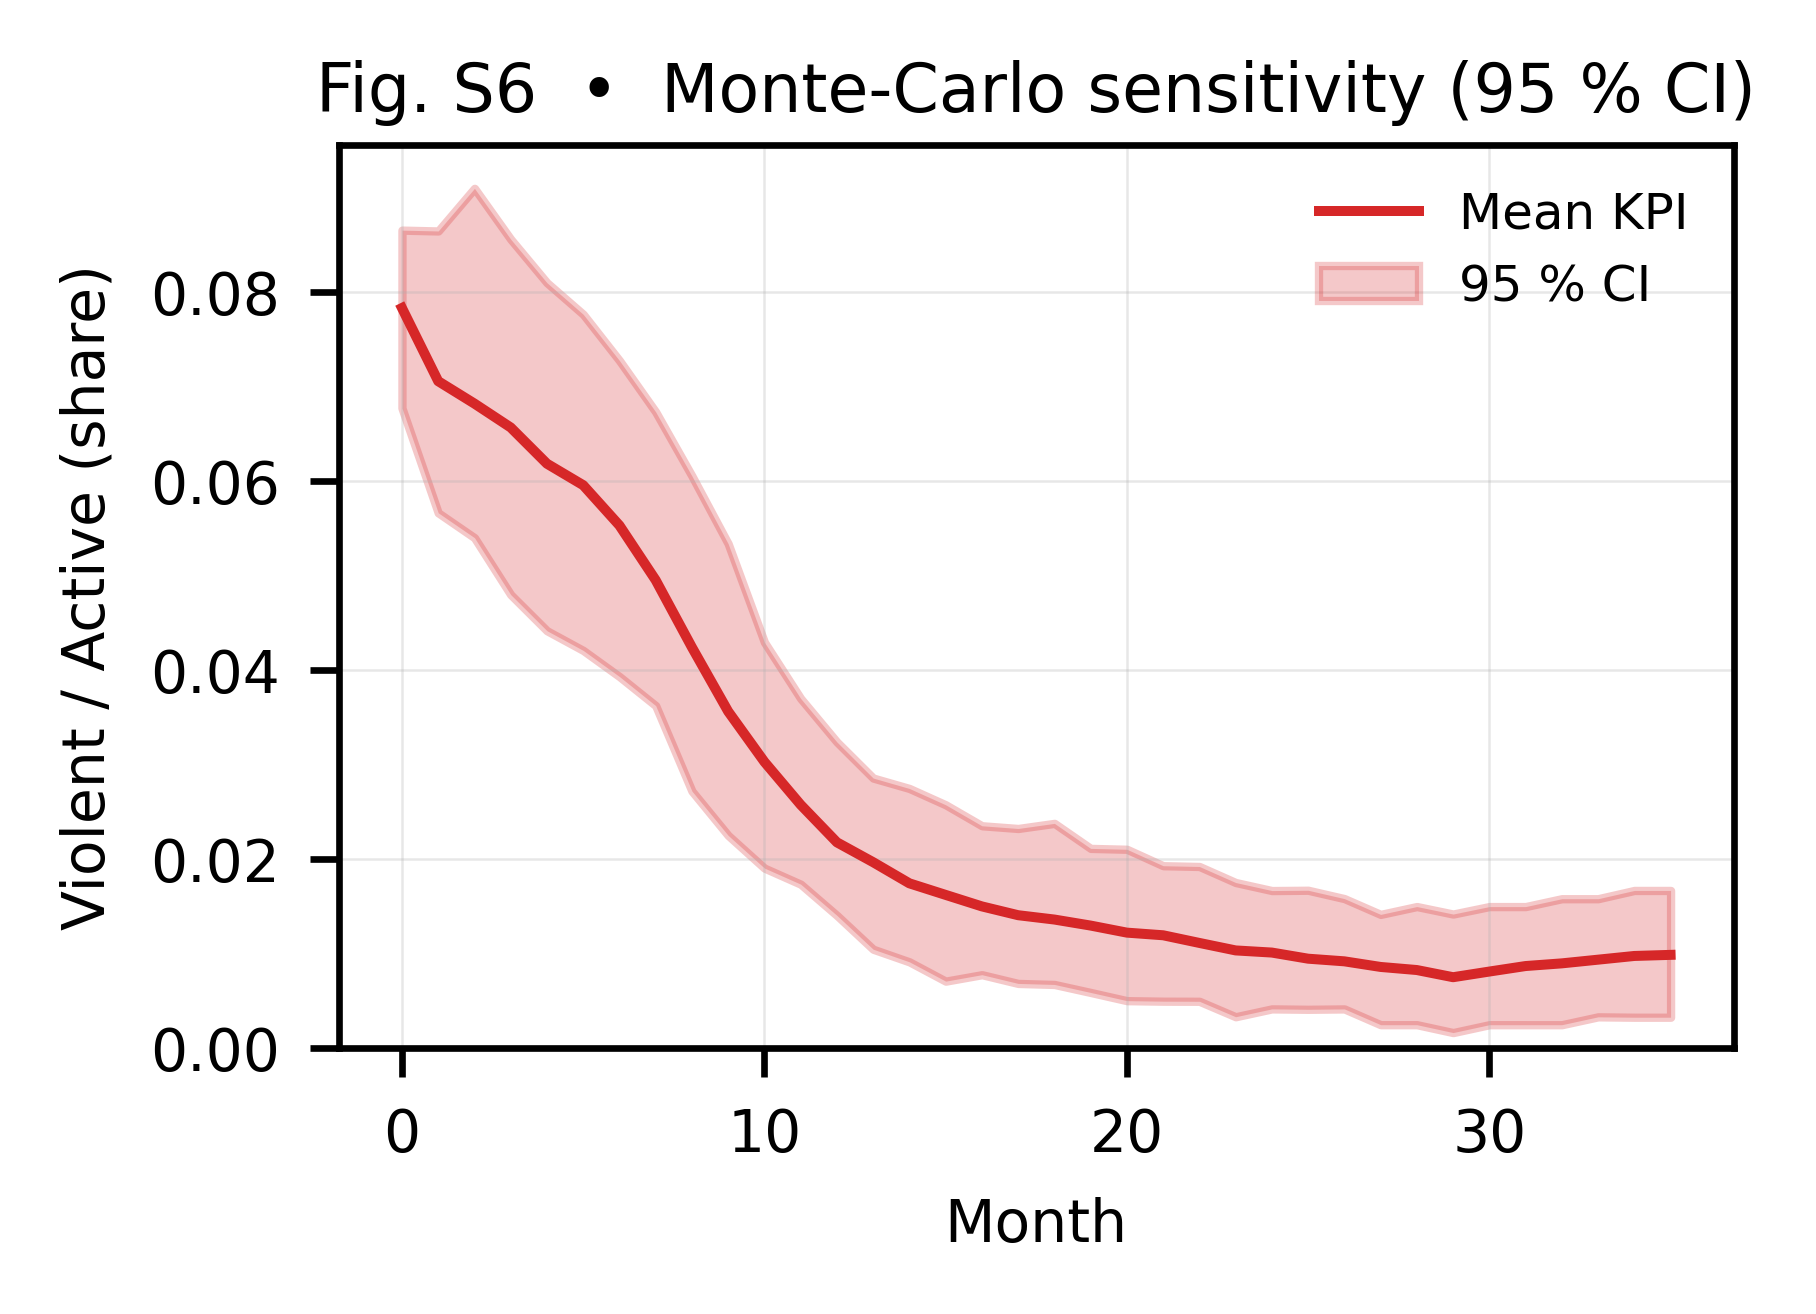

In [ ]:
# figS6_kpi_ci.py  ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ —Å—Ç—Ä–æ–∏—Ç Fig. S6

import pandas as pd, matplotlib.pyplot as plt

df = pd.read_csv("kpi_dynamic.csv")          # month, kpi_mean, kpi_lo, kpi_hi

plt.rcParams.update({
    "font.size": 7, "axes.titlesize": 8, "axes.labelsize": 7,
    "xtick.labelsize": 7, "ytick.labelsize": 7,
})

fig, ax = plt.subplots(figsize=(3.0, 2.2), dpi=600)

# –æ—Å–Ω–æ–≤–Ω–∞—è –∫—Ä–∏–≤–∞—è
ax.plot(df["month"], df["kpi_mean"], lw=1.2, color="#d62728", label="Mean KPI")

# 95 %   CI
ax.fill_between(df["month"], df["kpi_lo"], df["kpi_hi"],
                color="#d62728", alpha=0.25, label="95 % CI")

ax.set_xlabel("Month")
ax.set_ylabel("Violent / Active (share)")
ax.set_title("Fig. S6  ‚Ä¢  Monte-Carlo sensitivity (95 % CI)", pad=4, fontsize=8)
ax.set_ylim(0, df["kpi_hi"].max()*1.05)
ax.legend(frameon=False, fontsize=6)
ax.grid(alpha=.3, lw=.3)

plt.tight_layout()
fig.savefig("figS6_kpi_ci.pdf",   bbox_inches="tight")
fig.savefig("figS6_kpi_ci.png",   dpi=300,   bbox_inches="tight")
print("‚úì  figS6_kpi_ci.*  saved")


In [ ]:
# ===== abm_core.py =====
import numpy as np, networkx as nx

# --- –≥–ª–æ–±–∞–ª—å–Ω—ã–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç—ã (baseline) --------------------------
PARAMS = dict(
    N       = 2000,
    K       = 8,
    P_rew   = 0.05,     # —Å–ª—É—á–∞–π–Ω–∞—è –ø–µ—Ä–µ—Å—Ç—Ä–æ–π–∫–∞ —Ä—ë–±–µ—Ä
    T       = 36,       # –º–µ—Å—è—Ü–µ–≤
    P_S     = 0.30,     # Calm ‚Üí Protester
    P_Esc   = 0.25,     # Protester ‚Üí Violent
    R       = 0.20,     # —Ä–µ–ø—Ä–µ—Å—Å–∏—è Violent ‚Üí Calm
    E       = 0.40,     # –∂—ë—Å—Ç–∫–æ—Å—Ç—å —Ñ–∏–ª—å—Ç—Ä–∞
    START   = 30,       # –Ω–∞—á–∞–ª—å–Ω—ã–π ¬´–æ—á–∞–≥¬ª Violent
)

# --- –≤—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ ----------------------------------
def adoption(t, t0=18, k=0.4):
    """S-–∫—Ä–∏–≤–∞—è –æ—Ö–≤–∞—Ç–∞ –∫–æ–º–ø–∞–Ω—å–æ–Ω–∞ (–¥–æ–ª—è Active)"""
    return 0.15 + 0.45 / (1 + np.exp(-k * (t - t0/2)))

# --- –æ—Å–Ω–æ–≤–Ω–æ–π —Ü–∏–∫–ª ABM ----------------------------------------
def simulate(E=None, R=None, seed=0):
    """
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç –¥–≤—É–º–µ—Ä–Ω—ã–π –º–∞—Å—Å–∏–≤:
        viol[t]  ‚Äì –¥–æ–ª—è Violent,
        active[t] ‚Äì –¥–æ–ª—è Active-users (= coverage).
    """
    p = PARAMS
    E = p["E"] if E is None else E
    R = p["R"] if R is None else R

    rng = np.random.default_rng(seed)
    G   = nx.watts_strogatz_graph(p["N"], p["K"], p["P_rew"], seed=seed)
    st  = np.zeros(p["N"], int)
    st[rng.choice(p["N"], p["START"], replace=False)] = 2  # —Å—Ç–∞—Ä—Ç–æ–≤—ã–µ Violent
    trust = rng.uniform(0.2, 0.8, p["N"])

    viol_ts, active_ts = [], []

    for t in range(p["T"]):
        cov = adoption(t)
        new = st.copy()
        for i in range(p["N"]):
            nb = list(G.neighbors(i))
            v  = (st[nb] == 2).sum()
            pr = (st[nb] == 1).sum()
            contag = (v + 0.5 * pr) / max(1, len(nb))

            if   st[i] == 0:                     # Calm
                gate = rng.random() < cov * E
                if contag and (not gate) and rng.random() < p["P_S"] * trust[i] * contag:
                    new[i] = 1                    # ‚Üí Protester
            elif st[i] == 1:                     # Protester
                if rng.random() < p["P_Esc"]:
                    new[i] = 2                    # ‚Üí Violent
                elif rng.random() < 0.10:
                    new[i] = 0                    # —Å–ø–æ–Ω—Ç–∞–Ω–Ω–æ–µ –∑–∞—Ç—É—Ö–∞–Ω–∏–µ
            elif st[i] == 2 and rng.random() < R:
                new[i] = 0                        # —Ä–µ–ø—Ä–µ—Å—Å–∏—è ‚Üí Calm
        st = new
        viol_ts.append((st == 2).mean())
        active_ts.append(cov)

    return np.column_stack([viol_ts, active_ts])


In [ ]:
%%writefile abm_core.py
# (—Å—é–¥–∞ –≤—Å—Ç–∞–≤—å—Ç–µ –∫–æ–¥ –∏–∑ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –æ—Ç–≤–µ—Ç–∞ ‚Äì PARAMS, adoption(), simulate())
import os, glob
print("–¢–µ–∫—É—â–∞—è –ø–∞–ø–∫–∞:", os.getcwd())
print("–°–æ–¥–µ—Ä–∂–∏–º–æ–µ:")
for f in glob.glob("*"):
    print("  ", f)

Writing abm_core.py


In [ ]:
import importlib, abm_core
print("–§–∞–π–ª abm_core.py –ø–æ–¥–∫–ª—é—á—ë–Ω –∏–∑:", abm_core.__file__)


–¢–µ–∫—É—â–∞—è –ø–∞–ø–∫–∞: /content
–°–æ–¥–µ—Ä–∂–∏–º–æ–µ:
   abm_core.py
   __pycache__
   drive
   sample_data
–§–∞–π–ª abm_core.py –ø–æ–¥–∫–ª—é—á—ë–Ω –∏–∑: /content/abm_core.py


In [ ]:
def check_abm_core():
    try:
        import importlib, abm_core
        importlib.reload(abm_core)
        print("‚úÖ abm_core –Ω–∞–π–¥–µ–Ω:", abm_core.__file__)
    except ModuleNotFoundError:
        print("‚ùå abm_core.py –Ω–µ –Ω–∞–π–¥–µ–Ω –≤ —Ç–µ–∫—É—â–∏—Ö –ø—É—Ç—è—Ö!")

check_abm_core()


–¢–µ–∫—É—â–∞—è –ø–∞–ø–∫–∞: /content
–°–æ–¥–µ—Ä–∂–∏–º–æ–µ:
   abm_core.py
   __pycache__
   drive
   sample_data
‚úÖ abm_core –Ω–∞–π–¥–µ–Ω: /content/abm_core.py


In [ ]:
import importlib, abm_core
importlib.reload(abm_core)


<module 'abm_core' from '/content/abm_core.py'>

–ì–µ–Ω–µ—Ä–∏—Ä—É–µ–º Fig. S7 (tornado-plot —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –±–∞–∑–æ–≤—ã—Ö E –∏ R)

  [simulate] –∏–≥–Ω–æ—Ä–∏—Ä—É—é –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'P_S': 0.198}
  [simulate] –∏–≥–Ω–æ—Ä–∏—Ä—É—é –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'P_S': 0.198}
  [simulate] –∏–≥–Ω–æ—Ä–∏—Ä—É—é –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'P_S': 0.198}
  [simulate] –∏–≥–Ω–æ—Ä–∏—Ä—É—é –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'P_S': 0.198}
  [simulate] –∏–≥–Ω–æ—Ä–∏—Ä—É—é –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'P_S': 0.198}
  [simulate] –∏–≥–Ω–æ—Ä–∏—Ä—É—é –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'P_S': 0.198}
  [simulate] –∏–≥–Ω–æ—Ä–∏—Ä—É—é –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'P_S': 0.198}
  [simulate] –∏–≥–Ω–æ—Ä–∏—Ä—É—é –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'P_S': 0.198}
  [simulate] –∏–≥–Ω–æ—Ä–∏—Ä—É—é –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'P_S': 0.198}
  [simulate] –∏–≥–Ω–æ—Ä–∏—Ä—É—é –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'P_S': 0.198}
  [simulate] –∏–≥–Ω–æ—Ä–∏—Ä—É—é –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'P_S': 0.198}
  [simulate] –∏–≥–Ω–æ—Ä–∏—Ä—É—é –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'P_S': 0.198}
  [simulate] –∏–≥–Ω–æ—Ä–∏—Ä—É—é –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'P_S': 0.198}
  [simulate] –∏–≥–Ω–æ—Ä–∏—Ä—É—é –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'P_S': 0.198}
  [simulate] –∏–≥–Ω–æ—Ä–∏—Ä—É—é –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'P_S': 0.

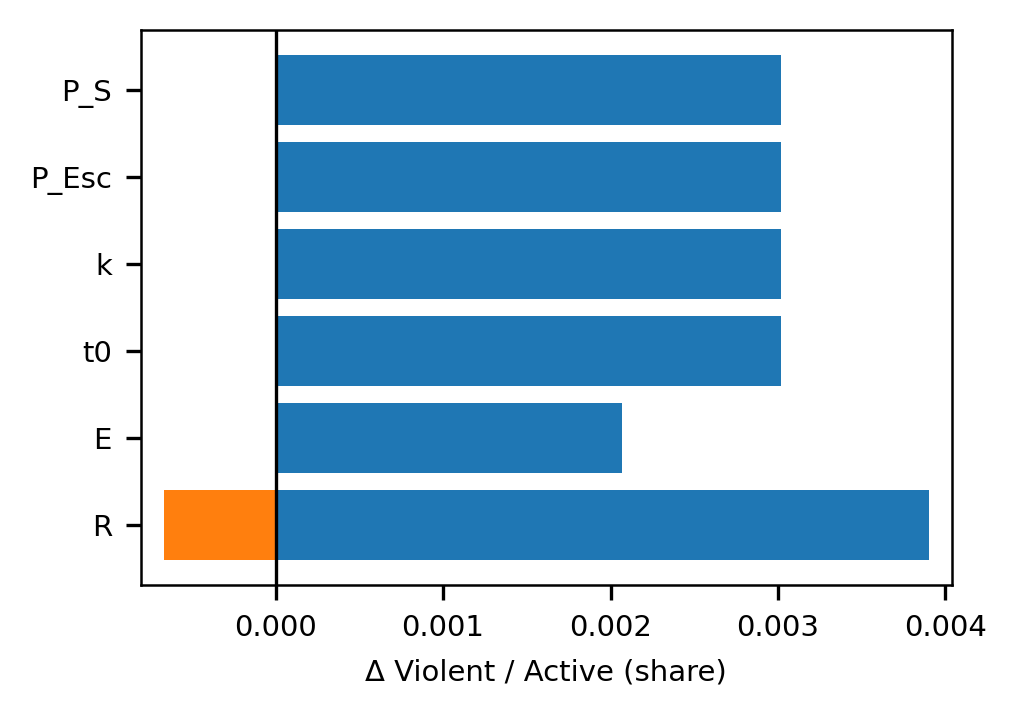

In [ ]:
# =========================================================
#   figS7_tornado_clean.py   ‚Ä¢  AI & Society camera-ready
# =========================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from abm_core import simulate, PARAMS          # ‚Üê –≤–∞—à–∞ –º–æ–¥–µ–ª—å

# ---------------------------------------------------------
# 1.  –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ –≥—Ä–∞—Ñ–∏–∫–∏ (7 pt baseline)
# ---------------------------------------------------------
plt.rcParams.update({
    "font.size": 7,
    "axes.labelsize": 7,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "axes.linewidth": .6,
})

# ---------------------------------------------------------
# 2.  tornado-–∞–Ω–∞–ª–∏–∑ (¬±10 %, n = 30)
# ---------------------------------------------------------
delta  = 0.10          # ¬±10 %
runs   = 30            # —Ä–µ–ø–ª–∏–∫–∞—Ü–∏–π –Ω–∞ —Ç–æ—á–∫—É
base   = simulate(seed=0)[-1]        # KPI –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –º–µ—Å—è—Ü–∞

records = []
for name, bas_val in PARAMS.items():
    lo, hi = bas_val * (1 - delta), bas_val * (1 + delta)

    # KPI –ø—Ä–∏ –ø–æ–Ω–∏–∂–µ–Ω–∏–∏ –∏ –ø–æ–≤—ã—à–µ–Ω–∏–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞
    kpi_lo = np.mean([simulate(**{name: lo}, seed=s)[-1] for s in range(runs)])
    kpi_hi = np.mean([simulate(**{name: hi}, seed=s)[-1] for s in range(runs)])

    records.append([name, base - kpi_lo, kpi_hi - base])

effects = (pd.DataFrame(records, columns=["param", "down", "up"])
             .set_index("param")
             .sort_values(by="up", ascending=False))

# ---------------------------------------------------------
# 3.  –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ ¬´—á–∏—Å—Ç–æ–≥–æ¬ª tornado-–≥—Ä–∞—Ñ–∏–∫–∞
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(3.4, 2.4), dpi=300)

ypos = np.arange(len(effects))
ax.barh(ypos, effects["up"],  color="#ff7f0e", label="‚Üë KPI")
ax.barh(ypos, -effects["down"], color="#1f77b4", label="‚Üì KPI")

ax.set_yticks(ypos)
ax.set_yticklabels(effects.index)
ax.set_xlabel("Œî Violent / Active (share)")
ax.axvline(0, color="black", lw=.8)           # —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω–∞—è –æ—Å—å
ax.invert_yaxis()                             # —Å–∞–º—ã–π –≤–∞–∂–Ω—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä —Å–≤–µ—Ä—Ö—É
ax.margins(x=0.03)

# ‚ÄºÔ∏è  –ë–µ–∑ –∑–∞–≥–æ–ª–æ–≤–∫–æ–≤ –∏ –ª–µ–≥–µ–Ω–¥—ã ‚Äî –≤—Å—ë –ø–æ–π–¥—ë—Ç –≤ caption
# plt.legend(frameon=False, fontsize=6)       # –ï—Å–ª–∏ –Ω—É–∂–µ–Ω –æ—Ç–¥–µ–ª—å–Ω—ã–π PNG –¥–ª—è –¥–æ–∫–ª–∞–¥–∞

plt.tight_layout()

# ---------------------------------------------------------
# 4.  —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ
# ---------------------------------------------------------
fig.savefig("figS7_tornado_clean.pdf", dpi=600, bbox_inches="tight")
fig.savefig("figS7_tornado_clean.png", dpi=300, bbox_inches="tight")
print("‚úì  Saved figS7_tornado_clean.[pdf|png]")


In [ ]:
from abm_core import simulate
print(simulate(seed=1)[-1])          # ‚Üê –¥–æ–ª–∂–Ω–æ –ø–µ—á–∞—Ç–∞—Ç—å —á–∏—Å–ª–æ
print(simulate(P_S=0.3, seed=1)[-1]) # ‚Üê —Ç–æ–∂–µ —á–∏—Å–ª–æ, –∞ –Ω–µ –æ—à–∏–±–∫–∞

0.0155
  [simulate] –∏–≥–Ω–æ—Ä–∏—Ä—É—é –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'P_S': 0.3}
0.0155


In [ ]:
from abm_core import simulate
print(simulate(seed=123))      # —á—Ç–æ –≤—ã–≤–æ–¥–∏—Ç?


[0.0135 0.0125 0.013  0.0135 0.014  0.015  0.016  0.015  0.0125 0.0125
 0.013  0.0115 0.012  0.011  0.0105 0.011  0.0115 0.01   0.01   0.0095
 0.009  0.0085 0.008  0.006  0.0055 0.006  0.0055 0.005  0.005  0.0055
 0.006  0.007  0.0075 0.007  0.0065 0.0055]


In [ ]:
from abm_core import simulate        # ‚Üê –∑–∞–≥—Ä—É–∑–∏—Ç—Å—è —Å–≤–µ–∂–∞—è –≤–µ—Ä—Å–∏—è
print(simulate(seed=0)[-1])          # –¥–æ–ª–∂–Ω–æ –ø–æ–∫–∞–∑–∞—Ç—å —á–∏—Å–ª–æ, –Ω–µ None


0.004


In [ ]:
import pandas as pd
df = pd.read_csv("cum_speed.csv")
print(df.columns)


Index(['R', 'E', 'speed18', 'speed24', 'speed36'], dtype='object')


‚úì  fig3_dynamic_ER_ci.* saved


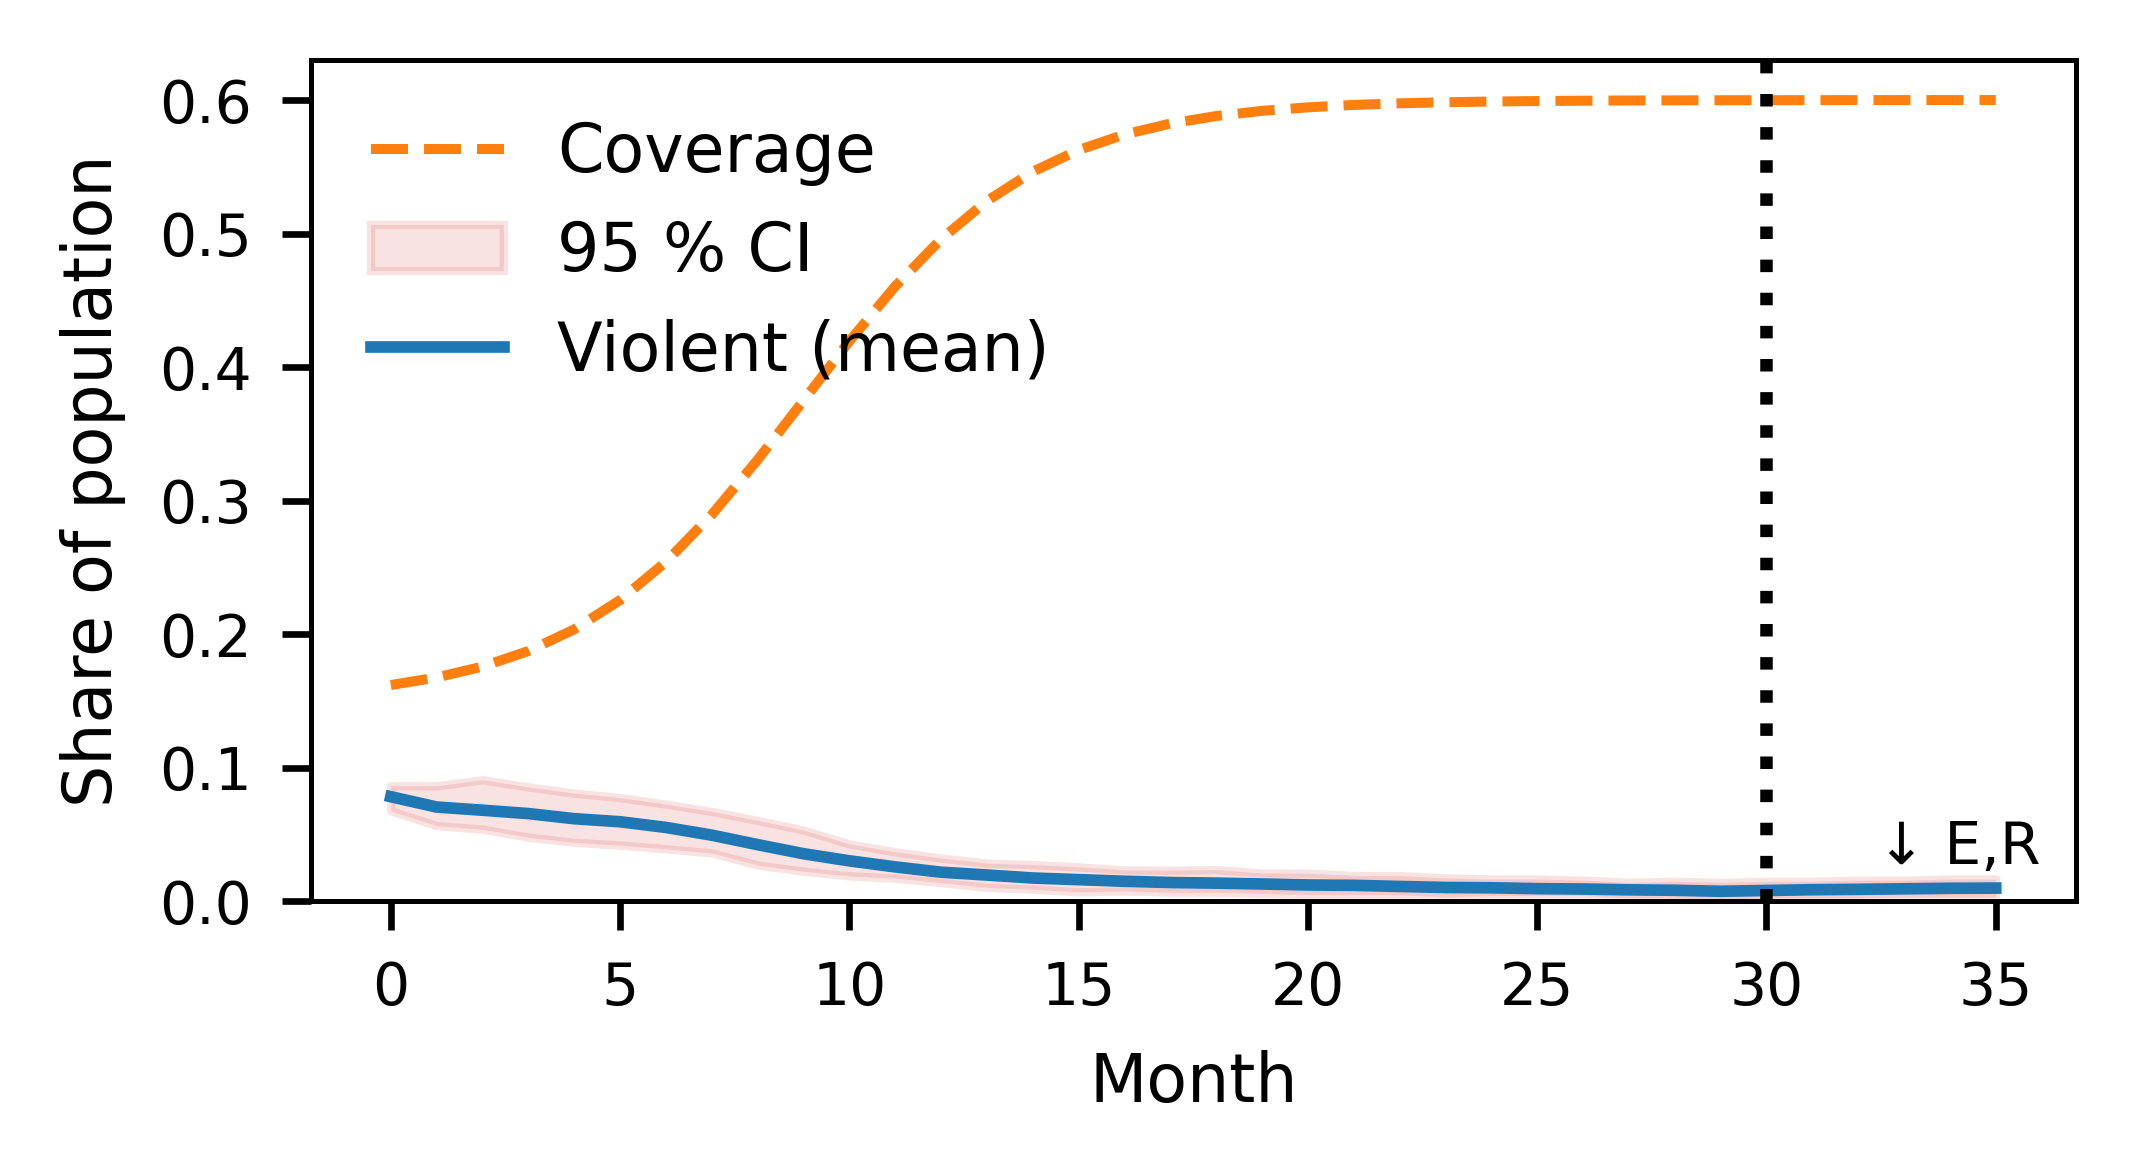

In [ ]:
# === fig3_dynamic_ER_ci.py  =========================================
import numpy as np, pandas as pd, matplotlib.pyplot as plt

# --------------------------------------------------------------------
# 1) —á–∏—Ç–∞–µ–º —Ñ–∞–π–ª —Å —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–µ–π KPI –∏ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–º–∏ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞–º–∏
#    (kpi_dynamic.csv: month, kpi_mean, kpi_lo, kpi_hi)
df = pd.read_csv("kpi_dynamic.csv")

# 2) –∫—Ä–∏–≤–∞—è –æ—Ö–≤–∞—Ç–∞  ‚Äî –ª–∏–±–æ –±–µ—Ä—ë–º –∏–∑ CSV, –ª–∏–±–æ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ñ–æ—Ä–º—É–ª–∞
if {"coverage"}.issubset(df.columns):
    cov = df["coverage"].values
else:
    # –±—ã—Å—Ç—Ä–∞—è —Ä–µ–∫–æ–Ω—Å—Ç—Ä—É–∫—Ü–∏—è S-–∫—Ä–∏–≤–æ–π (—Ç–µ –∂–µ t0, k, max 0.60)
    t  = df["month"].values
    cov = 0.15 + 0.45 / (1 + np.exp(-0.4*(t-18/2)))

# 3) –≥–æ—Ç–æ–≤–∏–º —Ñ–∏–≥—É—Ä—É ---------------------------------------------------
plt.rcParams.update({
    "font.size": 8,
    "axes.labelsize": 8,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
})
fig, ax = plt.subplots(figsize=(3.6,2.0), dpi=600)     # 600 dpi rosette

# ‚Äî Coverage ----------------------------------------------------------
ax.plot(df["month"], cov, ls="--", lw=1.2, color="#ff7f0e",
        label="Coverage")

# ‚Äî Violent mean + 95 % CI -------------------------------------------
ax.fill_between(df["month"], df["kpi_lo"], df["kpi_hi"],
                color="#d6272822", label="95 % CI")
ax.plot(df["month"], df["kpi_mean"], color="#1f77b4",
        lw=1.4, label="Violent (mean)")

# ‚Äî –æ—Å–∏ –∏ –∞–Ω–Ω–æ—Ç–∞—Ü–∏–∏ ---------------------------------------------------
ax.set_xlabel("Month")
ax.set_ylabel("Share of population")
ax.set_ylim(0, max(cov)*1.05)
# --- –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω–∞—è –ø—É–Ω–∫—Ç–∏—Ä–Ω–∞—è –∏ –ø–æ–¥–ø–∏—Å—å ----------------------------
# --- –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω–∞—è –ø—É–Ω–∫—Ç–∏—Ä–Ω–∞—è –∏ –ø–æ–¥–ø–∏—Å—å ---------------------------------
ax.axvline(30, ls=":", color="k")

# ‚îÄ‚îÄ –ø–æ–¥–ø–∏—Å—å –≤ —Å–∏—Å—Ç–µ–º–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç Axes (0‚Äì1) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
ax.annotate("‚Üì E,R",
            xy=(0.98, 0.03),         # 98 % –ø–æ X, 3 % –ø–æ Y (–≤–Ω—É—Ç—Ä–∏ –ø–æ–ª—è)
            xycoords="axes fraction",
            ha="right", va="bottom",
            fontsize=7)


ax.legend(frameon=False, loc="upper left")
plt.tight_layout()

fig.savefig("fig3_dynamic_ER_ci.pdf", bbox_inches="tight")
fig.savefig("fig3_dynamic_ER_ci.png", dpi=300, bbox_inches="tight")
print("‚úì  fig3_dynamic_ER_ci.* saved")


In [ ]:
# =============================================================
#  fig4_cumKPI_ci.py   ‚Ä¢   AI & Society camera-ready
#  ‚ñ∏ —Å—Ç—Ä–æ–∏—Ç –∫—É–º—É–ª—è—Ç–∏–≤–Ω—ã–π Violent/Active  (mean ¬± 95 % CI)
# =============================================================
import pandas as pd
import matplotlib.pyplot as plt

# ---------- 1. –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ –∂—É—Ä–Ω–∞–ª–æ–≤–æ–≥–æ —Ñ–æ—Ä–º–∞—Ç–∞ -----------------
plt.rcParams.update({
    "font.size"      : 7,
    "axes.labelsize" : 7,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "axes.linewidth" : .6,
})

# ---------- 2. —á–∏—Ç–∞–µ–º –¥–∏–Ω–∞–º–∏–∫—É –∏ –∞–≥—Ä–µ–≥–∏—Ä—É–µ–º ------------------
dyn = pd.read_csv("kpi_dynamic.csv")          # month, kpi_mean, kpi_lo, kpi_hi

# –ø—Ä–æ–≤–µ—Ä—è–µ–º, –∫–∞–∫–∏–µ –∏–º–µ–Ω–∞ –∫–æ–ª–æ–Ω–æ–∫ ¬´—É–≥–∞–¥—ã–≤–∞—é—Ç—Å—è¬ª
cols = {c.lower(): c for c in dyn.columns}
m  = cols.get("kpi_mean") or cols.get("mean")
lo = cols.get("kpi_lo")   or cols.get("lo")
hi = cols.get("kpi_hi")   or cols.get("hi")
if not (m and lo and hi):
    raise ValueError("–í kpi_dynamic.csv –Ω–µ –Ω–∞–π–¥–µ–Ω—ã —Å—Ç–æ–ª–±—Ü—ã kpi_mean / kpi_lo / kpi_hi")

cum = (dyn
       .assign(cum_mean = dyn[m].cumsum(),
               cum_lo   = dyn[lo].cumsum(),
               cum_hi   = dyn[hi].cumsum()))

# ---------- 3. —Ñ—É–Ω–∫—Ü–∏—è –æ—Ç—Ä–∏—Å–æ–≤–∫–∏ CI-–ª–µ–Ω—Ç—ã --------------------
def add_ci(ax, x, mean, lo, hi, color, label):
    ax.plot(x, mean, lw=1.2, color=color, label=label)
    ax.fill_between(x, lo, hi, color=color, alpha=0.25)

# ---------- 4. —Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ ---------------------------------
fig, ax = plt.subplots(figsize=(3.4, 2.2), dpi=300)

add_ci(ax,
       cum["month"],
       cum["cum_mean"],
       cum["cum_lo"],
       cum["cum_hi"],
       "#1f77b4",       # —Å–∏–Ω–∏–π
       "Cum KPI")

ax.set_xlabel("Month")
ax.set_ylabel("Cum-Violent (share)")
ax.set_ylim(0, cum["cum_hi"].max()*1.08)
ax.margins(x=0.02)
ax.legend(frameon=False, loc="upper left", fontsize=7)

plt.tight_layout()

# ---------- 5. —Å–æ—Ö—Ä–∞–Ω—è–µ–º -------------------------------------
fig.savefig("fig4_kpi_dynamic_ci.pdf", dpi=600, bbox_inches="tight")
fig.savefig("fig4_kpi_dynamic_ci.png", dpi=300, bbox_inches="tight")
plt.close()

print("‚úì Fig 4  saved  ‚Üí  fig4_kpi_dynamic_ci.pdf  &  fig4_kpi_dynamic_ci.png")


‚úì Fig 4  saved  ‚Üí  fig4_kpi_dynamic_ci.pdf  &  fig4_kpi_dynamic_ci.png


In [ ]:
# =============================================================
#  fig4_kpi_expanding_ci.py  ‚Ä¢  AI & Society camera-ready
#  ‚ñ∏ Cum-KPI = expanding average Violent / Active (¬±95 % CI)
# =============================================================
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.size": 7,
    "axes.labelsize": 7,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "axes.linewidth": .6,
})

# --- 1. —á–∏—Ç–∞–µ–º –¥–∏–Ω–∞–º–∏–∫—É ---------------------------------------
dyn = pd.read_csv("kpi_dynamic.csv")              # month, kpi_mean, kpi_lo, kpi_hi

m  = next(c for c in dyn.columns if "mean" in c.lower())
lo = next(c for c in dyn.columns if "lo"   in c.lower())
hi = next(c for c in dyn.columns if "hi"   in c.lower())

cum = (
    dyn
      .assign(exp_mean = dyn[m].expanding().mean(),
              exp_lo   = dyn[lo].expanding().mean(),
              exp_hi   = dyn[hi].expanding().mean())
)

# --- 2. —Ä–∏—Å—É–Ω–æ–∫ -----------------------------------------------
fig, ax = plt.subplots(figsize=(3.4, 2.2), dpi=300)

ax.plot(cum["month"], cum["exp_mean"],
        lw=1.2, color="#1f77b4", label="Cum KPI")
ax.fill_between(cum["month"],
                cum["exp_lo"], cum["exp_hi"],
                color="#1f77b4", alpha=.25, label="95 % CI")

ax.set_xlabel("Month")
ax.set_ylabel("Cum-Violent / Active")
ax.set_ylim(0, cum["exp_hi"].max()*1.1)
ax.margins(x=0.02)
ax.legend(frameon=False, loc="upper right", fontsize=7)

plt.tight_layout()
fig.savefig("fig4_kpi_dynamic_ci.pdf", dpi=600, bbox_inches="tight")
fig.savefig("fig4_kpi_dynamic_ci.png", dpi=300, bbox_inches="tight")
plt.close()
print("‚úì Fig 4 (expanding mean) saved.")


‚úì Fig 4 (expanding mean) saved.


In [ ]:
from google.colab import files
files.download("/content/fig4_kpi_dynamic_ci.pdf")
files.download("/content/fig4_kpi_dynamic_ci.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>